In [57]:
import pandas as pd
import numpy as np
from keybert import KeyBERT
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

## Reading Dataset

In [58]:
df = pd.read_csv("./data/train.csv")

In [59]:
df = convPrice(df)

In [81]:
df['len']= df[df['description'].notna()]['description'].map(lambda x : len(x))

In [82]:
df

title  year     mileage transmission  \
0         هیوندای، توسان  2014  175,000 km     اتوماتیک   
1             پراید، 131  1391  330,000 km      دنده ای   
2               پژو، 206  1398  132,000 km      دنده ای   
3           تیبا، هاچ بک  1396  103,000 km      دنده ای   
4              پژو، پارس  1401   37,000 km      دنده ای   
...                  ...   ...         ...          ...   
15583           رانا، LX  1392  230,000 km      دنده ای   
15584         رانا، پلاس  1401   50,000 km      دنده ای   
15585           پژو، 207  1402    9,500 km      دنده ای   
15586    سیتروئن، زانتیا  1388  178,000 km      دنده ای   
15587  تارا، اتوماتیک V2  1401   37,000 km     اتوماتیک   

                         fuel body_color inside_color  body_status  \
0      9.6 لیتر در صد کیلومتر       سفید        مارون     بدون رنگ   
1      6.7 لیتر در صد کیلومتر       سفید         سفید     بدون رنگ   
2      6.4 لیتر در صد کیلومتر       سفید      خاکستری     بدون رنگ   
3      6.9 لیتر در صد کیلومتر        آبی      خاکستری     بدون رنگ   
4        7 لیتر در صد کیلومتر    خاکستری          کرم     بدون رنگ   
...                       ...        ...          ...          ...   
15583  6.9 لیتر در صد کیلومتر       قرمز         مشکی  چند لکه رنگ   
15584  6.9 لیتر در صد کیلومتر       مشکی         مشکی     بدون رنگ   
15585  6.6 لیتر در صد کیلومتر       مشکی         مشکی     بدون رنگ   
15586    7 لیتر در صد کیلومتر       سفید      خاکستری  چند لکه رنگ   
15587  7.3 لیتر در صد کیلومتر       سفید      خاکستری  کاپوت تعویض   

                                             description      body_type  \
0      مانیتور اندرویدی بدنه بدون لیسه کشی و روغن گیر...      crossover   
1      ماشین شاستی سرشاستی پلمپ میباشد به شرط موتوری ...  passenger_car   
2                                     خیلی تمیز فنی عالی      hatchback   
3      ماشین دارای دوربین دنده عقب،روکش صندلی نو،زاپا...      hatchback   
4                                                    NaN  passenger_car   
...                                                  ...            ...   
15583                     موتور تازه تعمیر \r\nلاستیک نو  passenger_car   
15584                                                NaN  passenger_car   
15585                                                NaN      hatchback   
15586  ماشین فوق‌العاده تمیز و سالم فنی کاملا سالم و ...  passenger_car   
15587  اخرای ١۴٠١ گلگیرها رنگ شاسی سالم  روکش صندلی  ...  passenger_car   

         volume                engine acceleration       price    len  
0      2.4 لیتر              4 سیلندر   10.4 ثانیه  2550000000  162.0  
1      1.3 لیتر  4 سیلندر یورو3 (M13)   13.8 ثانیه   215000000   83.0  
2      1.4 لیتر          4 سیلندر TU3   14.1 ثانیه   445000000   19.0  
3      1.5 لیتر          4 سیلندر M15     13 ثانیه   310000000  232.0  
4      1.8 لیتر     4 سیلندر XU7 پلاس     12 ثانیه   570000000    NaN  
...         ...                   ...          ...         ...    ...  
15583  1.6 لیتر    4 سیلندر TU5 یورو4     12 ثانیه   280000000   28.0  
15584  1.6 لیتر    4 سیلندر TU5 یورو5     12 ثانیه   495000000    NaN  
15585  1.6 لیتر          4 سیلندر TU5   11.6 ثانیه   710000000    NaN  
15586    2 لیتر         4 سیلندر XU10    9.5 ثانیه   650000000  500.0  
15587  1.6 لیتر     4 سیلندر TU5 پلاس     13 ثانیه   680000000   54.0  

[15588 rows x 15 columns]

In [55]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD


df['description'].fillna("",inplace=True)

vectorizer = TfidfVectorizer(max_features=2,ngram_range=(1,2),)  
tfidf_matrix = vectorizer.fit_transform(df['description'])


svd = TruncatedSVD(n_components=1) 
reduced_features = svd.fit_transform(tfidf_matrix)

df['description_feature'] = reduced_features



In [83]:
df['price'].corr(df['len'])

-0.06872869507257685

In [120]:
df['price'].corr(df['description_feature'])

-0.16763747867645964

In [104]:
df

title  year     mileage transmission  \
0         هیوندای، توسان  2014  175,000 km     اتوماتیک   
1             پراید، 131  1391  330,000 km      دنده ای   
2               پژو، 206  1398  132,000 km      دنده ای   
3           تیبا، هاچ بک  1396  103,000 km      دنده ای   
4              پژو، پارس  1401   37,000 km      دنده ای   
...                  ...   ...         ...          ...   
15583           رانا، LX  1392  230,000 km      دنده ای   
15584         رانا، پلاس  1401   50,000 km      دنده ای   
15585           پژو، 207  1402    9,500 km      دنده ای   
15586    سیتروئن، زانتیا  1388  178,000 km      دنده ای   
15587  تارا، اتوماتیک V2  1401   37,000 km     اتوماتیک   

                         fuel body_color inside_color  body_status  \
0      9.6 لیتر در صد کیلومتر       سفید        مارون     بدون رنگ   
1      6.7 لیتر در صد کیلومتر       سفید         سفید     بدون رنگ   
2      6.4 لیتر در صد کیلومتر       سفید      خاکستری     بدون رنگ   
3      6.9 لیتر در صد کیلومتر        آبی      خاکستری     بدون رنگ   
4        7 لیتر در صد کیلومتر    خاکستری          کرم     بدون رنگ   
...                       ...        ...          ...          ...   
15583  6.9 لیتر در صد کیلومتر       قرمز         مشکی  چند لکه رنگ   
15584  6.9 لیتر در صد کیلومتر       مشکی         مشکی     بدون رنگ   
15585  6.6 لیتر در صد کیلومتر       مشکی         مشکی     بدون رنگ   
15586    7 لیتر در صد کیلومتر       سفید      خاکستری  چند لکه رنگ   
15587  7.3 لیتر در صد کیلومتر       سفید      خاکستری  کاپوت تعویض   

                                             description      body_type  \
0      مانیتور اندرویدی بدنه بدون لیسه کشی و روغن گیر...      crossover   
1      ماشین شاستی سرشاستی پلمپ میباشد به شرط موتوری ...  passenger_car   
2                                     خیلی تمیز فنی عالی      hatchback   
3      ماشین دارای دوربین دنده عقب،روکش صندلی نو،زاپا...      hatchback   
4                                                   null  passenger_car   
...                                                  ...            ...   
15583                     موتور تازه تعمیر \r\nلاستیک نو  passenger_car   
15584                                               null  passenger_car   
15585                                               null      hatchback   
15586  ماشین فوق‌العاده تمیز و سالم فنی کاملا سالم و ...  passenger_car   
15587  اخرای ١۴٠١ گلگیرها رنگ شاسی سالم  روکش صندلی  ...  passenger_car   

         volume                engine acceleration       price  \
0      2.4 لیتر              4 سیلندر   10.4 ثانیه  2550000000   
1      1.3 لیتر  4 سیلندر یورو3 (M13)   13.8 ثانیه   215000000   
2      1.4 لیتر          4 سیلندر TU3   14.1 ثانیه   445000000   
3      1.5 لیتر          4 سیلندر M15     13 ثانیه   310000000   
4      1.8 لیتر     4 سیلندر XU7 پلاس     12 ثانیه   570000000   
...         ...                   ...          ...         ...   
15583  1.6 لیتر    4 سیلندر TU5 یورو4     12 ثانیه   280000000   
15584  1.6 لیتر    4 سیلندر TU5 یورو5     12 ثانیه   495000000   
15585  1.6 لیتر          4 سیلندر TU5   11.6 ثانیه   710000000   
15586    2 لیتر         4 سیلندر XU10    9.5 ثانیه   650000000   
15587  1.6 لیتر     4 سیلندر TU5 پلاس     13 ثانیه   680000000   

       description_feature  
0             9.893705e-08  
1            -3.283877e-07  
2            -4.698176e-08  
3            -8.009014e-08  
4             1.000000e+00  
...                    ...  
15583         1.961281e-07  
15584         1.000000e+00  
15585         1.000000e+00  
15586         1.192633e-07  
15587        -1.903719e-08  

[15588 rows x 15 columns]

## Looking for Missing Values

In [12]:
df.isnull().sum()

title              0
year               0
mileage            0
transmission       0
fuel            1657
body_color         0
inside_color       0
body_status        0
description     2098
body_type          0
volume          1217
engine          1217
acceleration    1836
price              0
dtype: int64

In [13]:
df.drop('description',axis=1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15588 entries, 0 to 15587
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         15588 non-null  object
 1   year          15588 non-null  int64 
 2   mileage       15588 non-null  object
 3   transmission  15588 non-null  object
 4   fuel          13931 non-null  object
 5   body_color    15588 non-null  object
 6   inside_color  15588 non-null  object
 7   body_status   15588 non-null  object
 8   body_type     15588 non-null  object
 9   volume        14371 non-null  object
 10  engine        14371 non-null  object
 11  acceleration  13752 non-null  object
 12  price         15588 non-null  object
dtypes: int64(1), object(12)
memory usage: 1.5+ MB


# convert

## convert years to same scale

In [15]:
def ConvYear(df):
    df.year = df.year.map(lambda x: x if x<1500 else x-621)
    return df

In [16]:
df = ConvYear(df)

## Mapping mileage columns to int

In [17]:
def mapMil(x):
    if (isinstance(x,str) and 'km' in x):
        lenOfSentence = len(x)
        km = lenOfSentence-3
        return int(x[:km].replace(",",""))
    else:
        return None
def convMil(df):
    df['mileage'] = df['mileage'].map(mapMil)
    return df

In [18]:
df = convMil(df)

In [19]:
df['mileage'].describe()

count     15316.000000
mean     120291.002481
std      105748.909527
min          10.000000
25%       39000.000000
50%       95000.000000
75%      171000.000000
max      964580.000000
Name: mileage, dtype: float64

## map price to int

In [5]:
def convPrice(df):
    df['price'] = df['price'].map(lambda x : int(x.replace(",","")))
    return df

In [103]:
df = convPrice(df)

## Mapping acceleration columns to float

In [22]:
def mapAcc(x):
    if (isinstance(x,str) and 'ثانیه' in x):
        lenOfSentence = len(x)
        km = lenOfSentence-5
        return float(x[:km].replace("/","."))
    else:
        return None

def convAcc(df):
    df['acceleration'] = df['acceleration'].map(mapAcc)
    return df

In [23]:
df = convAcc(df)

In [24]:
df['acceleration'].describe()

count    13752.000000
mean        11.640394
std          2.037984
min          4.200000
25%         10.500000
50%         11.600000
75%         13.000000
max         21.000000
Name: acceleration, dtype: float64

## Mapping Volume columns to float

In [25]:
def mapVol(x):
    if (isinstance(x,str) and 'لیتر' in x):
        lenOfSentence = len(x)
        km = lenOfSentence-5
        return float(x[:km].replace("/","."))
    else:
        return None
def convVol(df):
    df['volume'] = df['volume'].map(mapVol)
    return df

In [26]:
df = convVol(df)

## Mapping Fuel columns to float

In [27]:
def mapToFloat(x):
    if(pd.isna(x)):
        return None
    elif (len(x) > 5):
        lenOfSentence = len(x)
        liter = lenOfSentence-19
        return float(x[:liter])
    
def convFuel(df):
    df['fuel'] = df['fuel'].map(mapToFloat)
    return df

In [28]:
df = convFuel(df)

## finding avg of km per year of manufacturing

In [29]:
df_without_null_millage = df.dropna(subset=['mileage'],inplace=False)
# df_without_null_millage_without_current_year = df_without_null_millage[(df_without_null_millage.year >1390)]
avg = df_without_null_millage.mileage/(1403.3-df_without_null_millage.year)

In [30]:
(avg/1000).describe()

count    15316.000000
mean        15.049660
std         15.596681
min          0.007692
25%          9.397590
50%         13.986014
75%         18.846154
max       1316.666667
dtype: float64

#### it means that approximately every car have driven 15,000 km in one year.
### so we can replace missing values in mileage by (1403.3 - year) * 15.000

In [31]:
def fillingMil(df):
    df['mileage'] = df.apply(lambda x :(1403.3-x.year)*15000 if pd.isna(x['mileage']) else x.mileage,axis=1)
    return df


In [32]:
df = fillingMil(df)

In [33]:
df['mileage'].describe()

count     15588.000000
mean     121255.516679
std      106316.866110
min          10.000000
25%       40000.000000
50%       95000.000000
75%      175000.000000
max      964580.000000
Name: mileage, dtype: float64

# Engine and Volume and fuel

## checking missing values in Engine

In [34]:
items = dict(df[df['engine'].isna()]['title'].value_counts())

In [35]:
filtered_keys = list({x: freq for x, freq in items.items() if freq > 10}.keys())


In [36]:
filtered_keys

['پراید، صندوق دار',
 'پژو، 405',
 'سمند، X7',
 'ام وی ام، X22',
 'پژو، 207',
 'پژو، روآ',
 'ب ام و، X3',
 'کوییک، SR',
 'تویوتا، پرادو  چهار در',
 'پراید، هاچ بک',
 'مزدا، وانت تک\u200cکابين',
 'بنز، کلاس S',
 'تویوتا، کرولا',
 'هیوندای، سانتافه',
 'کیا، اسپورتیج',
 'تویوتا، کمری',
 'رنو، مگان (وارداتی)',
 'پژو، RDI',
 'پراید، 132',
 'تویوتا، هایلوکس دو کابین',
 'ام وی ام، X33 کراس',
 'مزدا، وانت دوکابين',
 'بنز، کلاس E',
 'کوییک، GXR',
 'هیوندای، اکسنت',
 'بنز، کلاسیک']

## droping null engines with freq lower than 10

##### پراید صندوق دار
###### 4 سیلندر یورو2 بهینه (M13)
###### 7.5
###### 15
###### 1.3 


In [37]:
target = df['title'] == "پراید، صندوق دار"

In [38]:
df.loc[df['title'] == "پراید، صندوق دار",'fuel'] = df.loc[df['title'] == "پراید، صندوق دار",'fuel'].fillna(7.5)
df.loc[df['title'] == "پراید، صندوق دار",'volume'] = df.loc[df['title'] == "پراید، صندوق دار",'volume'].fillna(1.3)
df.loc[df['title'] == "پراید، صندوق دار",'engine'] = df.loc[df['title'] == "پراید، صندوق دار",'engine'].fillna("4 سیلندر یورو2 بهینه (M13)")
df.loc[df['title'] == "پراید، صندوق دار",'acceleration'] = df.loc[df['title'] == "پراید، صندوق دار",'acceleration'].fillna(15)



##### پژو، 405
'4 سیلندر L3'

In [39]:
df.loc[df['title'] == "پژو، 405",'engine'] = df.loc[df['title'] == "پژو، 405",'engine'].fillna("test")


<Figure size 1000x600 with 0 Axes>

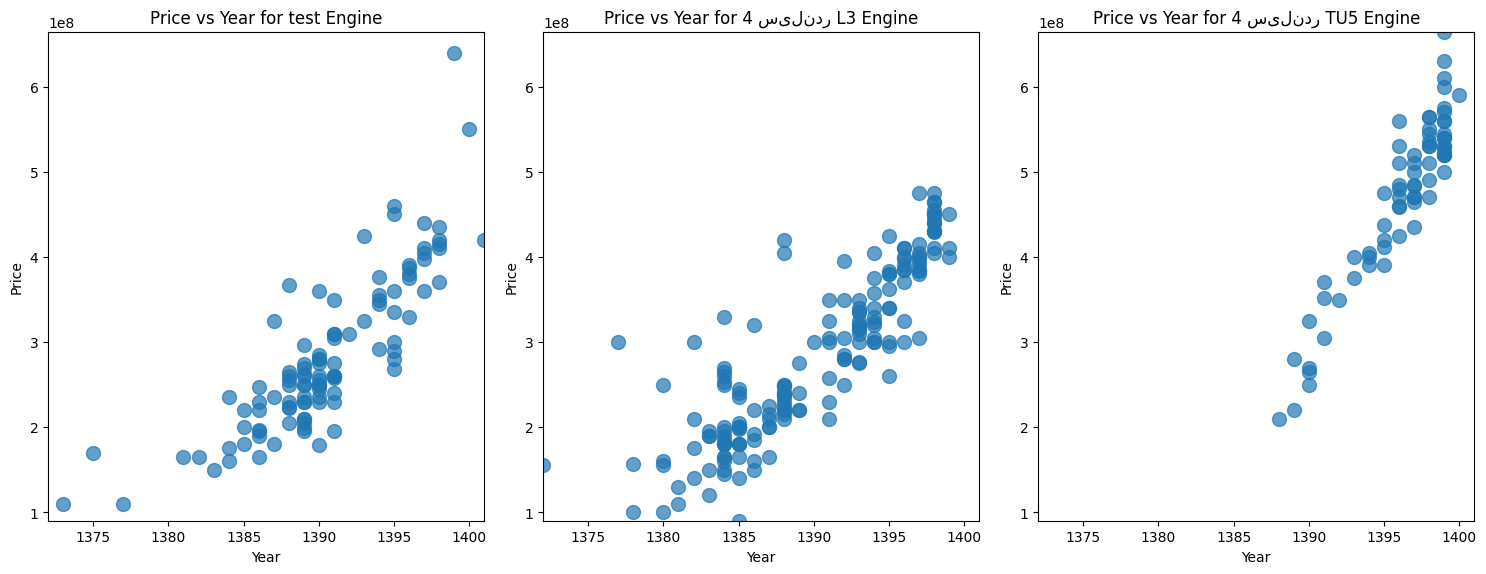

In [40]:
plt.figure(figsize=(10, 6))
target = df[(df['title'] == 'پژو، 405')&(df['year']>1370)][['price','engine','year']]

engine_types = target['engine'].unique()

year_min = target['year'].min()
year_max = target['year'].max()
price_min = target['price'].min()
price_max = target['price'].max()


fig, axes = plt.subplots(nrows=1, ncols=len(engine_types), figsize=(5 * len(engine_types), 6))

if len(engine_types) == 1:
    axes = [axes]


for i, engine_type in enumerate(engine_types):
    ax = axes[i]
    engine_data = target[target['engine'] == engine_type]
    ax.scatter(engine_data['year'], engine_data['price'], s=100, alpha=0.7)
    ax.set_title(f'Price vs Year for {engine_type} Engine')
    ax.set_xlabel('Year')
    ax.set_ylabel('Price')
    

    ax.set_xlim(year_min, year_max)
    ax.set_ylim(price_min, price_max)


plt.tight_layout()


plt.show()

so they are all L3

In [41]:
df.loc[df['engine']=='test','engine'] = '4 سیلندر L3'
df.loc[df['engine']=='4 سیلندر L3','acceleration'] = 13.2
df.loc[df['engine']=='4 سیلندر TU5','acceleration'] = 11

In [42]:
target = (df['title'] ==  'پژو، 405')

In [43]:
df.loc[target,'fuel'] = df.loc[target,'fuel'].fillna(9)
df.loc[target,'volume'] = df.loc[target,'volume'].fillna(1.8)



In [44]:
df[target].isnull().sum()

title           0
year            0
mileage         0
transmission    0
fuel            0
body_color      0
inside_color    0
body_status     0
body_type       0
volume          0
engine          0
acceleration    0
price           0
dtype: int64

In [45]:
target = (df['title'] == 'پژو، 405')&(df['year']<=1390)

In [46]:
df.loc[target,'fuel'] = df.loc[target,'fuel'].fillna(9.0)
df.loc[target,'volume'] = df.loc[target,'volume'].fillna(1.8)
df.loc[target,'engine'] = df.loc[target,'engine'].fillna("4 سیلندر L3")
df.loc[target,'acceleration'] = df.loc[target,'acceleration'].fillna(11.0)


In [47]:
df[target]

title  year   mileage transmission  fuel body_color inside_color  \
179    پژو، 405  1390  370000.0      دنده ای   9.0    خاکستری          کرم   
185    پژو، 405  1382  380000.0      دنده ای   9.0       مشکی         مشکی   
401    پژو، 405  1383  344400.0      دنده ای   9.0  نوک مدادی         مشکی   
421    پژو، 405  1381  390000.0      دنده ای   9.0  نوک مدادی         مشکی   
487    پژو، 405  1389  214500.0      دنده ای   9.0    نقره ای         مشکی   
...         ...   ...       ...          ...   ...        ...          ...   
14933  پژو، 405  1389  360000.0      دنده ای   9.0    نقره ای         مشکی   
15055  پژو، 405  1384  340000.0      دنده ای   9.0    نقره ای         مشکی   
15338  پژو، 405  1390  184000.0      دنده ای   9.0    نقره ای           بژ   
15364  پژو، 405  1372   17000.0      دنده ای   9.0       یشمی          کرم   
15466  پژو، 405  1382  360000.0      دنده ای   9.0  نوک مدادی         مشکی   

      body_status      body_type  volume       engine  acceleration      price  
179       دور رنگ  passenger_car     1.8  4 سیلندر L3          13.2  245000000  
185       دور رنگ  passenger_car     1.8  4 سیلندر L3          13.2  175000000  
401      کامل رنگ  passenger_car     1.8  4 سیلندر L3          13.2  120000000  
421      کامل رنگ  passenger_car     1.8  4 سیلندر L3          13.2  165000000  
487      بدون رنگ  passenger_car     1.8  4 سیلندر L3          13.2  250000000  
...           ...            ...     ...          ...           ...        ...  
14933     دور رنگ  passenger_car     1.8  4 سیلندر L3          13.2  220000000  
15055     دور رنگ  passenger_car     1.8  4 سیلندر L3          13.2  180000000  
15338    بدون رنگ  passenger_car     1.8  4 سیلندر L3          13.2  300000000  
15364     دور رنگ  passenger_car     1.8  4 سیلندر L3          13.2  155000000  
15466     دور رنگ  passenger_car     1.8  4 سیلندر L3          13.2  140000000  

[152 rows x 13 columns]

In [48]:
df[(df['title'] == 'پژو، 405')].isnull().sum()

title           0
year            0
mileage         0
transmission    0
fuel            0
body_color      0
inside_color    0
body_status     0
body_type       0
volume          0
engine          0
acceleration    0
price           0
dtype: int64

'سمند، X7'

In [49]:
target = df['title'] == 'سمند، X7'

In [50]:
df.loc[target,'fuel'] = df.loc[target,'fuel'].fillna(8.5)
df.loc[target,'volume'] = df.loc[target,'volume'].fillna(1.8)
df.loc[target,'engine'] = df.loc[target,'engine'].fillna("4 سیلندر")
df.loc[target,'acceleration'] = df.loc[target,'acceleration'].fillna(14.9)


'ام وی ام، X22'

In [51]:
target = (df['title'] == 'ام وی ام، X22')&(df['transmission'] == 'دنده ای')

In [52]:
df.loc[target,'fuel'] = df.loc[target,'fuel'].fillna(5.9)
df.loc[target,'volume'] = df.loc[target,'volume'].fillna(1.5)
df.loc[target,'engine'] = df.loc[target,'engine'].fillna("4 سیلندر")
df.loc[target,'acceleration'] = df.loc[target,'acceleration'].fillna(12.0)


In [53]:
target = (df['title'] == 'ام وی ام، X22')&(df['transmission'] == 'اتوماتیک')

In [54]:
df.loc[target,'fuel'] = df.loc[target,'fuel'].fillna(6.1)
df.loc[target,'volume'] = df.loc[target,'volume'].fillna(1.5)
df.loc[target,'engine'] = df.loc[target,'engine'].fillna("4 سیلندر")
df.loc[target,'acceleration'] = df.loc[target,'acceleration'].fillna(12.7)


'پژو، 207'

دنده ای
6.6
1.6
4 سیلندر TU5	
11.6

دنده ای 
6.3
1.4
4 سیلندر TU3
11.6




اتوماتیک
7.1
1.6
4 سیلندر TU5	
12.6

اتوماتیک
7.4
1.6
4 سیلندر TU5P	
12.6



all the missing values are belongs to 1401,1402,1403.
all the missing values are automatic.
so ====>

In [55]:
target = df[(df['title'] =='پژو، 207') & df['engine'].isna()]['year'].value_counts()

In [56]:
target

year
1402    32
1403     6
1401     5
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

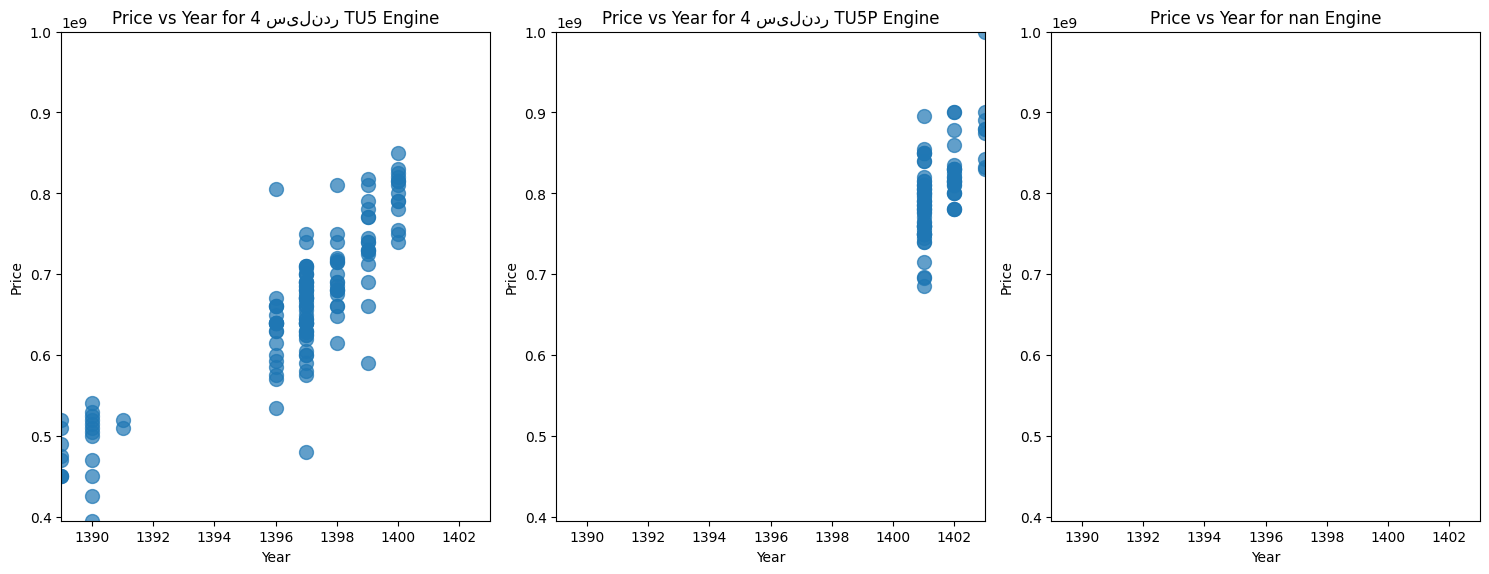

In [57]:
plt.figure(figsize=(10, 6))
target = df[(df['title'] =='پژو، 207') & (df['transmission'] == 'اتوماتیک')][['price','engine','year']]

engine_types = target['engine'].unique()

year_min = target['year'].min()
year_max = target['year'].max()
price_min = target['price'].min()
price_max = target['price'].max()


fig, axes = plt.subplots(nrows=1, ncols=len(engine_types), figsize=(5 * len(engine_types), 6))

if len(engine_types) == 1:
    axes = [axes]


for i, engine_type in enumerate(engine_types):
    ax = axes[i]
    engine_data = target[target['engine'] == engine_type]
    ax.scatter(engine_data['year'], engine_data['price'], s=100, alpha=0.7)
    ax.set_title(f'Price vs Year for {engine_type} Engine')
    ax.set_xlabel('Year')
    ax.set_ylabel('Price')
    

    ax.set_xlim(year_min, year_max)
    ax.set_ylim(price_min, price_max)


plt.tight_layout()


plt.show()

In [58]:
target = (df['title'] == 'پژو، 207')&(df['transmission'] == 'اتوماتیک')

In [59]:
df.loc[target,'fuel'] = df.loc[target,'fuel'].fillna(7.4)
df.loc[target,'volume'] = df.loc[target,'volume'].fillna(1.6)
df.loc[target,'engine'] = df.loc[target,'engine'].fillna("4 سیلندر TU5P")
df.loc[target,'acceleration'] = df.loc[target,'acceleration'].fillna(12.6)


In [60]:
df[target].isna().sum()

title           0
year            0
mileage         0
transmission    0
fuel            0
body_color      0
inside_color    0
body_status     0
body_type       0
volume          0
engine          0
acceleration    0
price           0
dtype: int64

In [61]:
df[df['price']>4000000000]

title  year   mileage transmission  fuel body_color  \
5                   لکسوس، RX  1391  330000.0     اتوماتیک   9.9       سفید   
39                 فولکس، گلف  1397   45000.0     اتوماتیک   6.5       قرمز   
42              ب ام و، سری 7  1396    7000.0     اتوماتیک   6.2       سفید   
48                 ب ام و، X3  1395   55000.0     اتوماتیک   7.3       سفید   
55         ب ام و، سری 5 سدان  1395   30000.0     اتوماتیک   6.5   کربن بلک   
...                       ...   ...       ...          ...   ...        ...   
15524             کیا، اپیروس  1387   65000.0     اتوماتیک  10.9       مشکی   
15531              ب ام و، X4  1394  127000.0     اتوماتیک   7.4    قهوه ای   
15537  تویوتا، پرادو  چهار در  1389  170000.0     اتوماتیک  13.0       مشکی   
15554              ب ام و، X4  1396   60000.0     اتوماتیک   7.4       مشکی   
15578              ب ام و، X3  1393  160000.0     اتوماتیک   NaN       سفید   

      inside_color body_status      body_type  volume  \
5             مشکی   گلگیر رنگ            suv     3.5   
39            مشکی    بدون رنگ      hatchback     2.0   
42            موکا    بدون رنگ  passenger_car     2.0   
48            مشکی    بدون رنگ      crossover     2.0   
55            موکا    بدون رنگ  passenger_car     2.0   
...            ...         ...            ...     ...   
15524         طوسی    بدون رنگ  passenger_car     3.8   
15531         موکا   درب تعویض      crossover     2.0   
15537         مشکی  یک لکه رنگ            suv     4.0   
15554         موکا    بدون رنگ      crossover     2.0   
15578        مارون  دو لکه رنگ      crossover     NaN   

                            engine  acceleration        price  
5                         6 سیلندر           7.6   4990000000  
39              4 سیلندر توربوشارژ           6.4   5500000000  
42              4 سیلندر توربوشارژ           6.3  18000000000  
48              4 سیلندر توربوشارژ           6.5   7450000000  
55     4 سیلندر توربوشارژ (N20B20)           6.2  10300000000  
...                            ...           ...          ...  
15524                     6 سیلندر           7.5   4500000000  
15531  4 سیلندر توربوشارژ (N20B20)           6.4   7800000000  
15537                     6 سیلندر           9.0   8700000000  
15554  4 سیلندر توربوشارژ (N20B20)           6.4  10600000000  
15578                          NaN           NaN   4200000000  

[1033 rows x 13 columns]

In [62]:
df.drop(index=df[df['price']<40000000].index,inplace=True)

In [63]:
df.drop(index=df[df['price']>2000000000].index,inplace=True)

کی ام سی، T8
۹.۸
۱۲

In [64]:
target = (df['title'] == 'کی ام سی، T8')

In [65]:
df.loc[target,'fuel'] = df.loc[target,'fuel'].fillna(9.8)
df.loc[target,'acceleration'] = df.loc[target,'acceleration'].fillna(12.0)


جک، S5
دو لیتر اتوماتیک

یکونیم لیتر اتوماتیک نال است



In [66]:
target = (df['title']=='جک، S5')&(df['volume']==1.5)

In [67]:
df.loc[target,'fuel'] = df.loc[target,'fuel'].fillna(11.0)
df.loc[target,'acceleration'] = df.loc[target,'acceleration'].fillna(7.5)


ام وی ام، X22 PRO
اتوماتیک همه یک لیتری هستندو  لیتری سوخت و شتاب خالی است
۴.۹
۱۲
دنده ای همه یکونیم لیتری و فقط شتاب خالی است.
۱۴

In [68]:
target = (df['title']=='ام وی ام، X22 PRO')&(df['transmission']=='دنده ای')

In [69]:

df.loc[target,'acceleration'] = df.loc[target,'acceleration'].fillna(14.0)


In [70]:
target = (df['title']=='ام وی ام، X22 PRO')&(df['transmission']=='اتوماتیک')

In [71]:
df.loc[target,'fuel'] = df.loc[target,'fuel'].fillna(4.9)
df.loc[target,'acceleration'] = df.loc[target,'acceleration'].fillna(12.0)


کی ام سی، J7

6.7
6.7

In [72]:
target = (df['title']=='کی ام سی، J7')

In [73]:
df[target].isna().sum()

title            0
year             0
mileage          0
transmission     0
fuel            43
body_color       0
inside_color     0
body_status      0
body_type        0
volume           0
engine           0
acceleration    43
price            0
dtype: int64

In [74]:
df.loc[target,'fuel'] = df.loc[target,'fuel'].fillna(6.7)
df.loc[target,'acceleration'] = df.loc[target,'acceleration'].fillna(6.7)


ام وی ام، X55 PRO
6.5
10.5

In [75]:
target = (df['title']=='ام وی ام، X55 PRO')

In [76]:
df.loc[target,'fuel'] = df.loc[target,'fuel'].fillna(6.5)
df.loc[target,'acceleration'] = df.loc[target,'acceleration'].fillna(10.5)


فونیکس، تیگو 7 پرو

In [77]:
target = (df['title']=='فونیکس، تیگو 7 پرو')

In [78]:
df.loc[target,'acceleration'] = df.loc[target,'acceleration'].fillna(9.8)


In [79]:
df[(df['title']=='پژو، 405')].isna().sum()

title           0
year            0
mileage         0
transmission    0
fuel            0
body_color      0
inside_color    0
body_status     0
body_type       0
volume          0
engine          0
acceleration    0
price           0
dtype: int64

In [86]:
from scipy import stats




def remove_outliers_by_zscore(df, column_name, threshold=3):

    df['zscore'] = df.groupby('title')[column_name].transform(lambda x: stats.zscore(x, nan_policy='omit'))
    

    df_clean = df[(df['zscore'].abs() < threshold)]
    

    df_clean = df_clean.drop(columns=['zscore'])
    
    return df_clean


df_clean = remove_outliers_by_zscore(df, 'price', threshold=2)


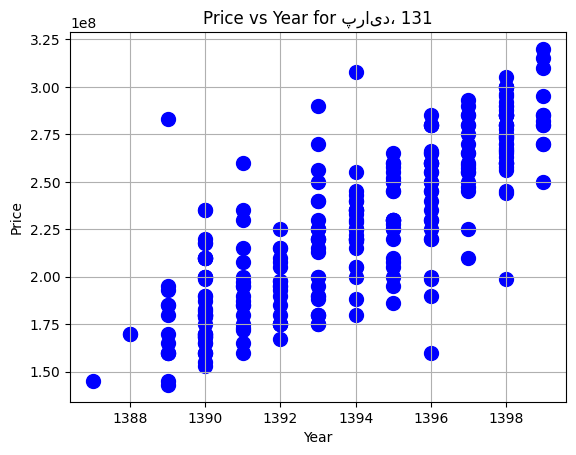

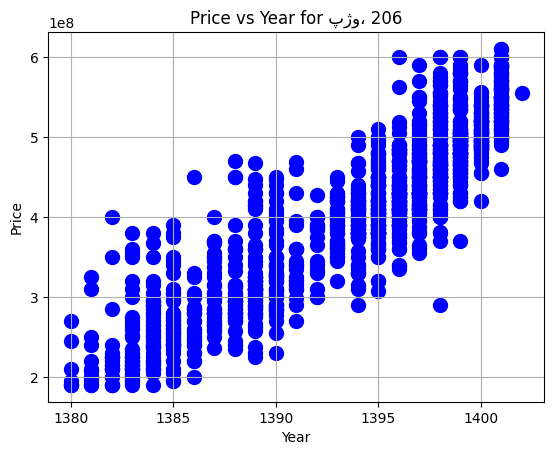

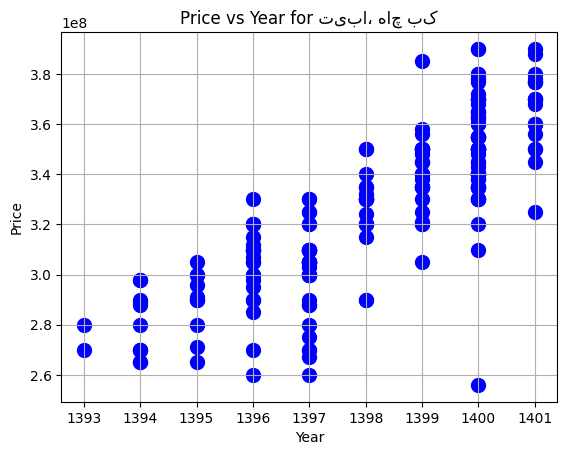

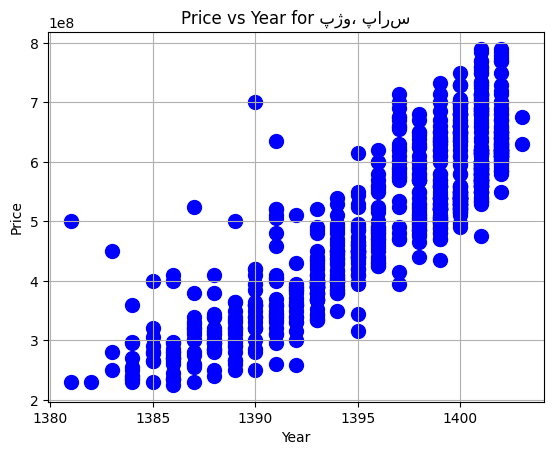

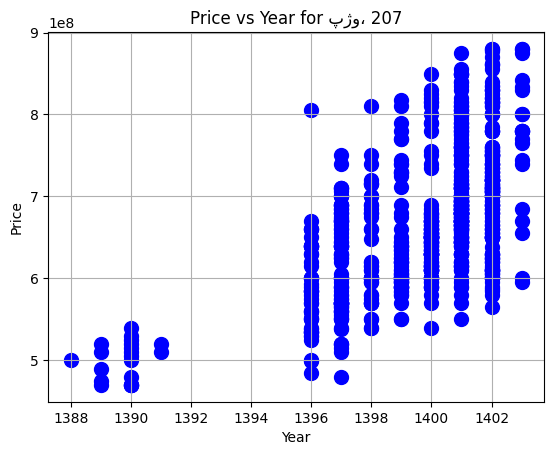

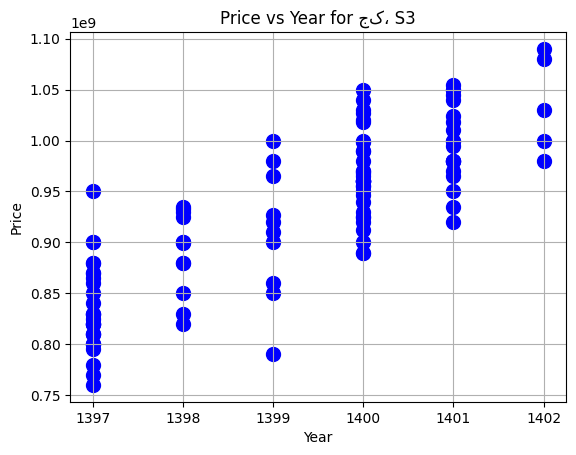

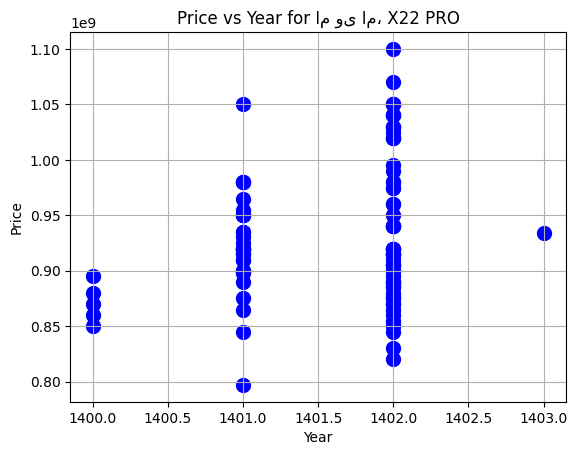

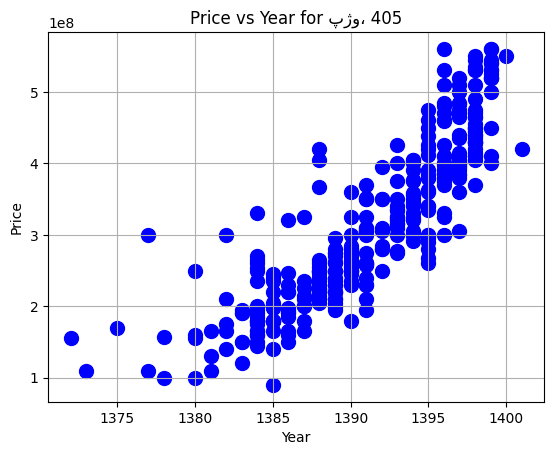

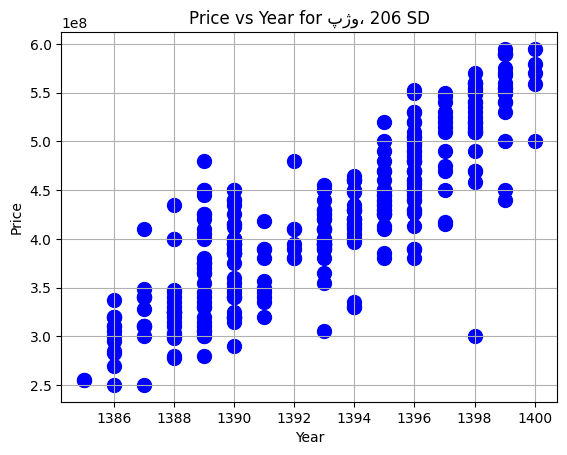

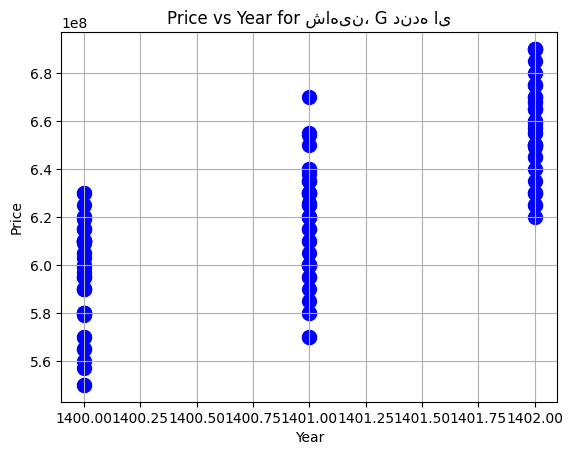

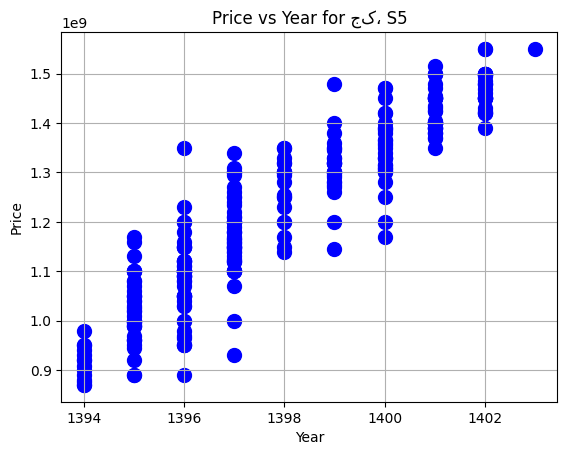

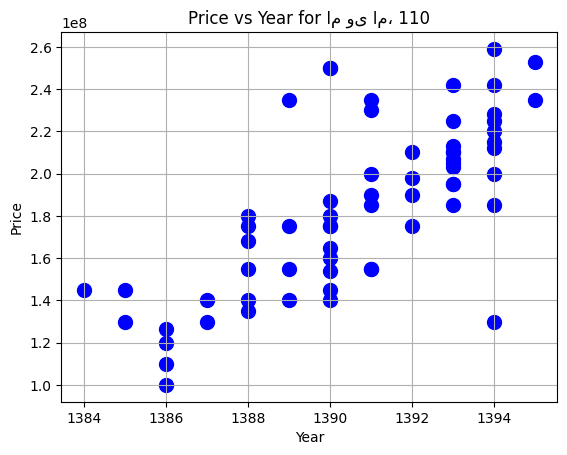

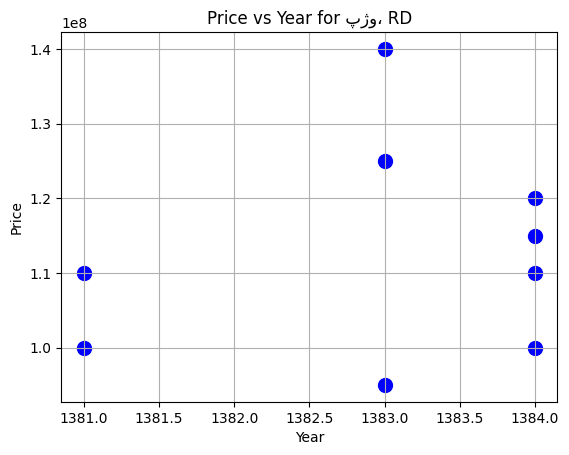

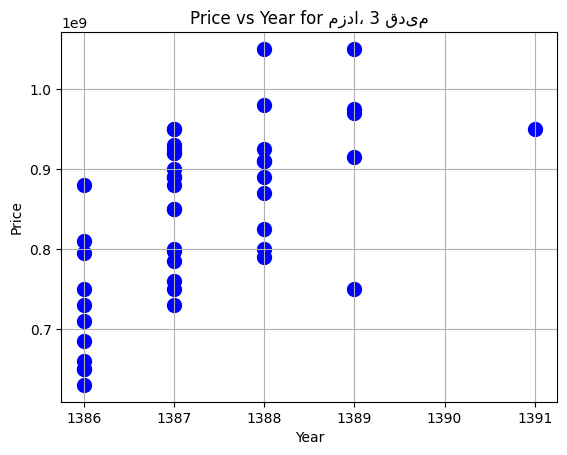

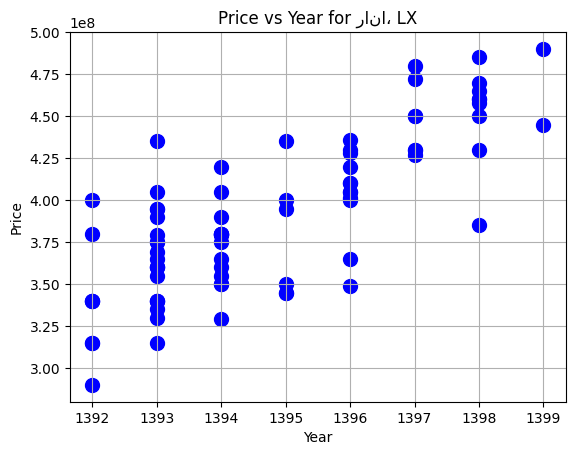

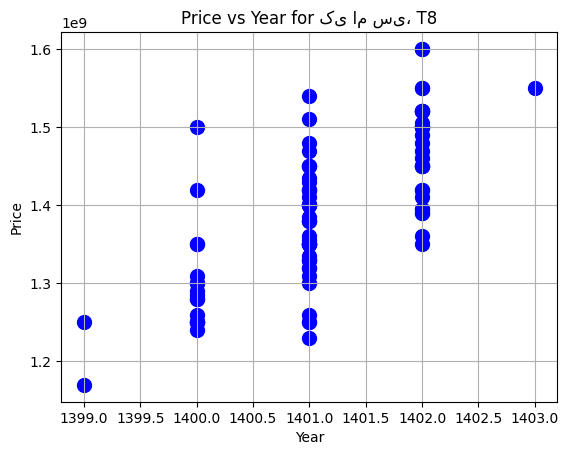

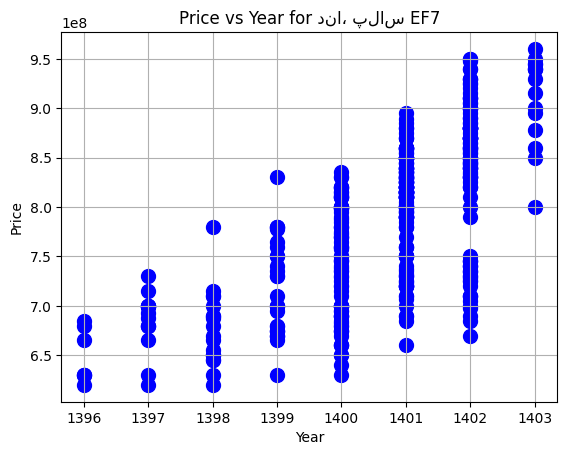

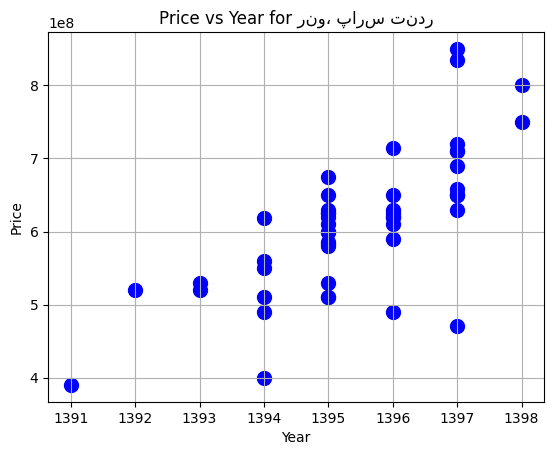

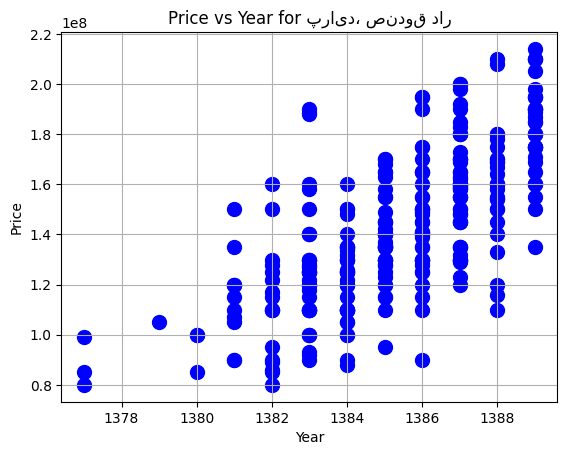

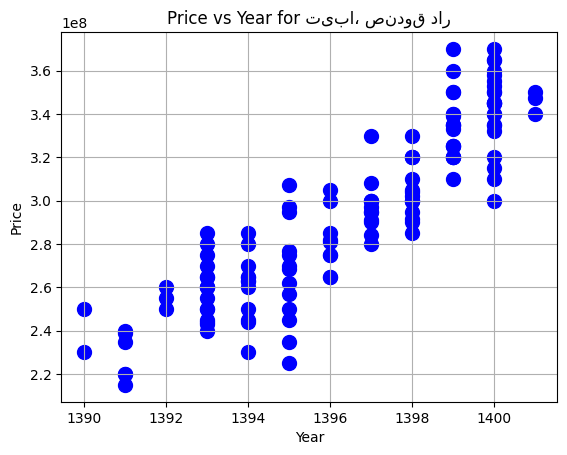

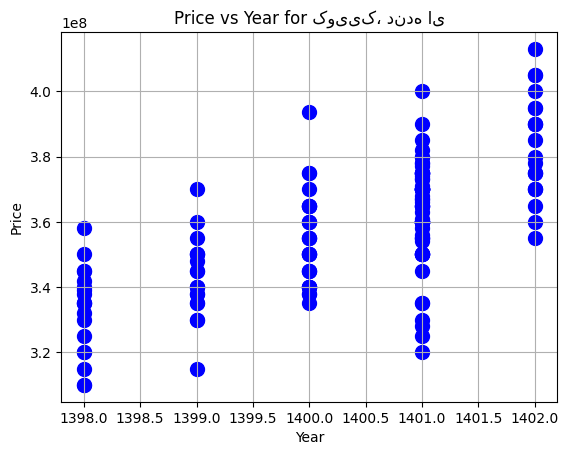

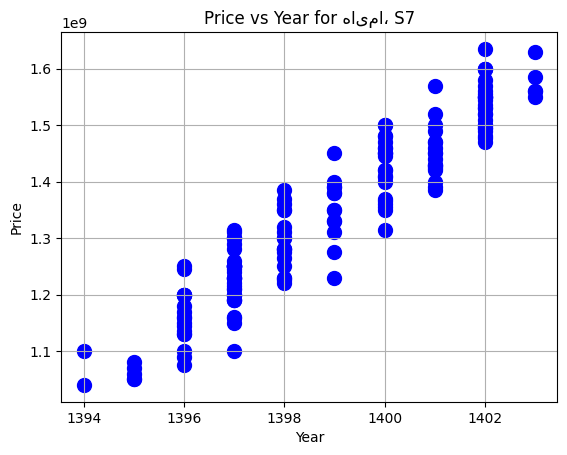

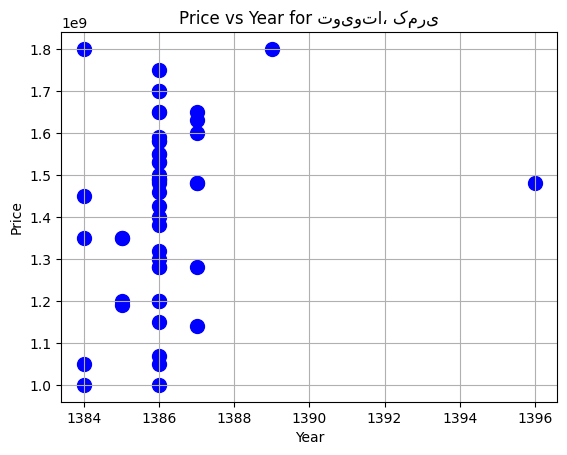

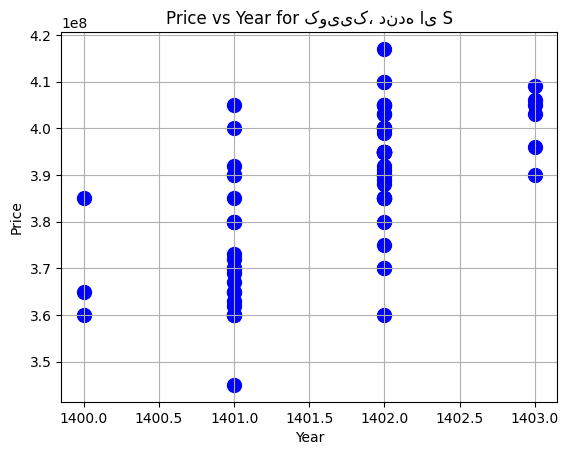

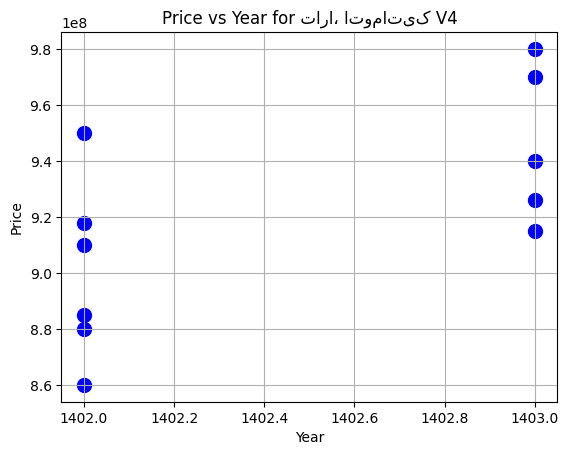

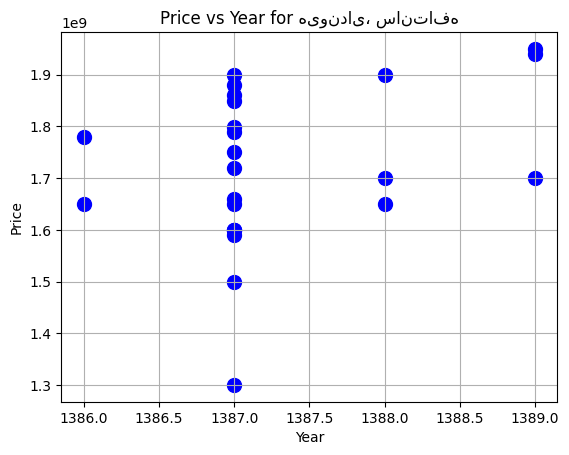

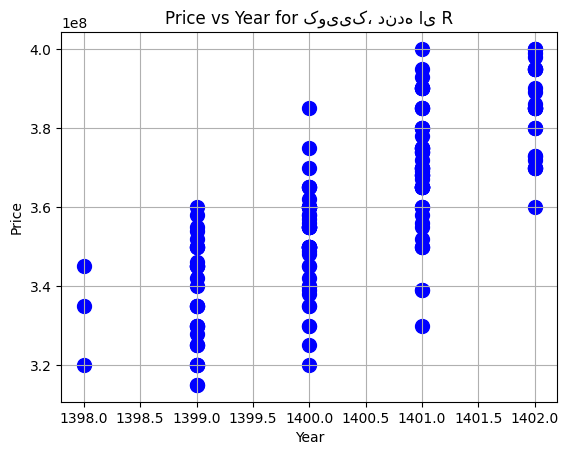

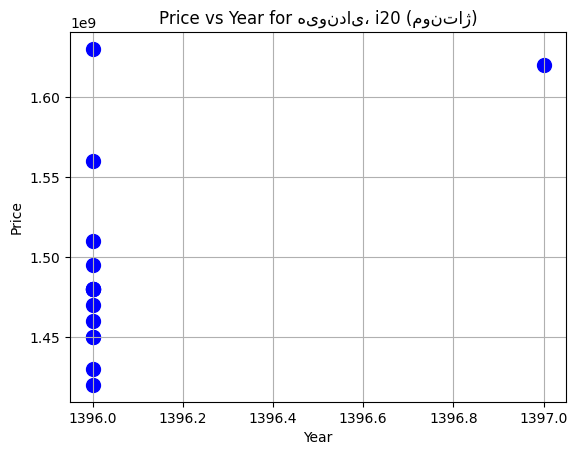

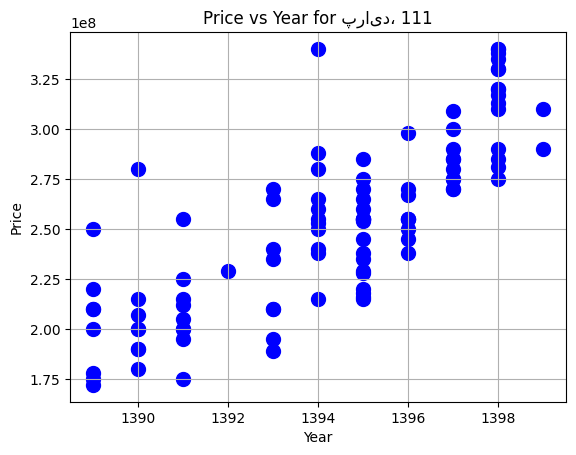

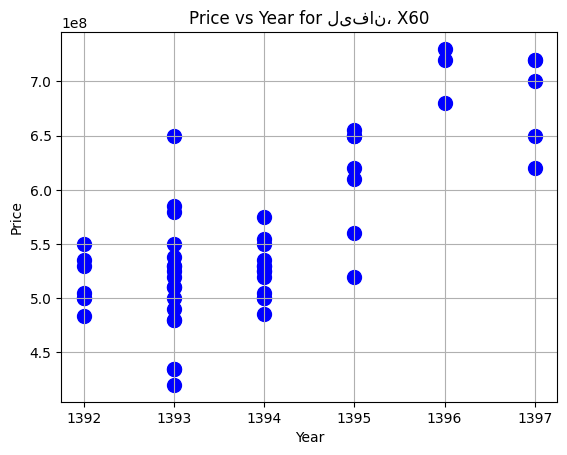

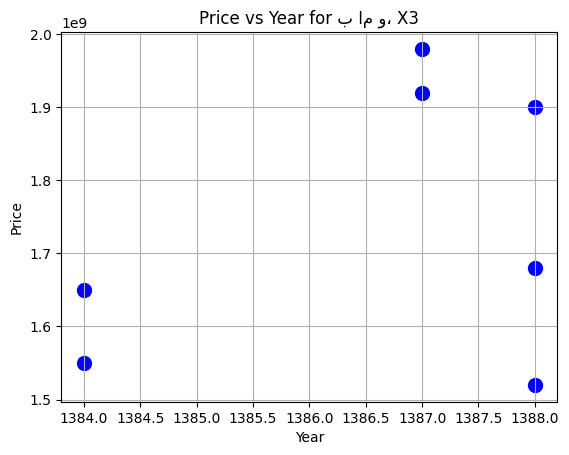

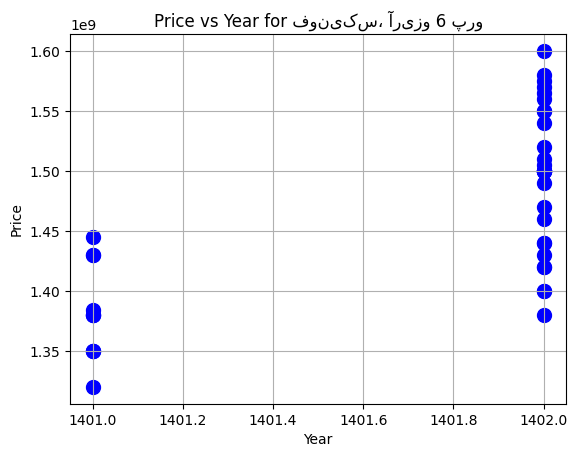

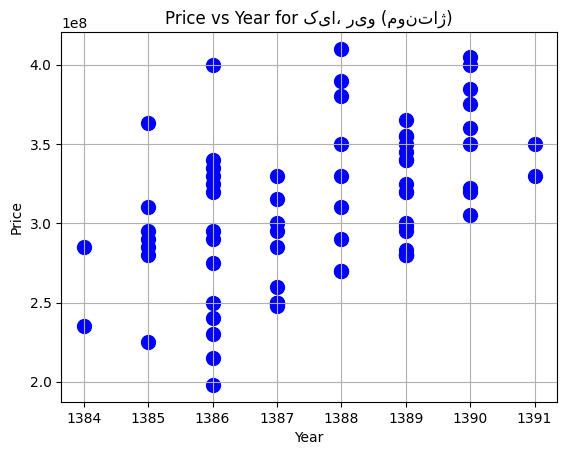

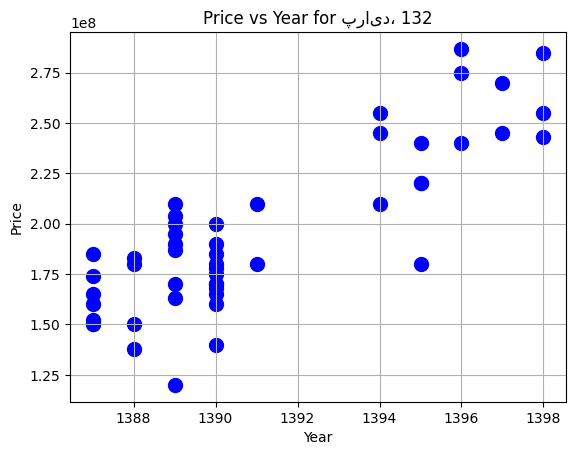

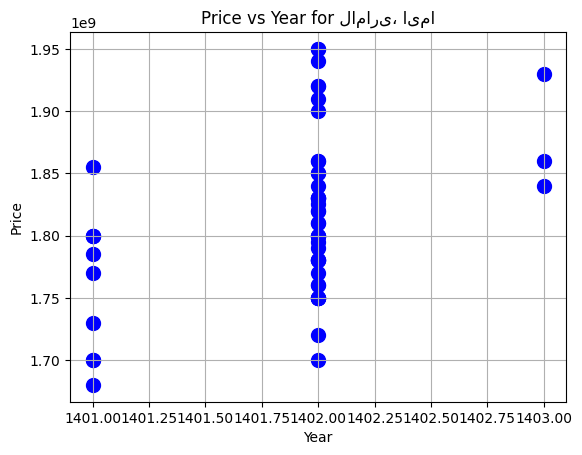

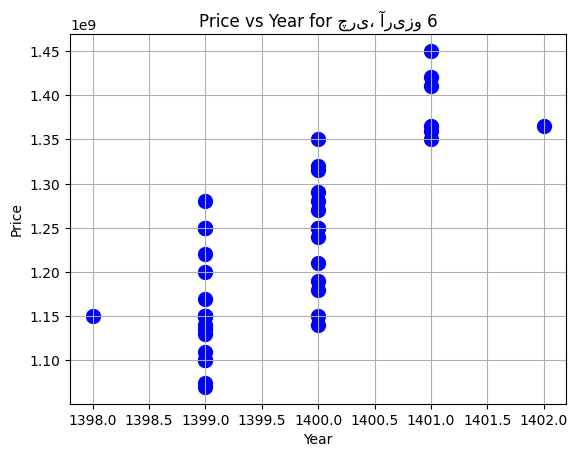

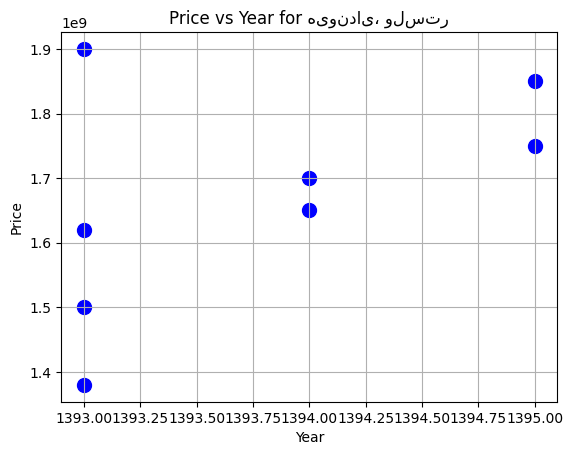

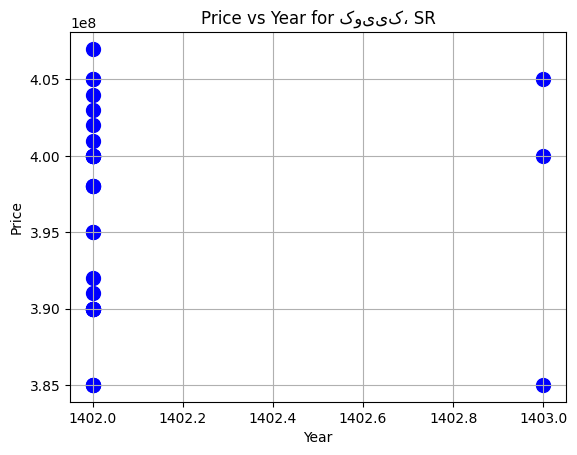

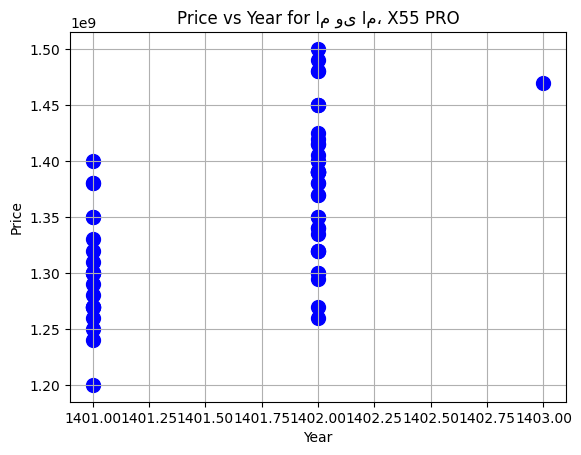

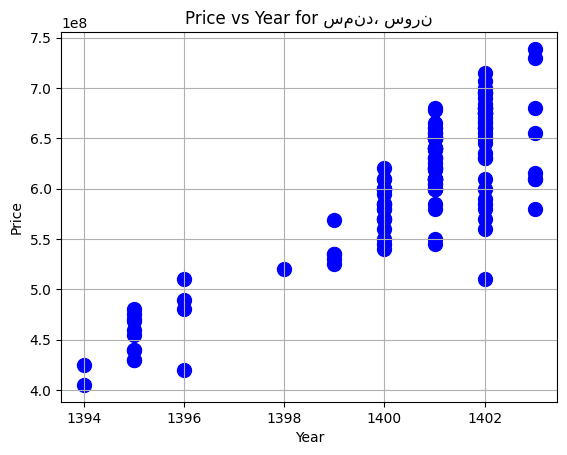

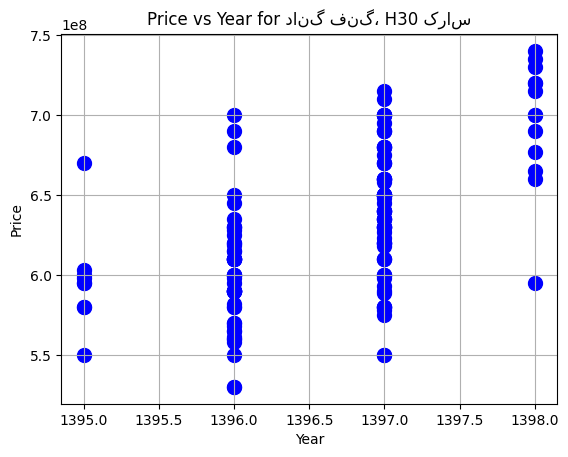

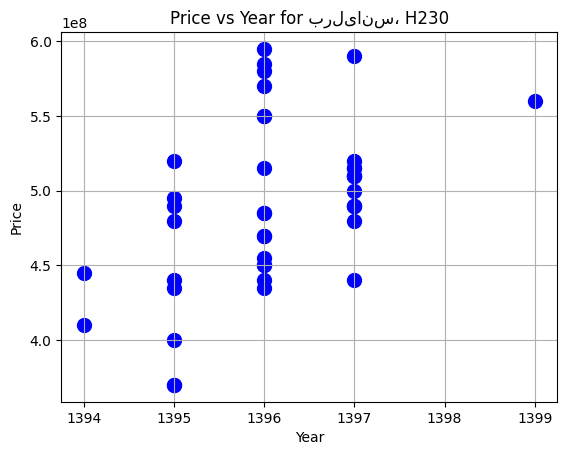

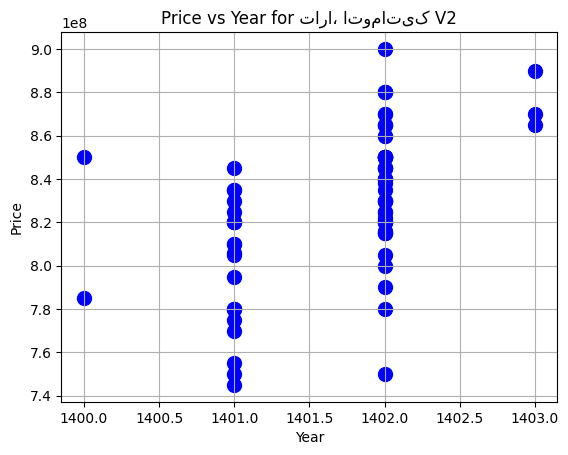

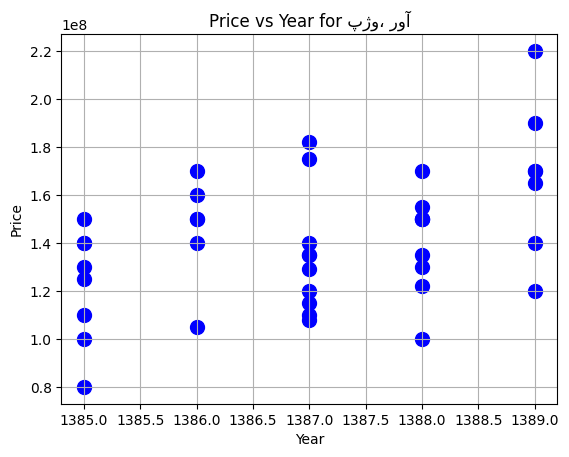

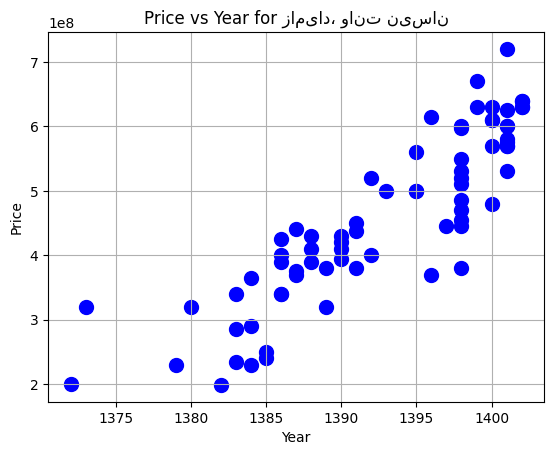

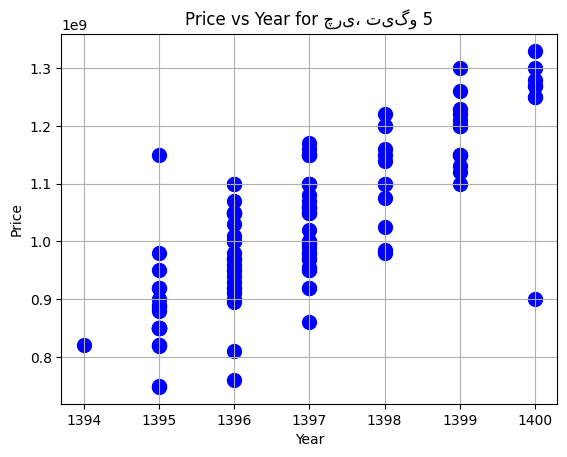

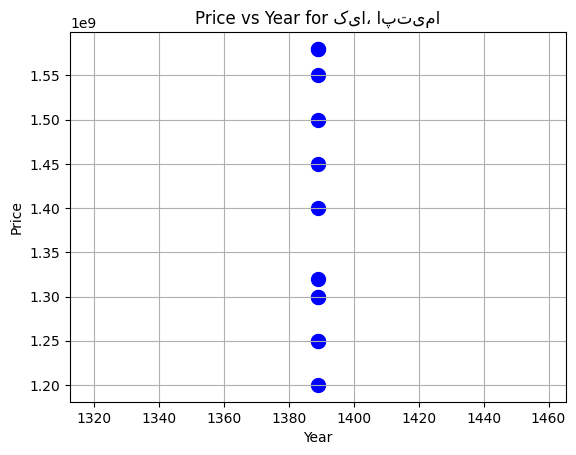

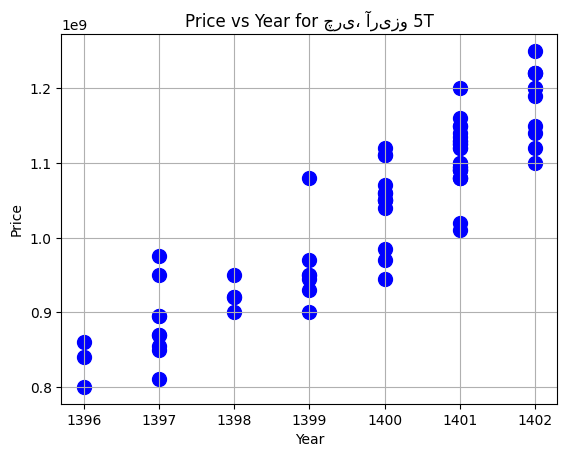

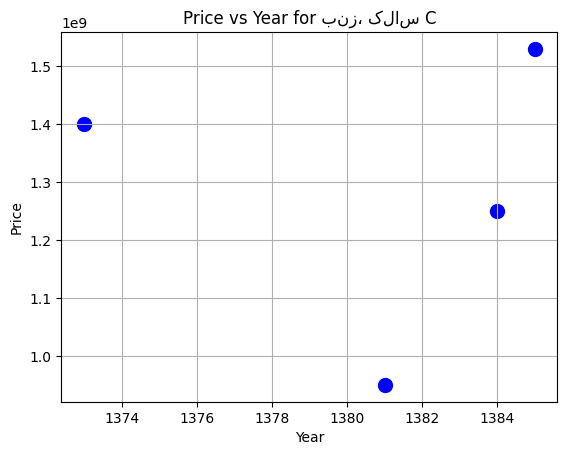

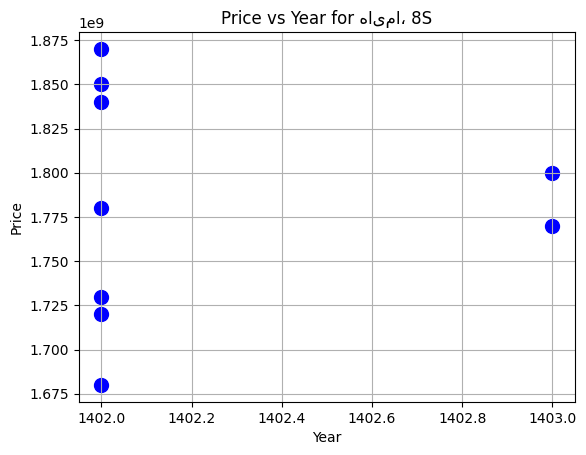

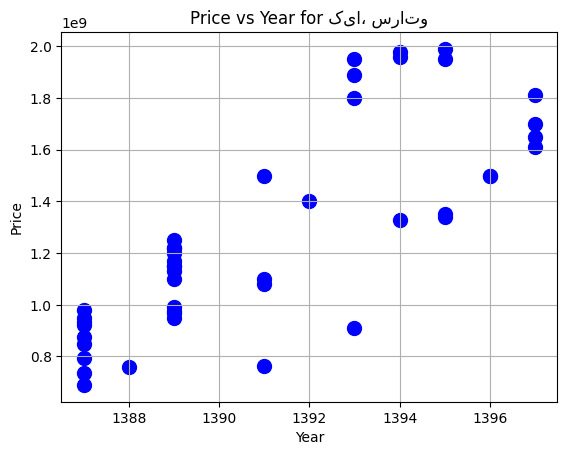

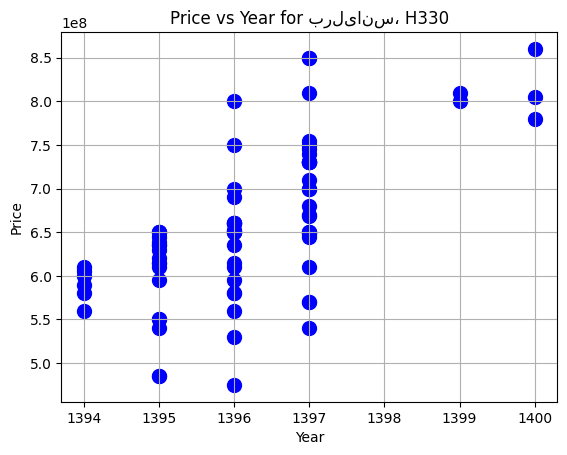

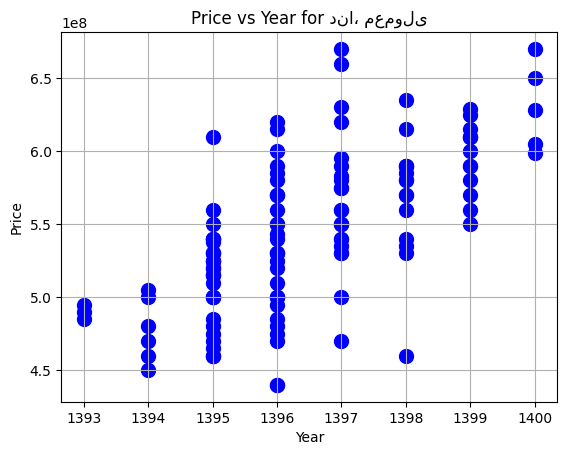

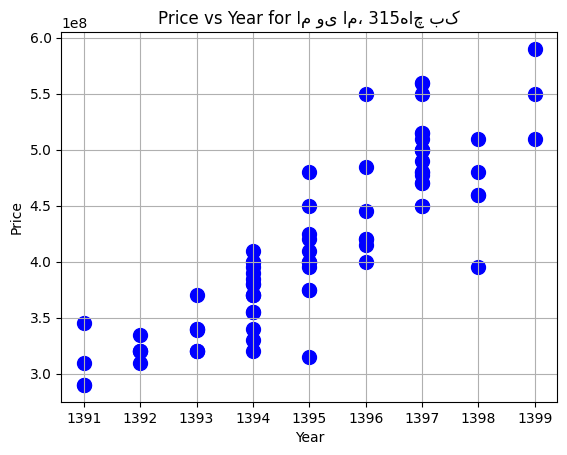

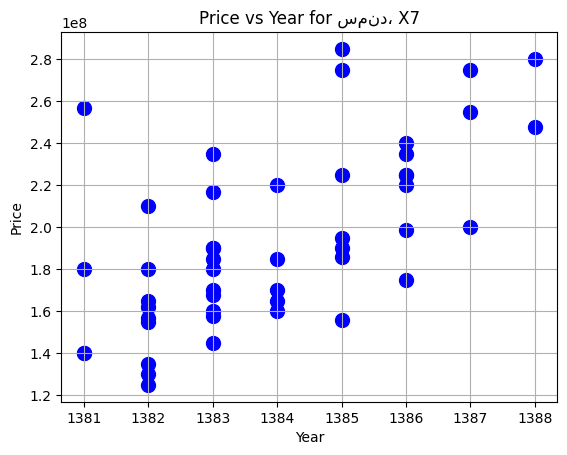

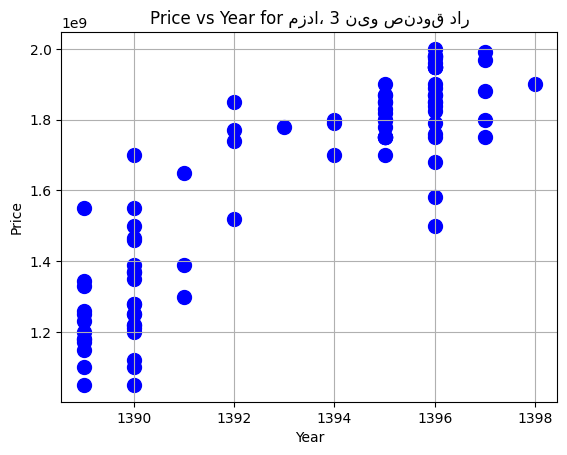

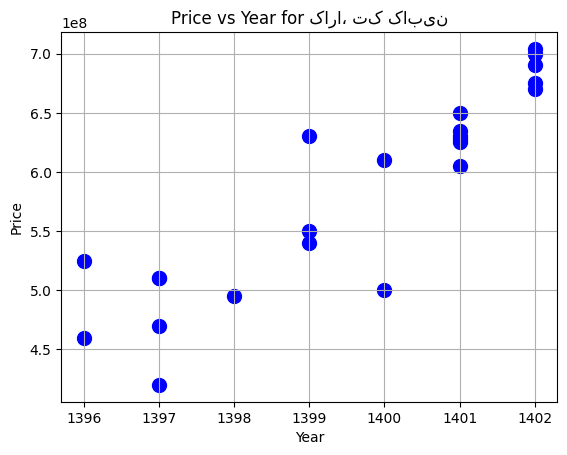

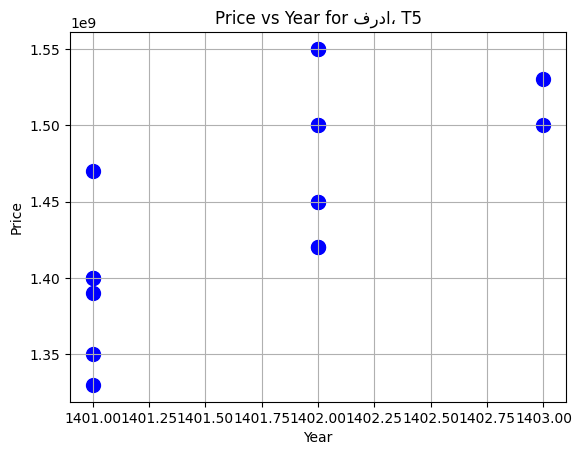

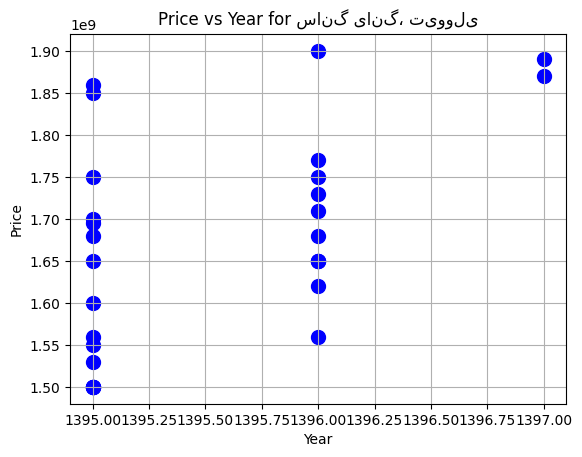

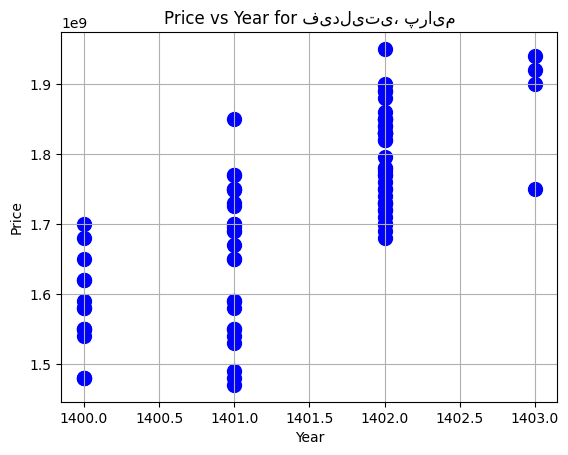

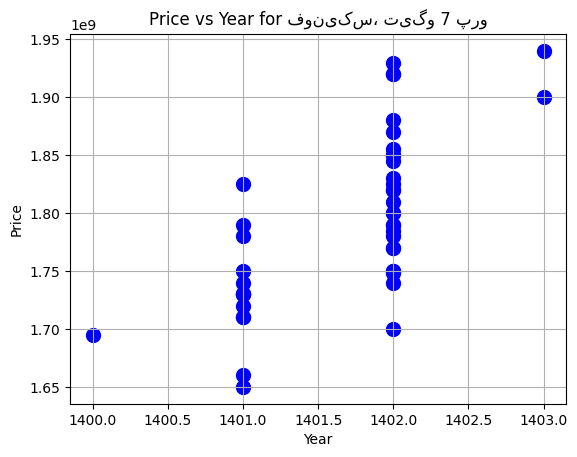

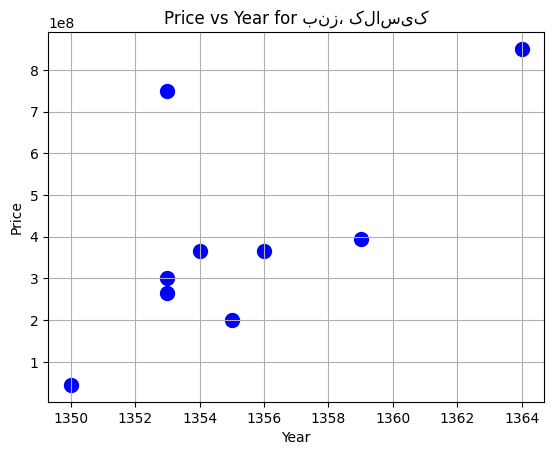

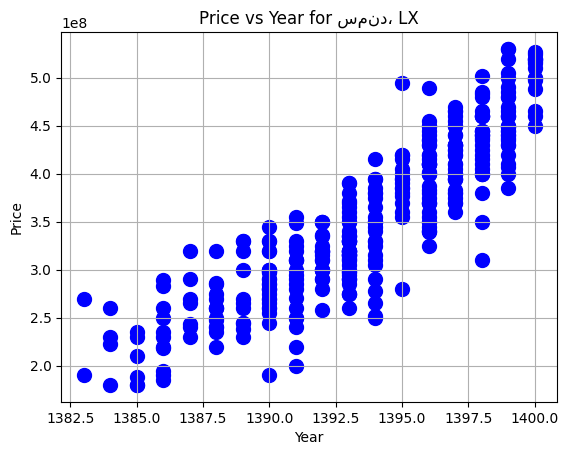

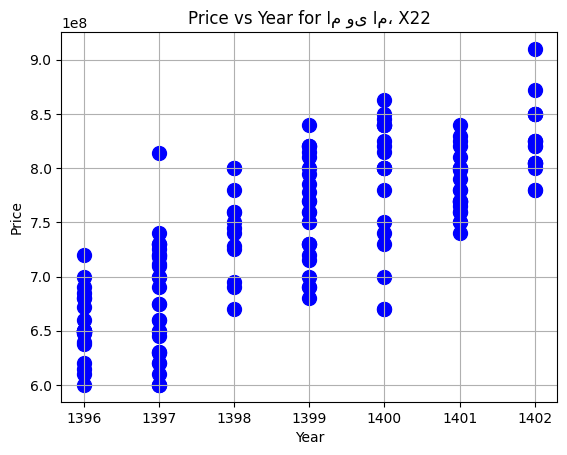

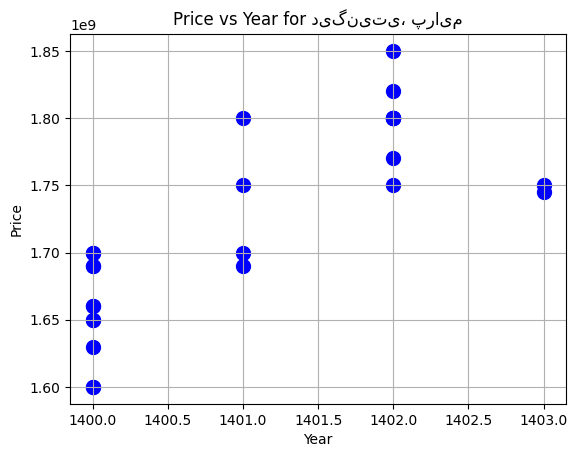

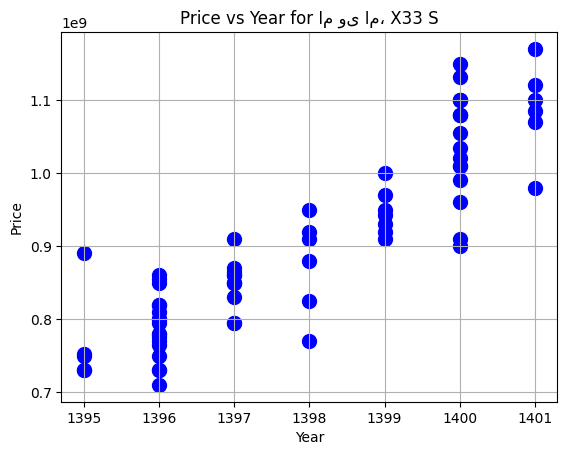

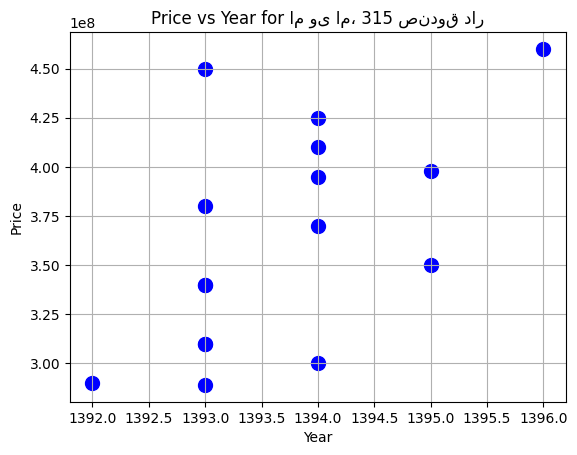

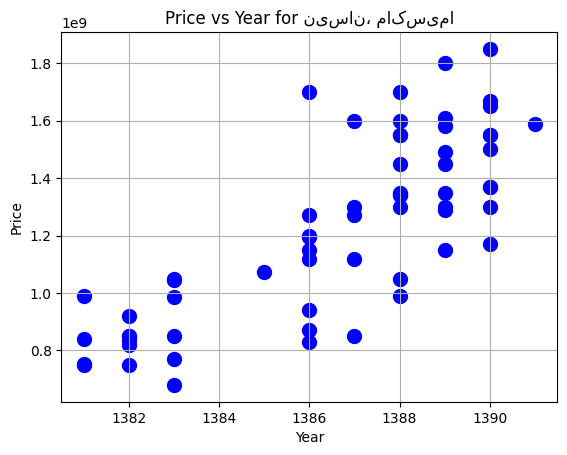

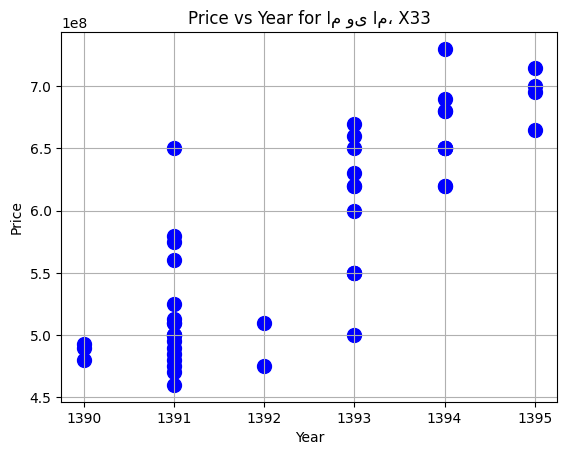

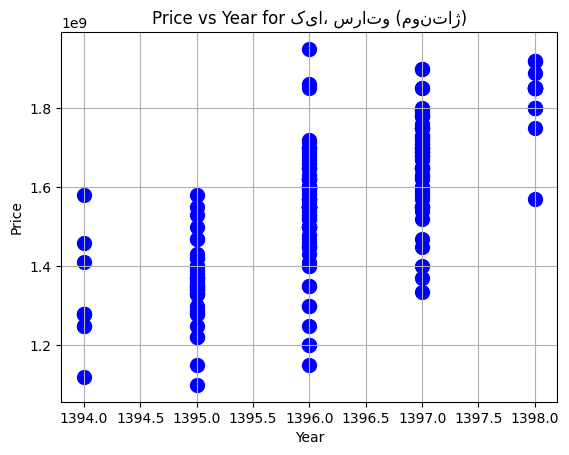

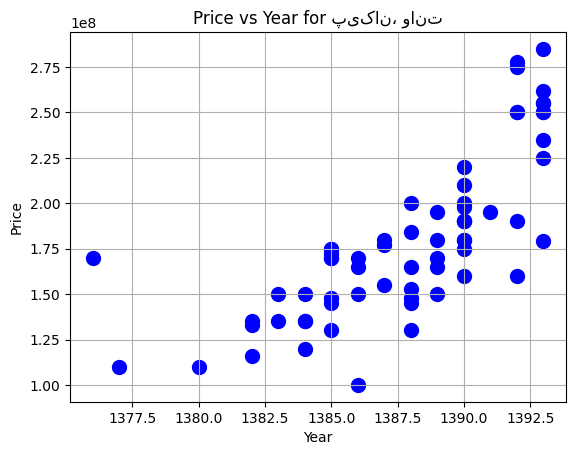

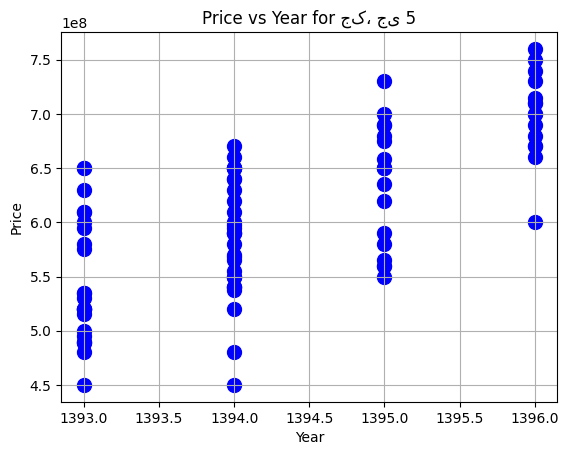

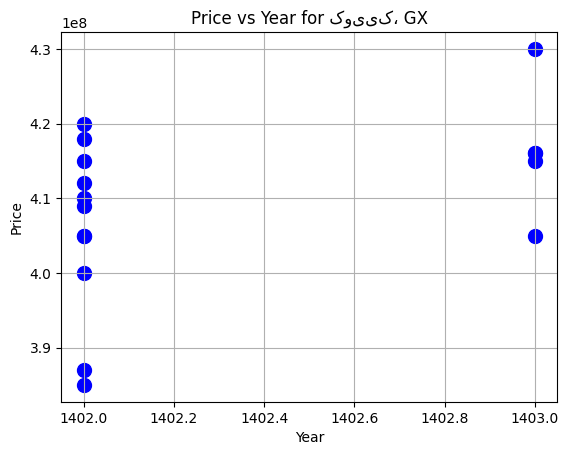

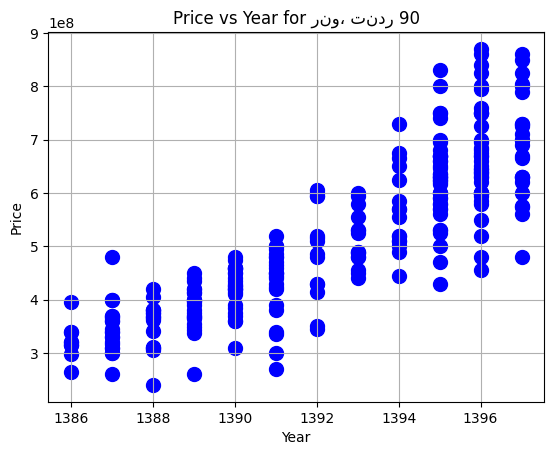

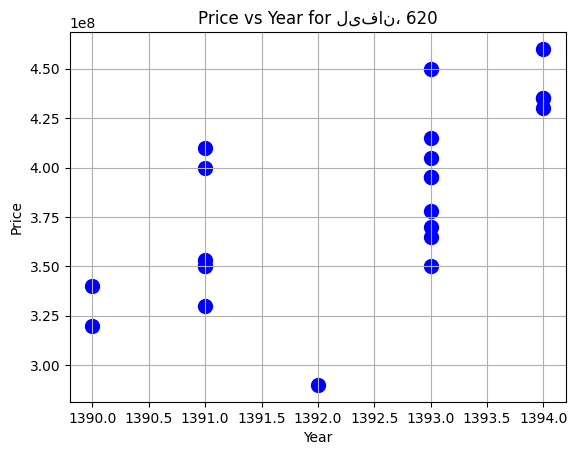

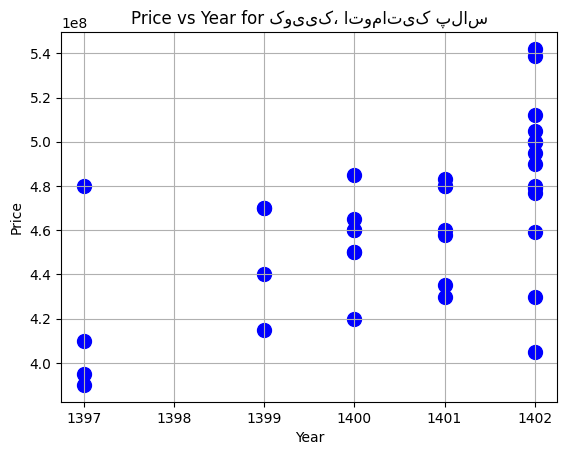

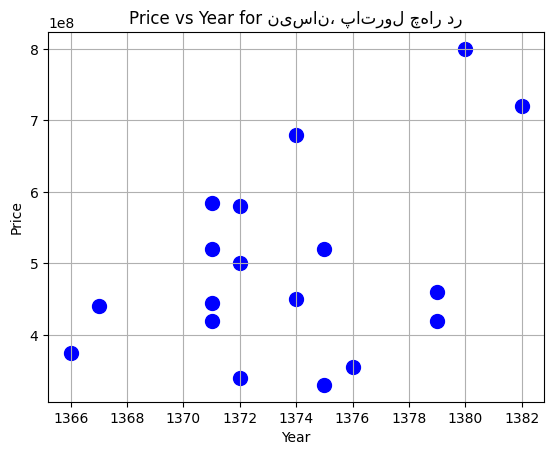

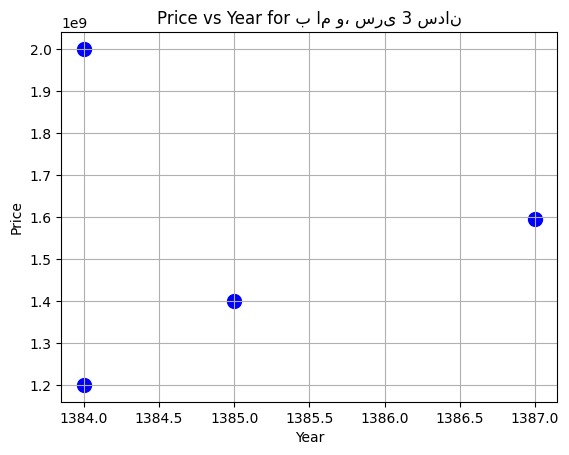

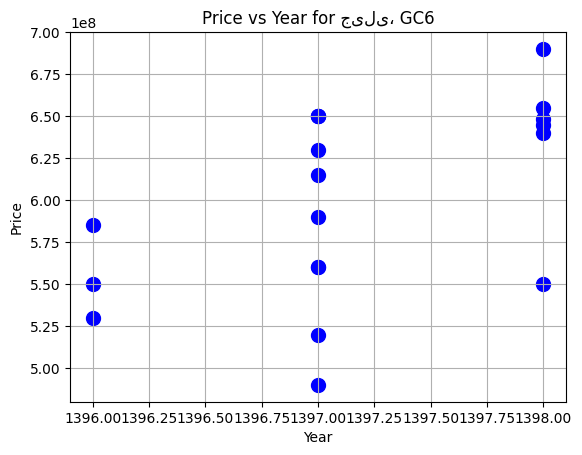

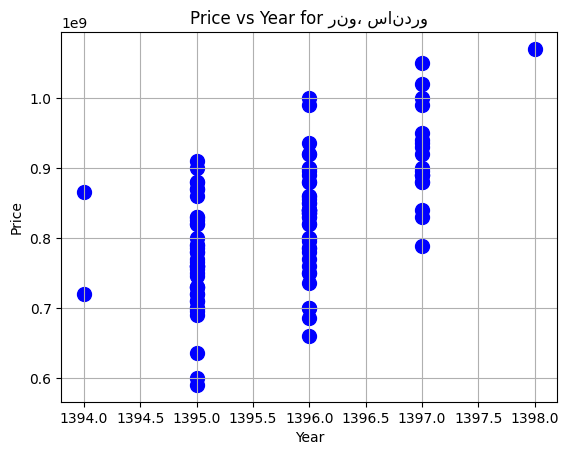

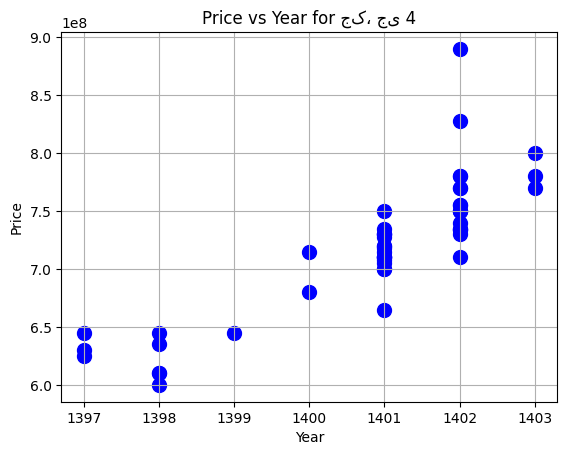

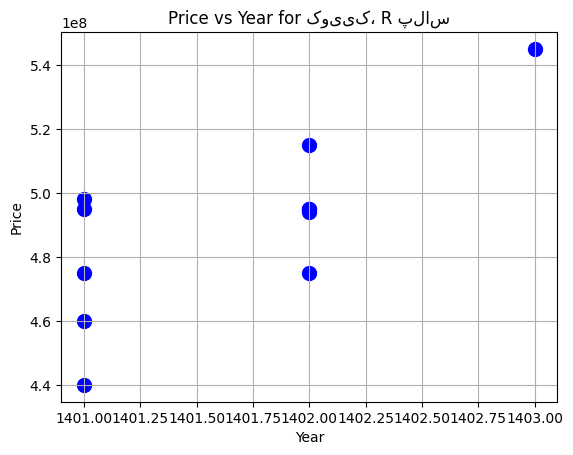

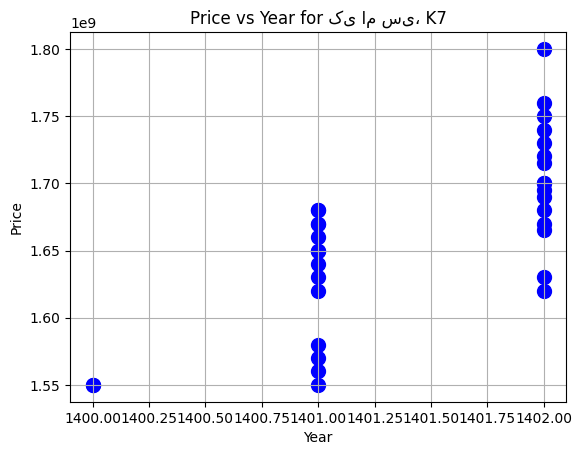

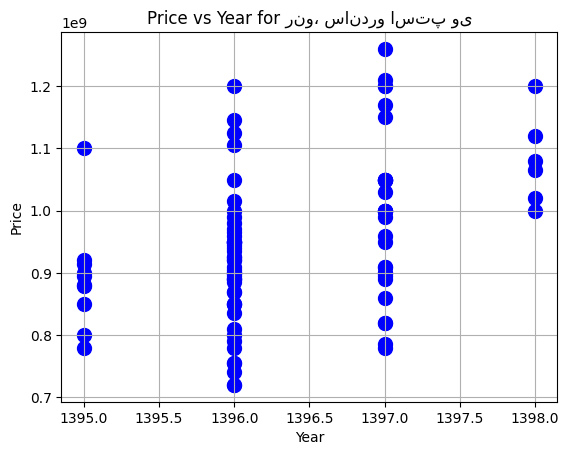

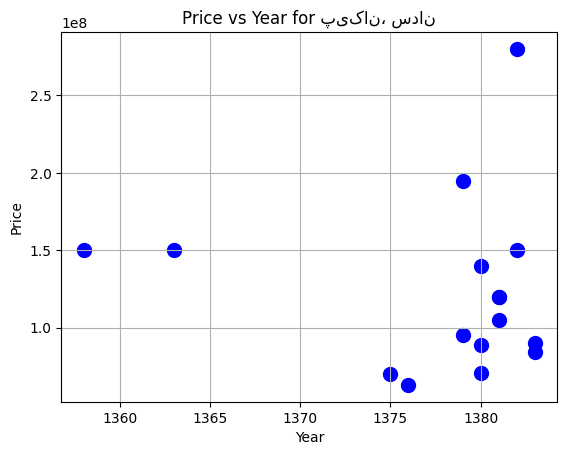

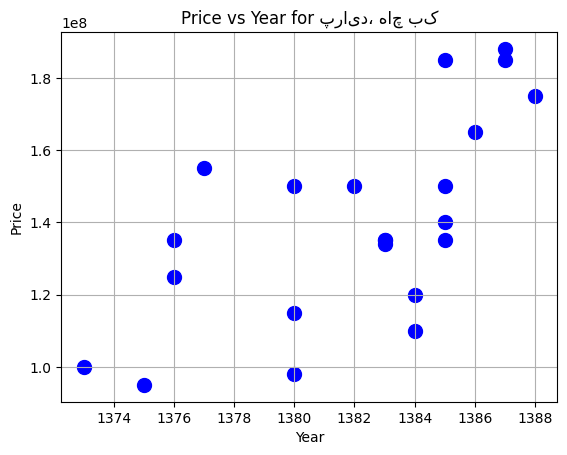

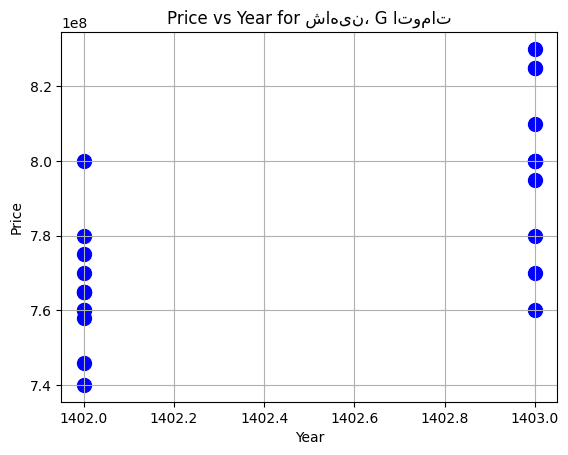

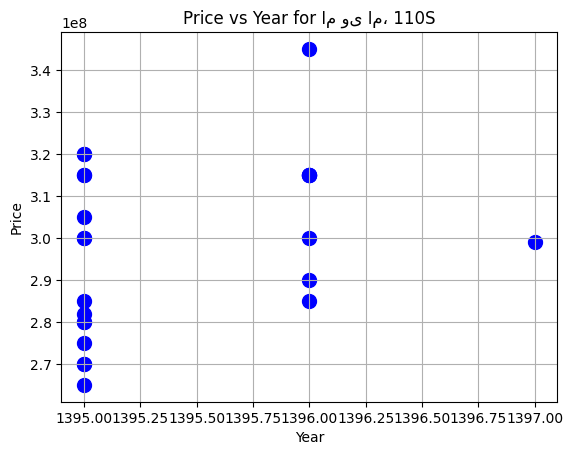

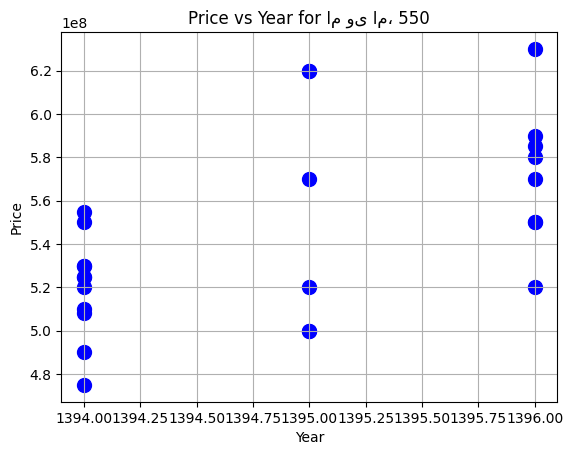

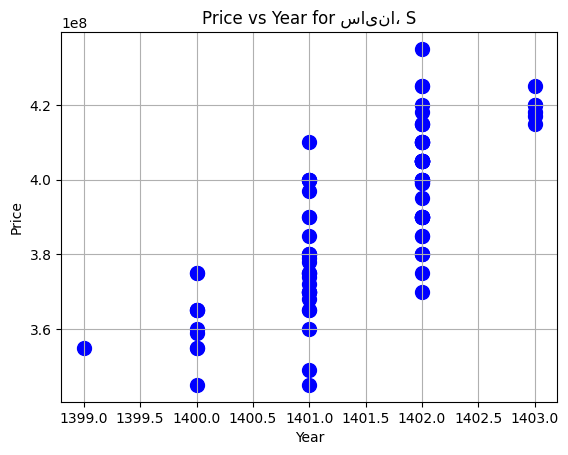

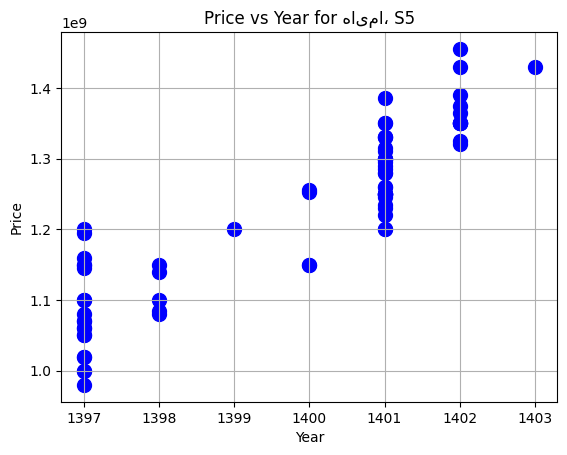

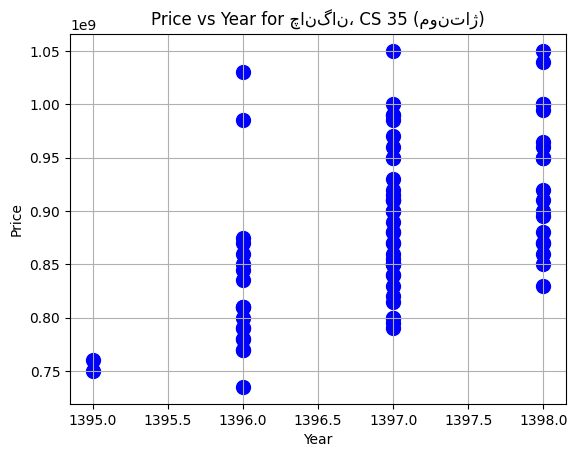

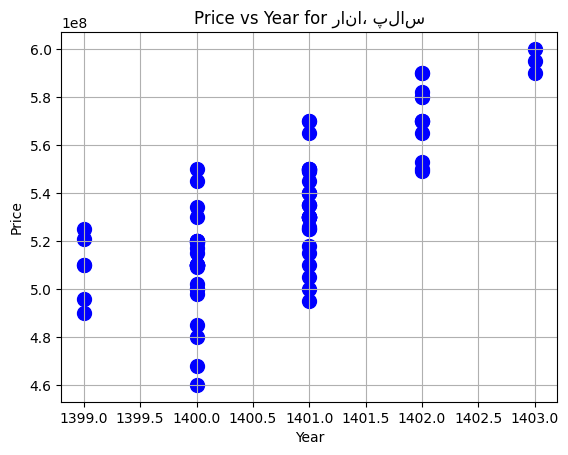

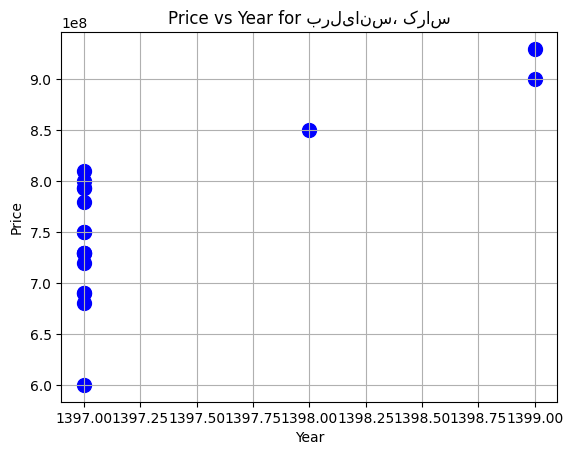

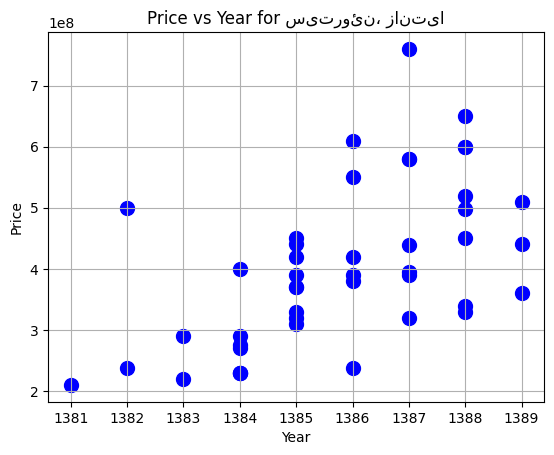

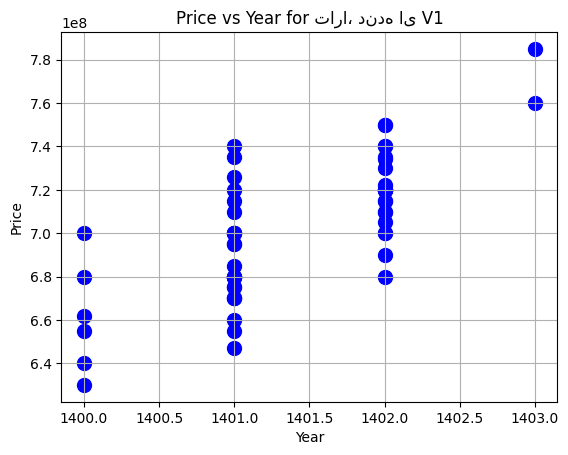

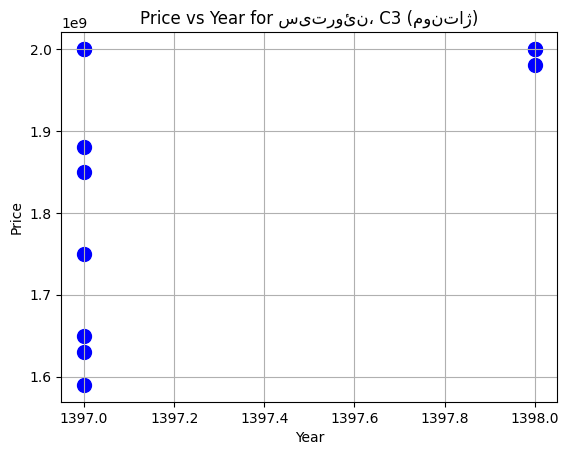

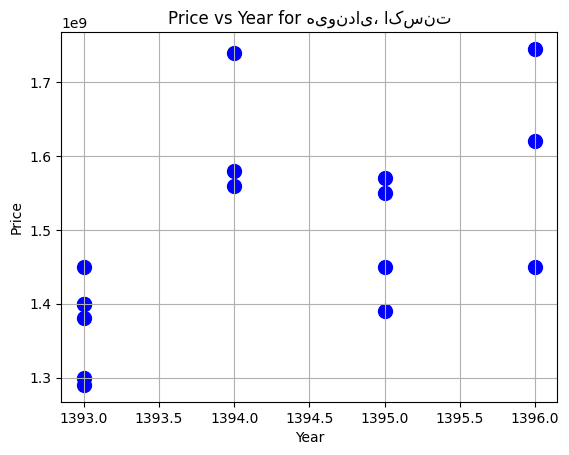

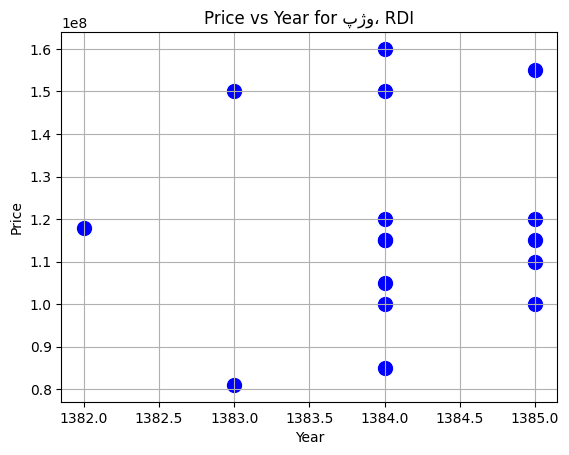

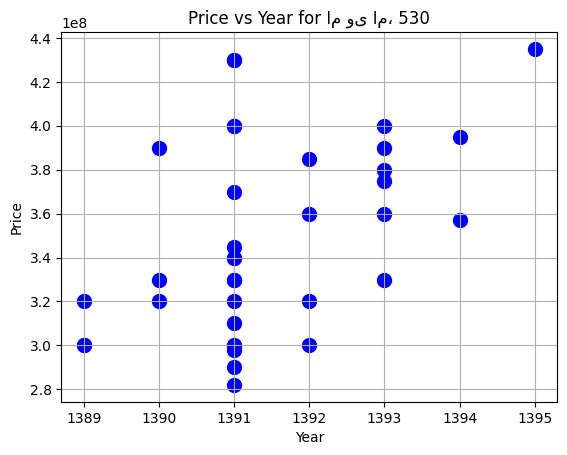

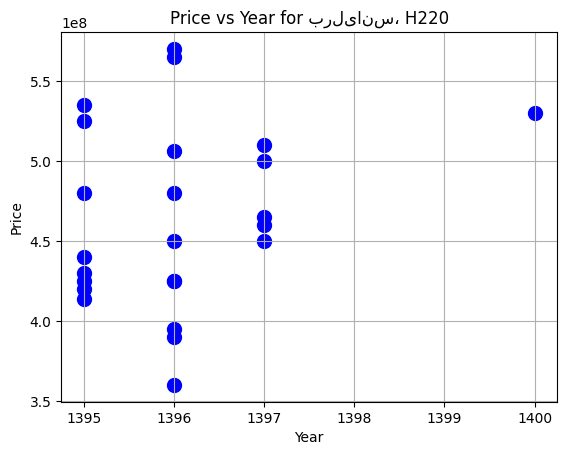

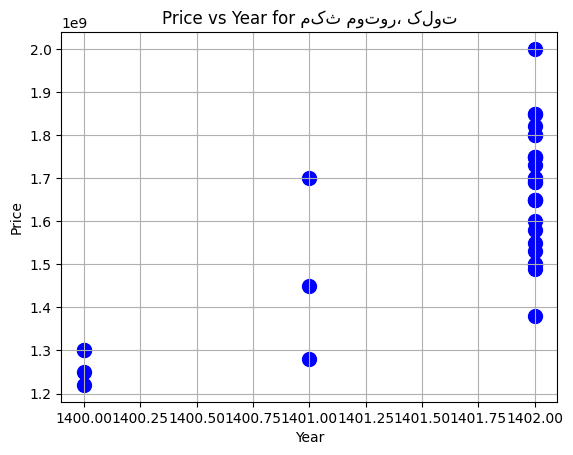

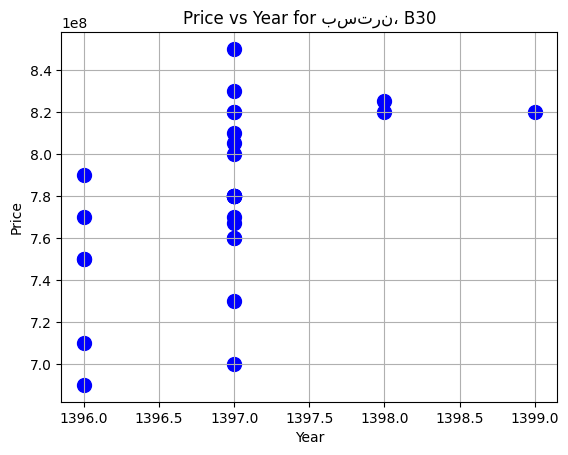

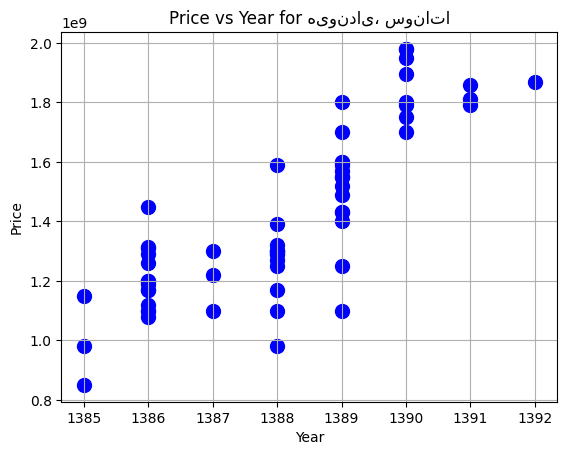

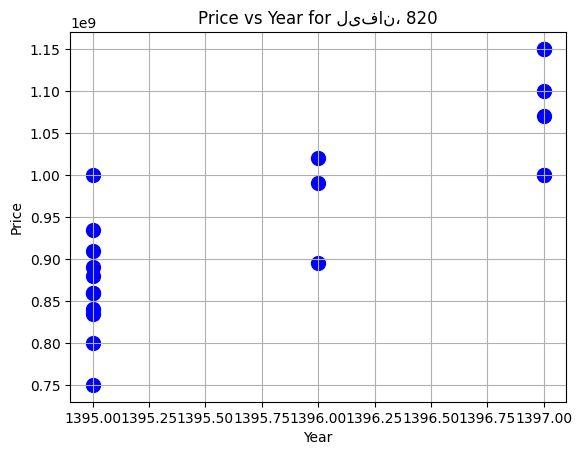

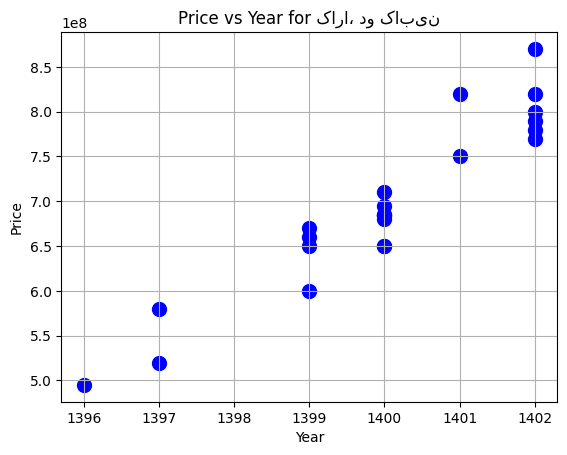

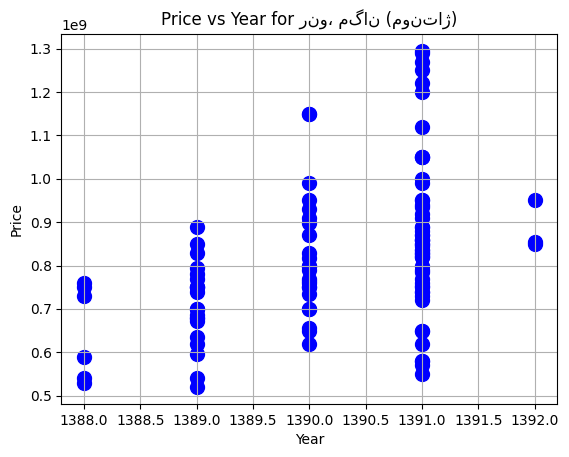

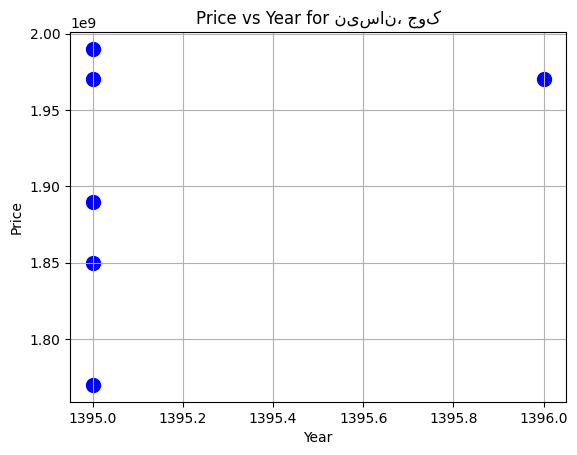

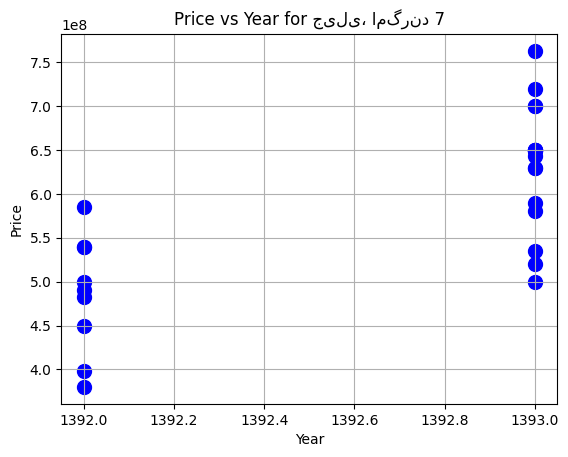

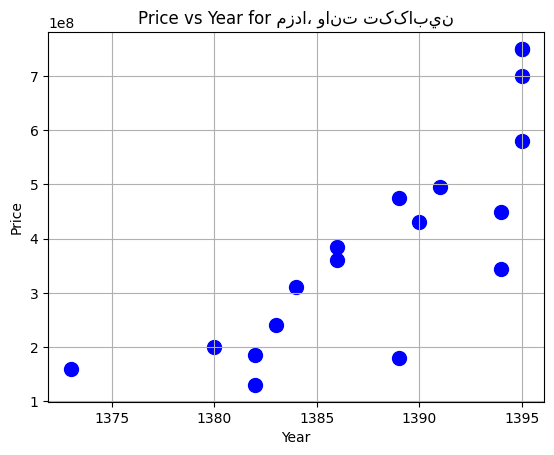

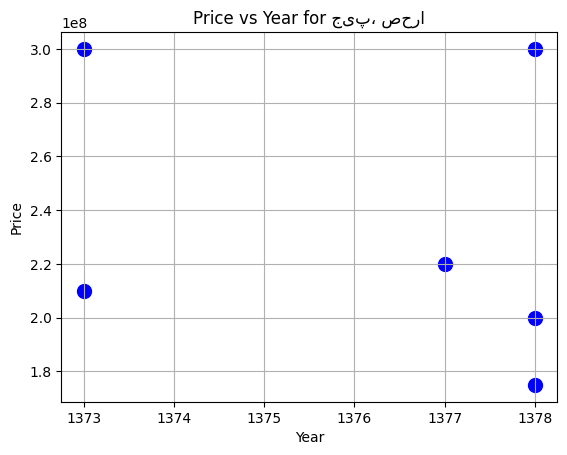

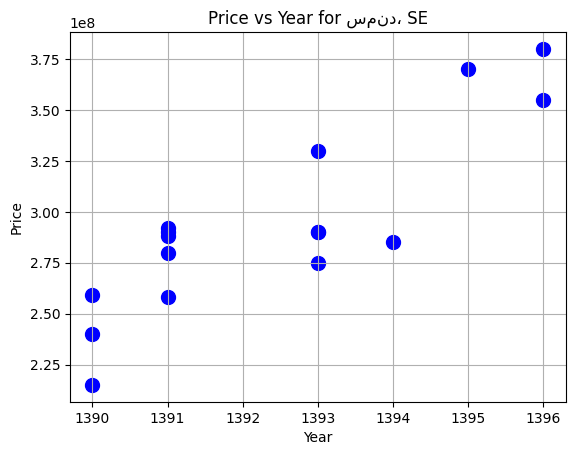

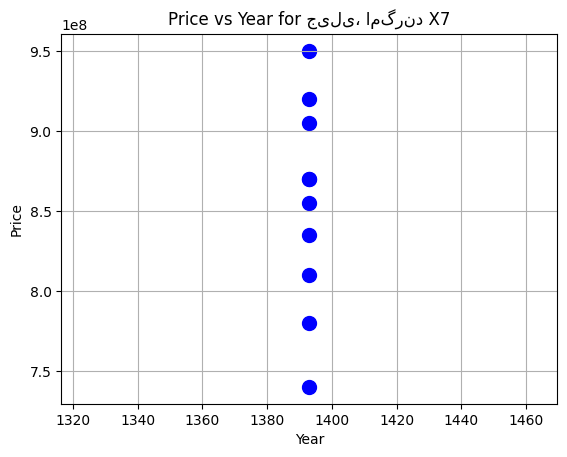

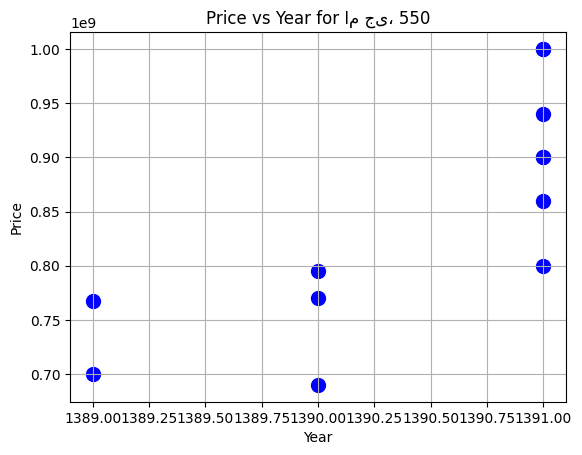

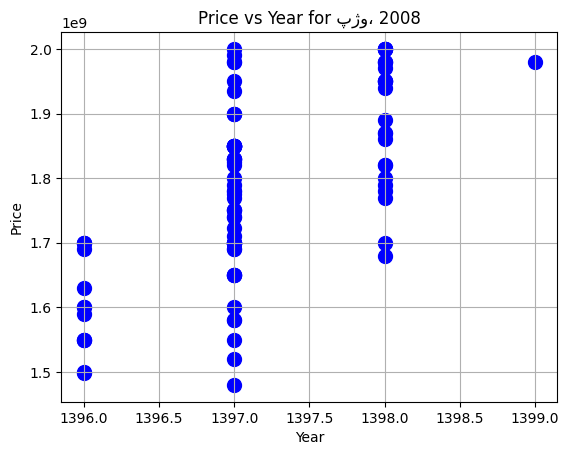

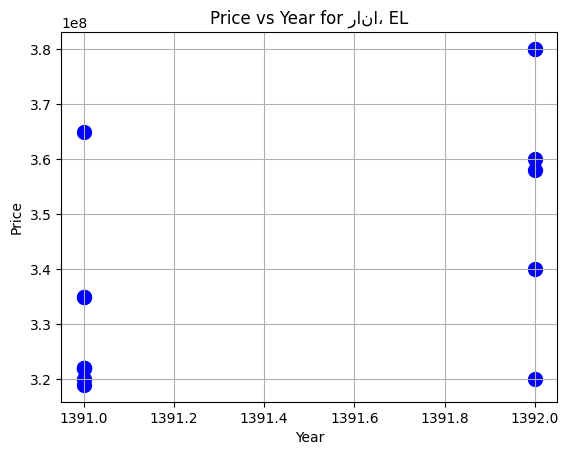

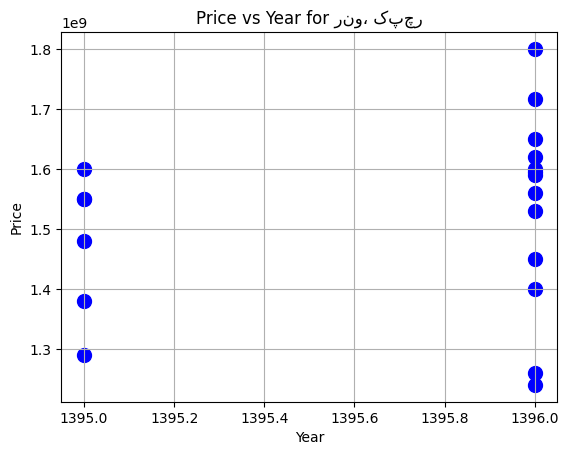

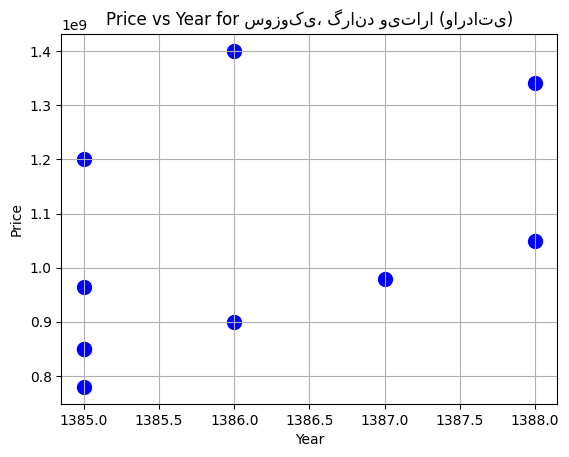

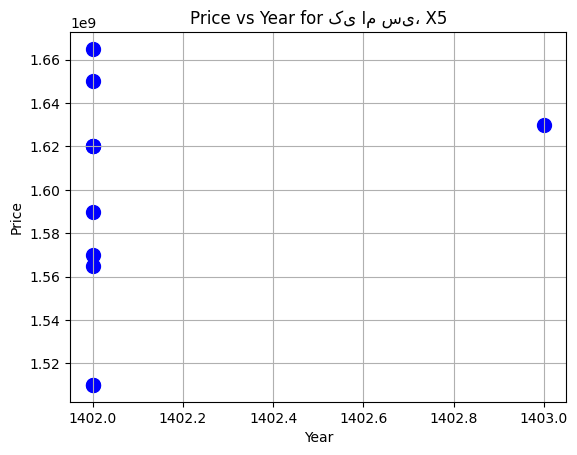

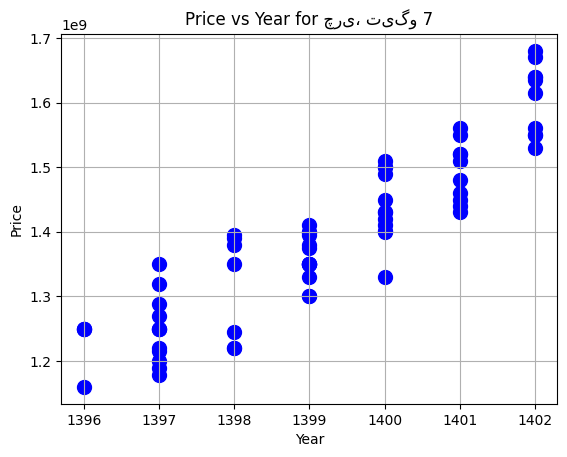

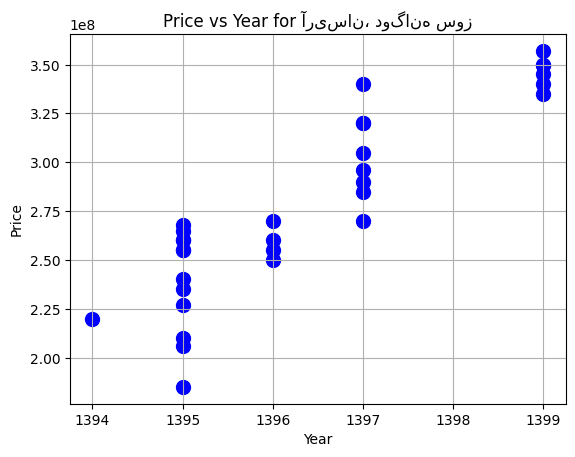

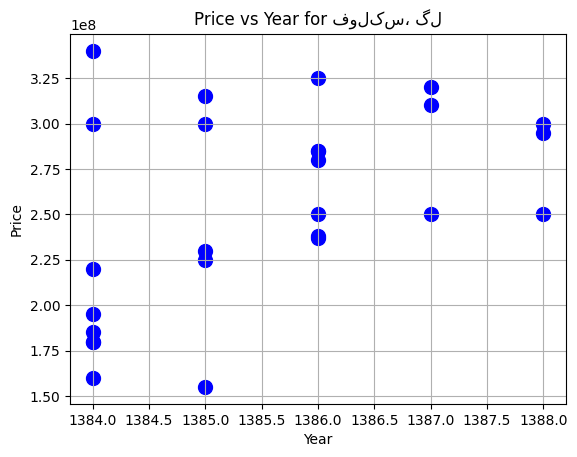

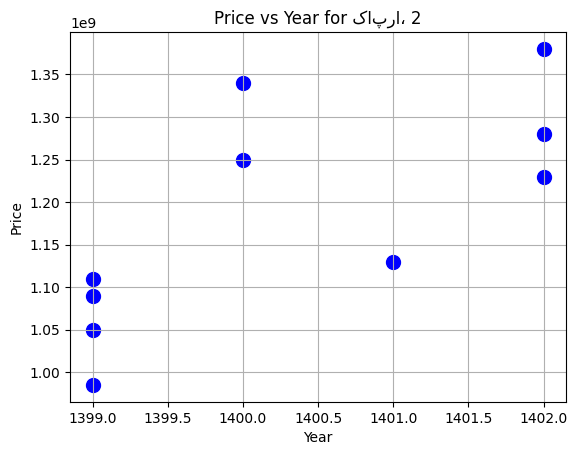

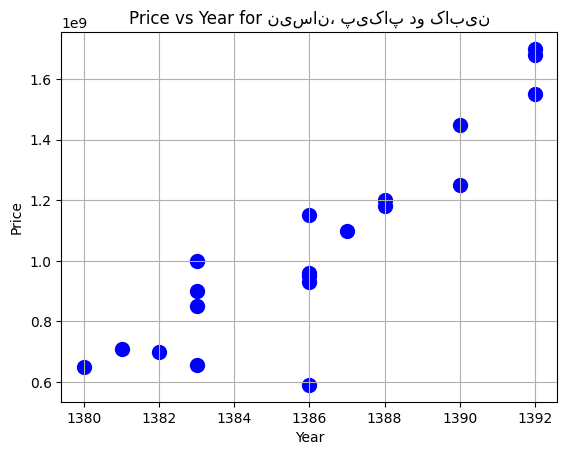

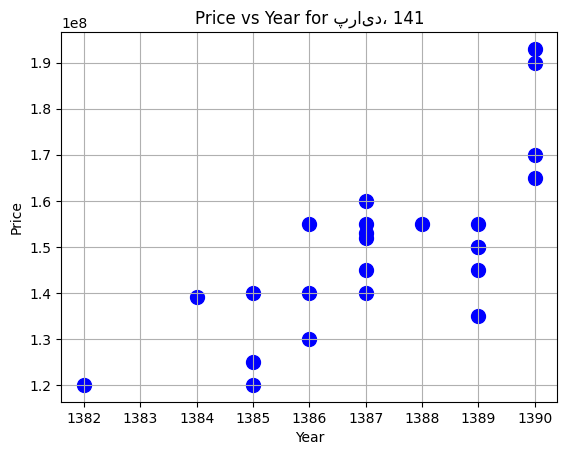

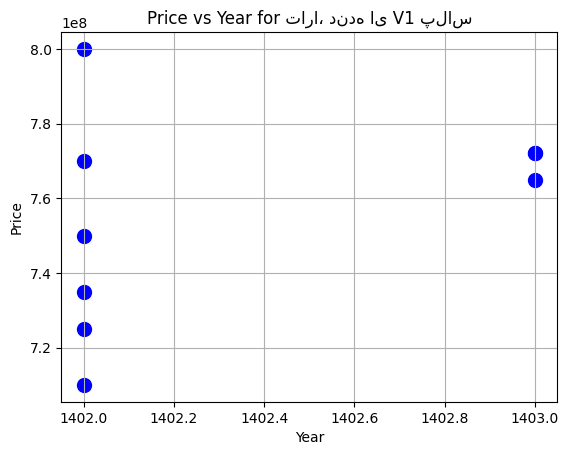

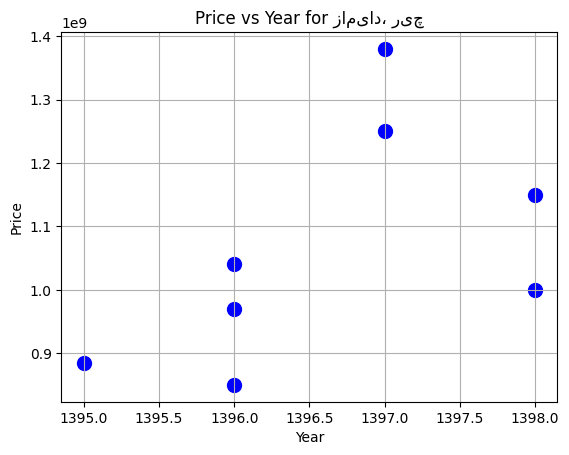

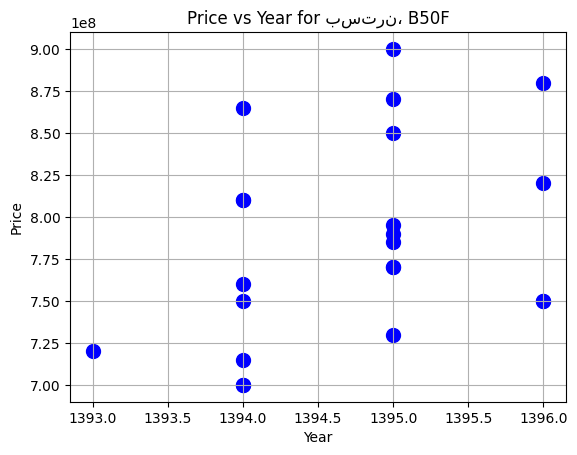

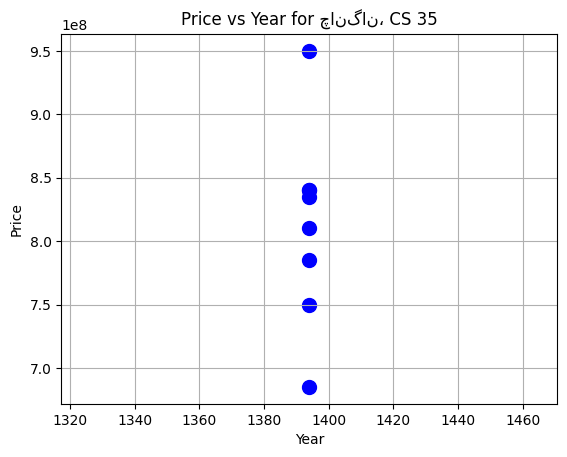

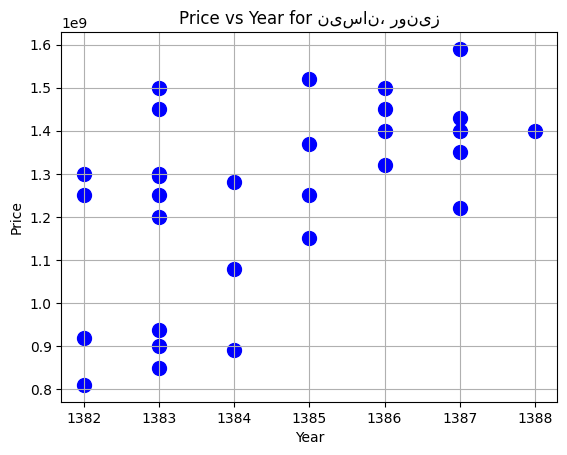

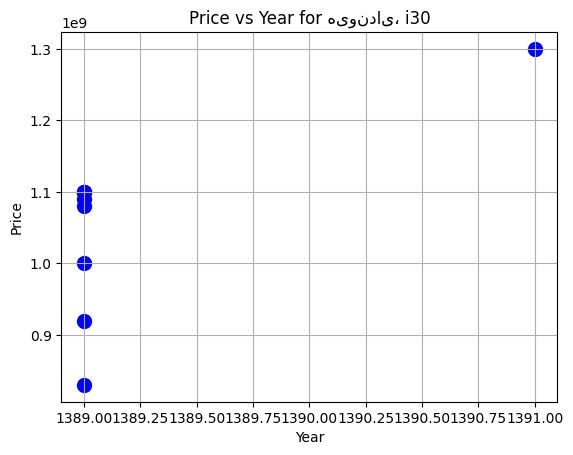

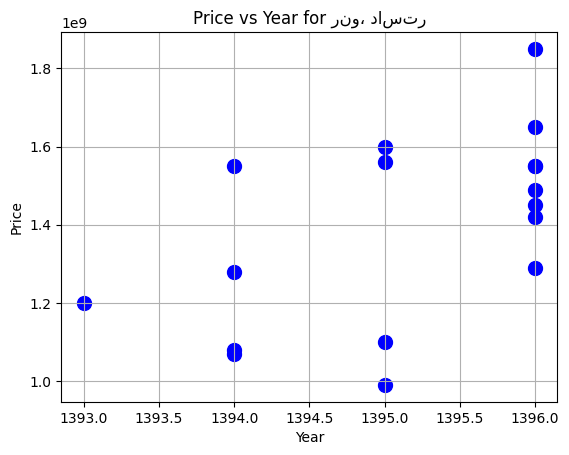

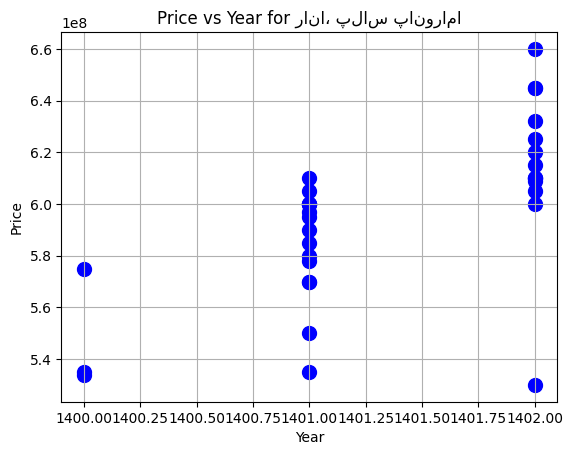

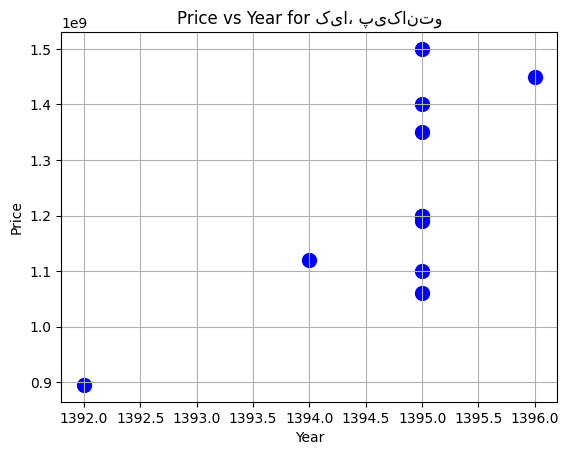

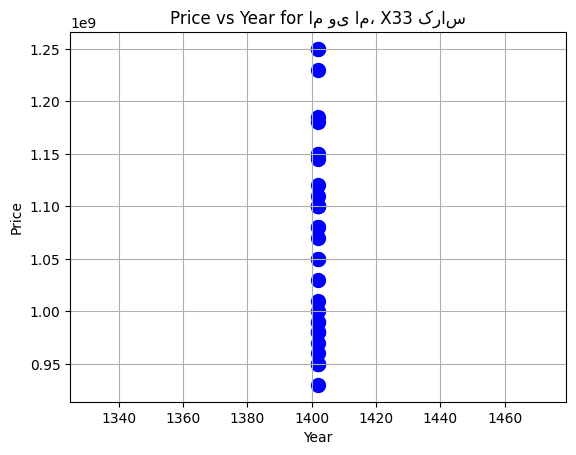

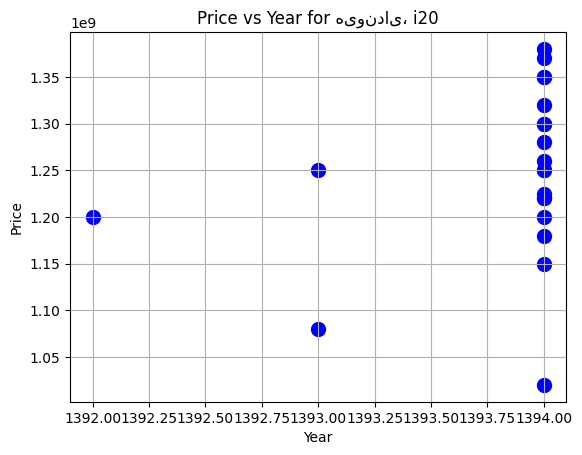

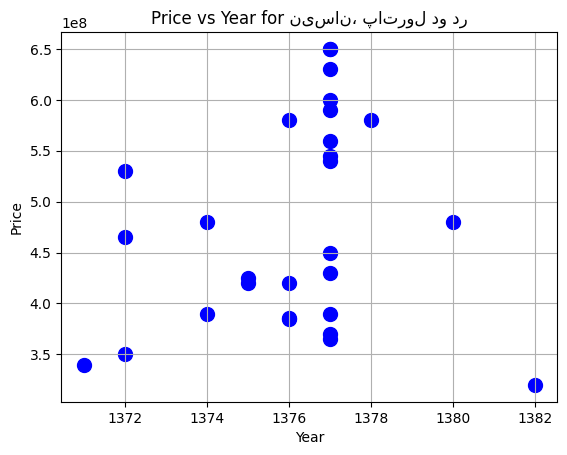

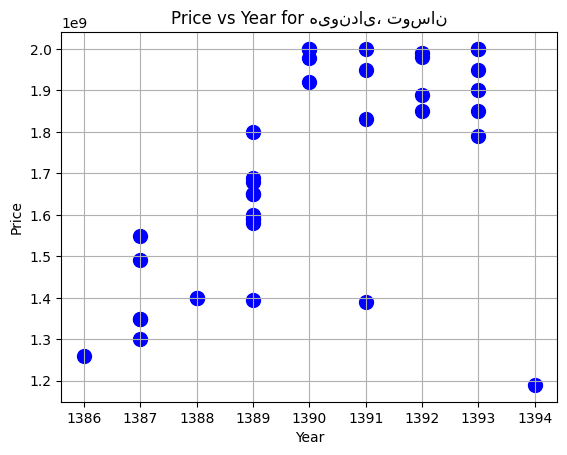

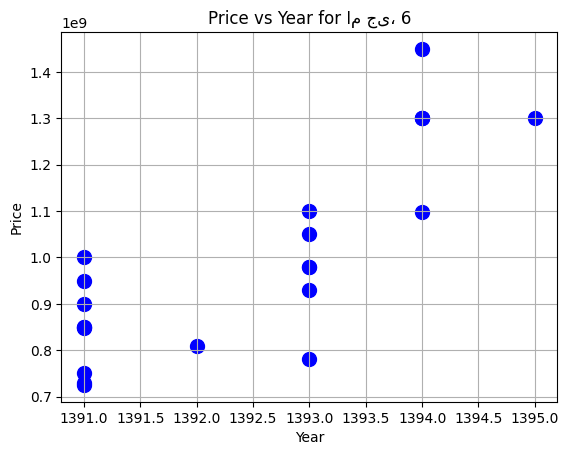

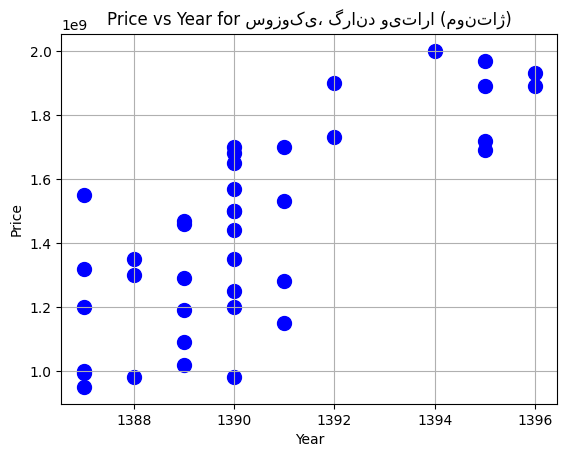

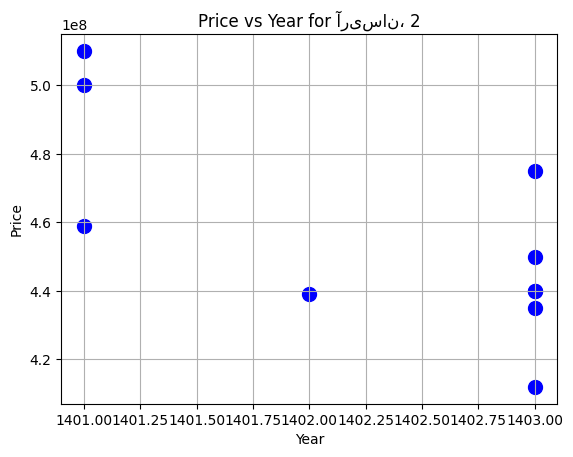

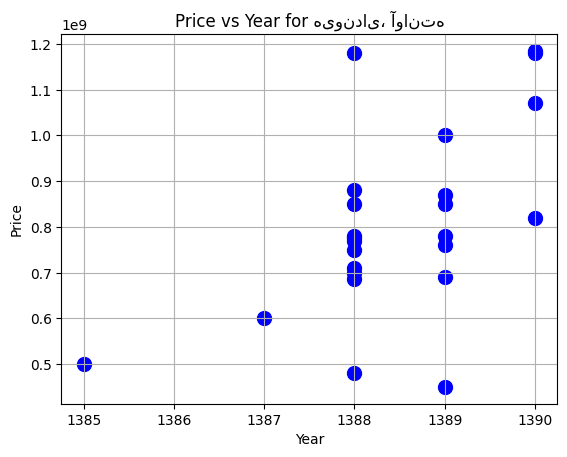

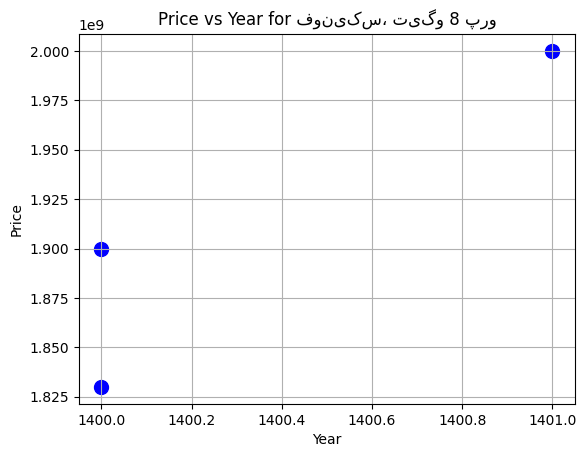

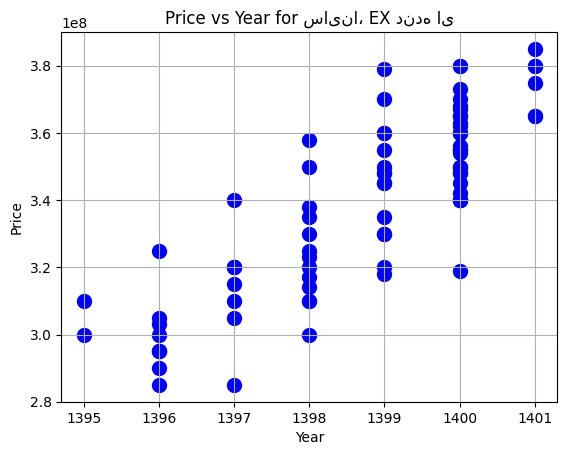

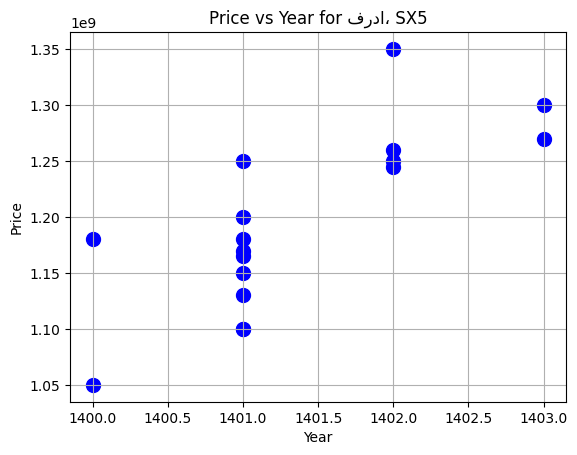

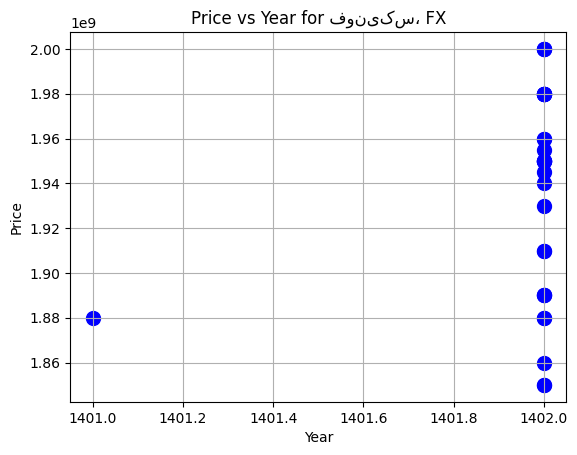

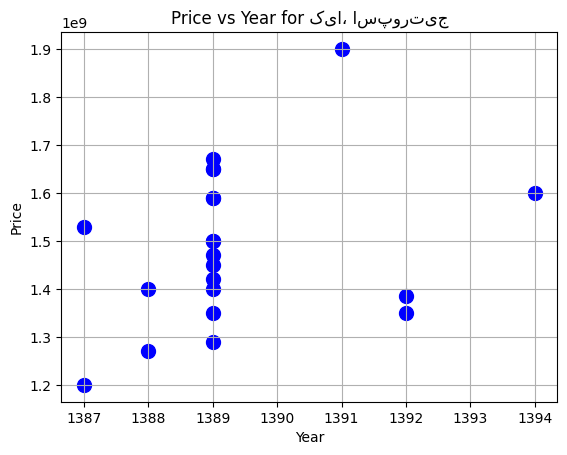

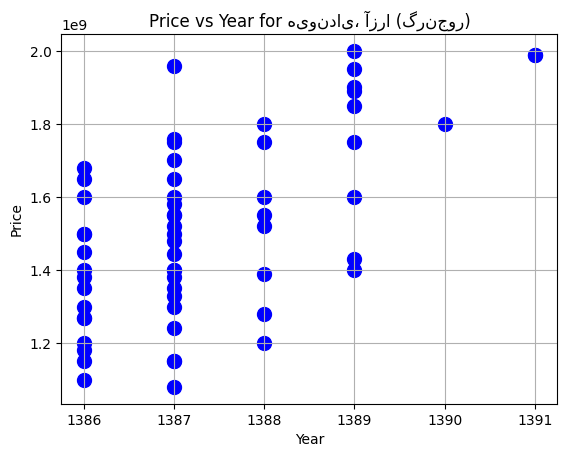

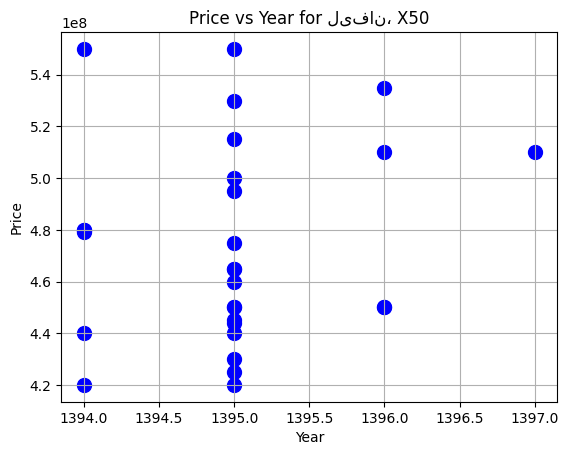

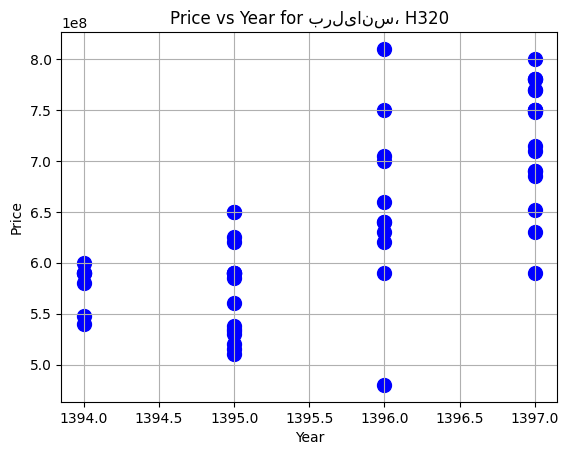

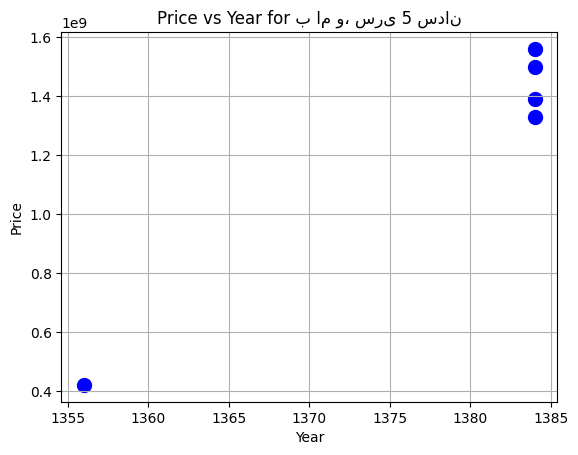

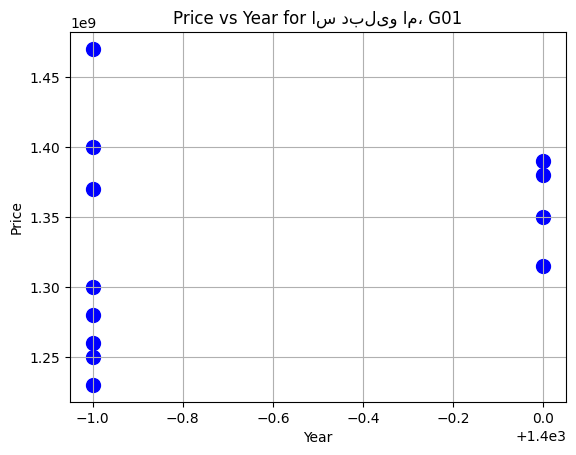

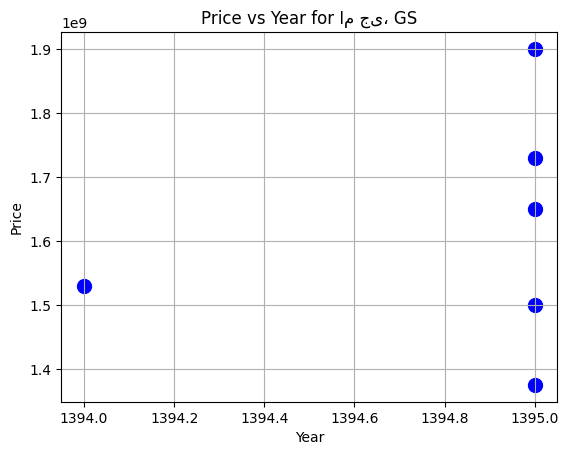

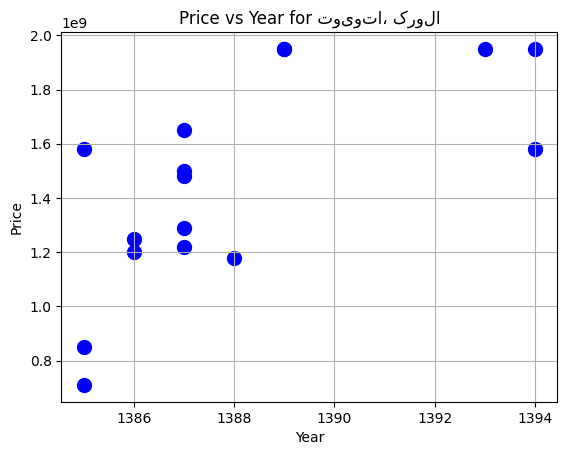

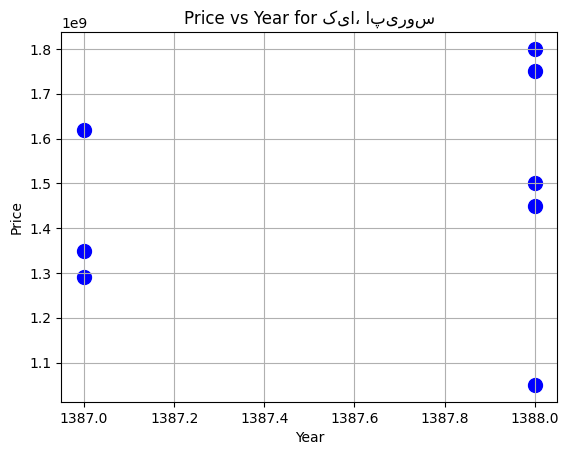

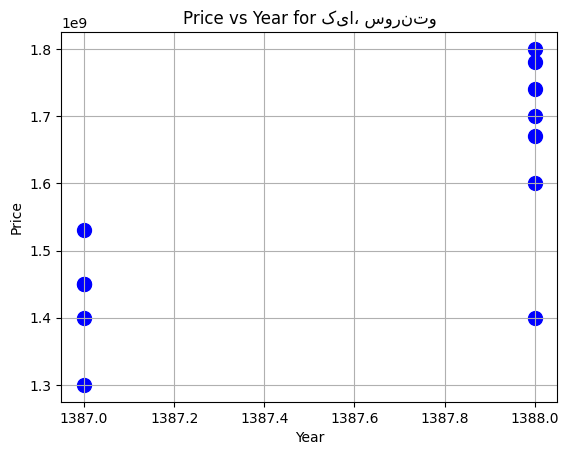

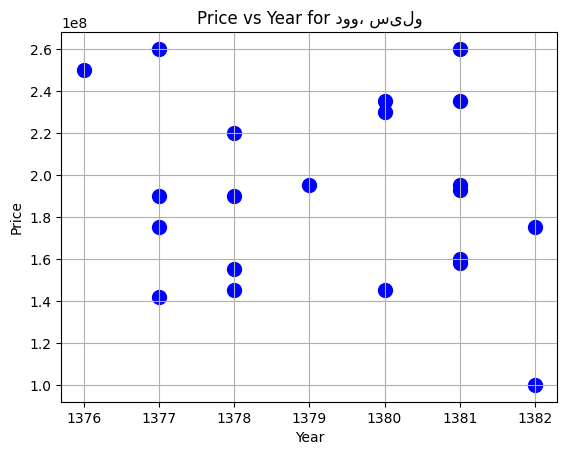

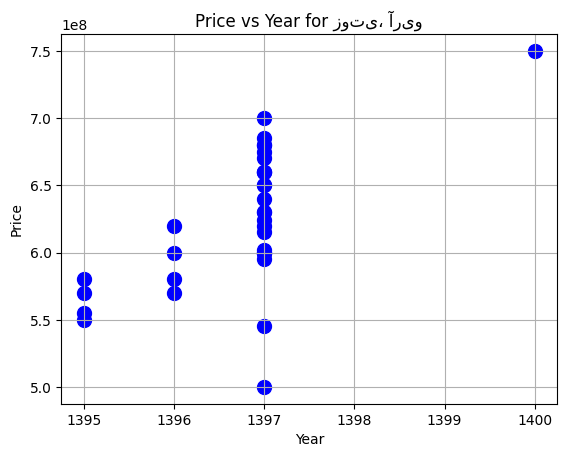

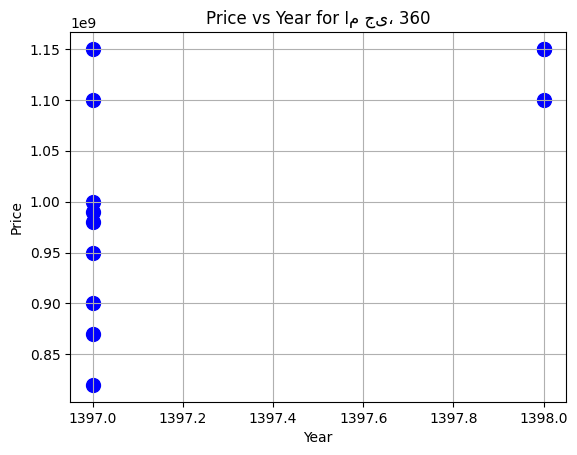

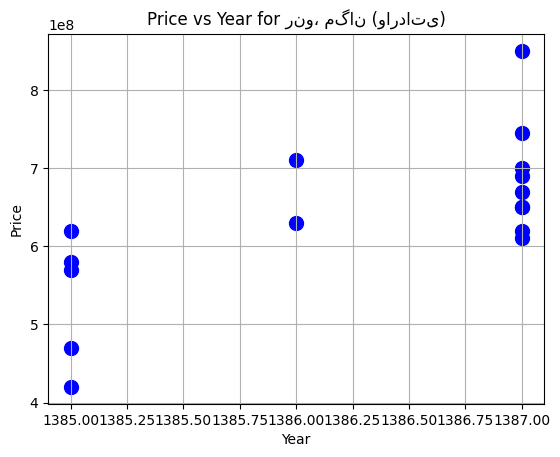

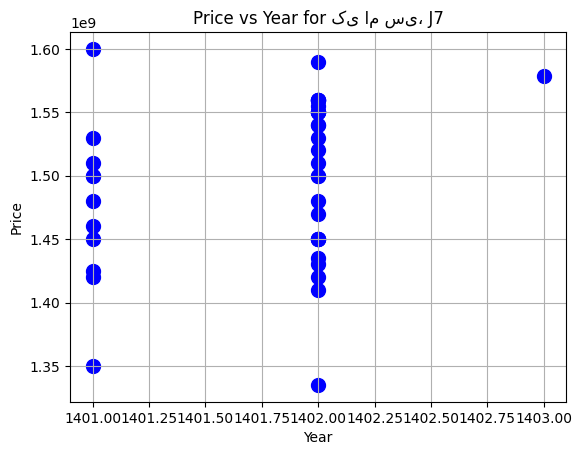

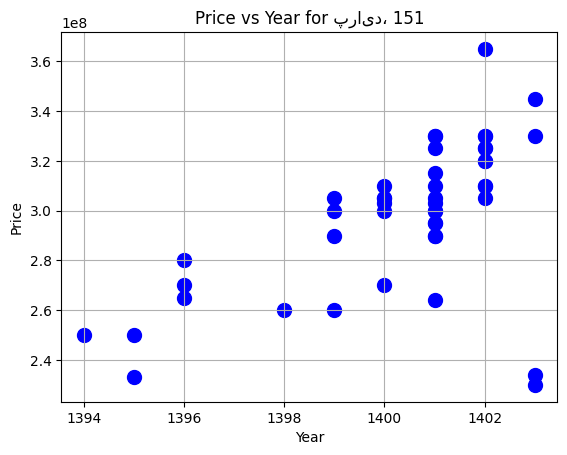

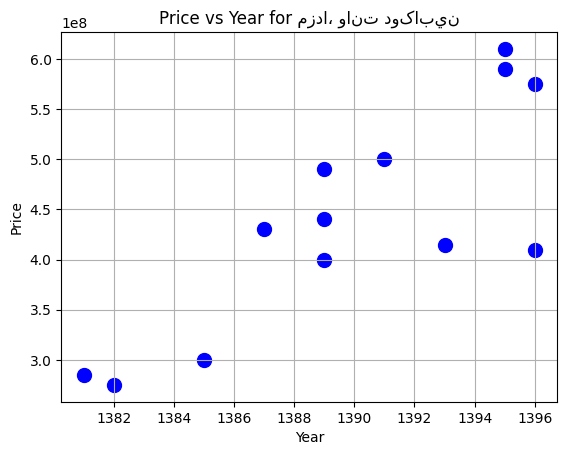

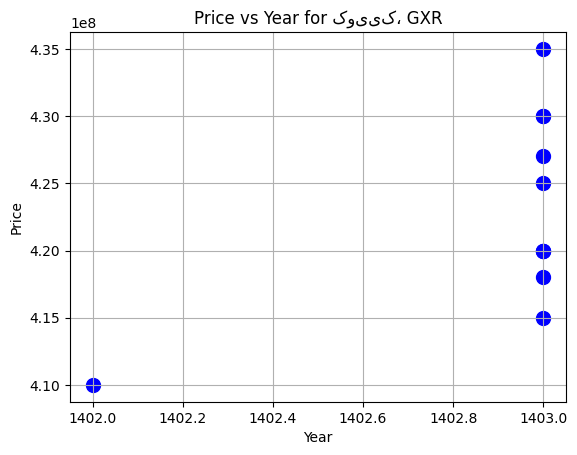

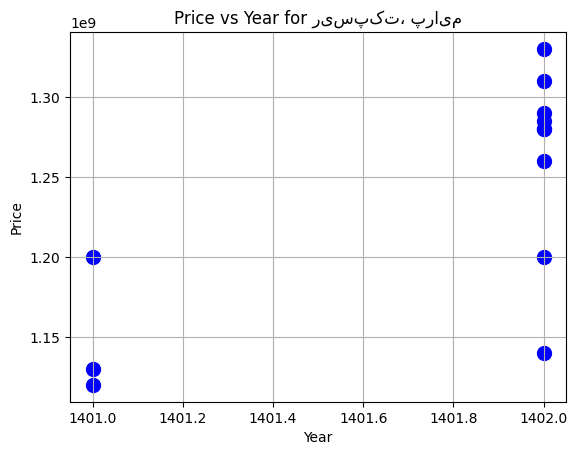

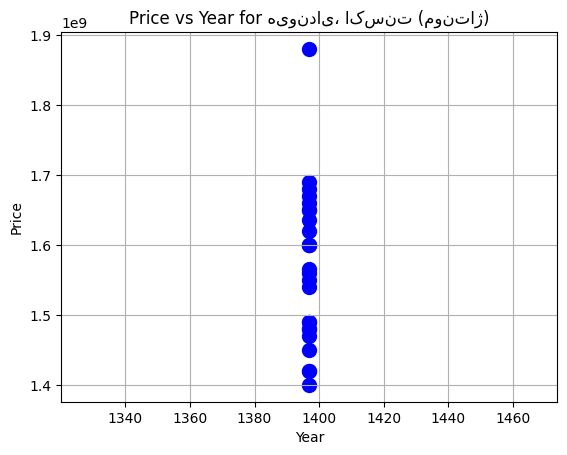

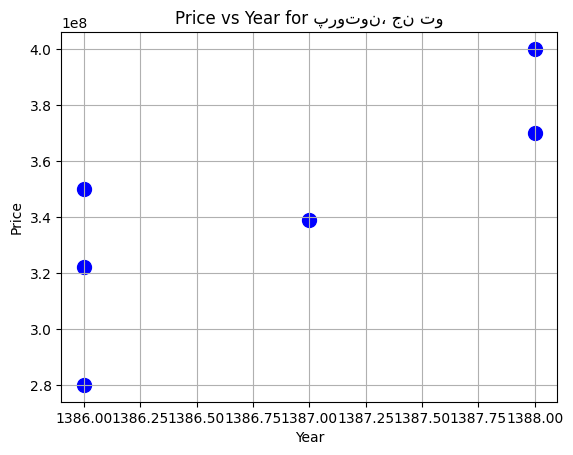

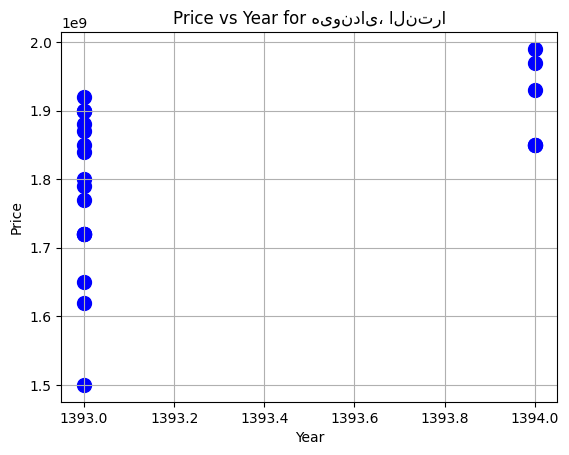

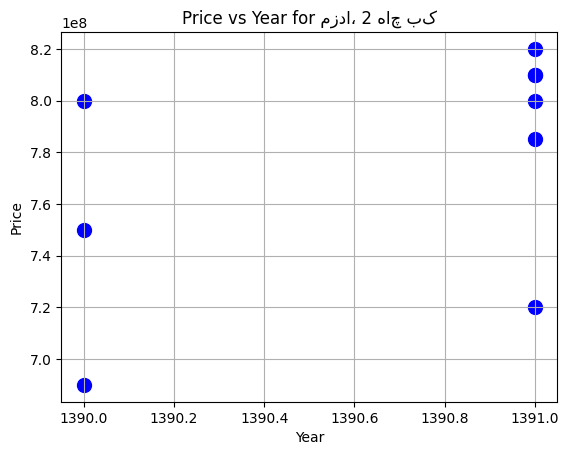

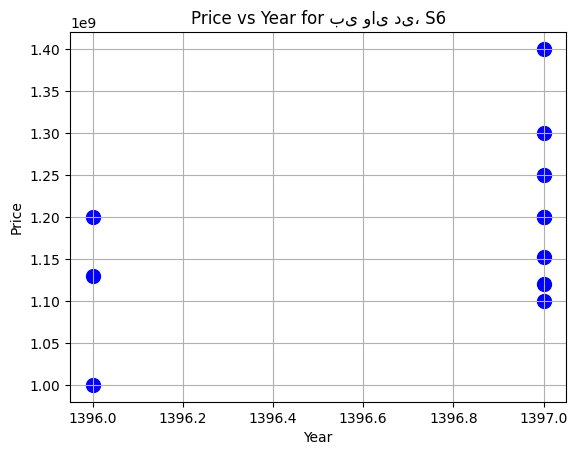

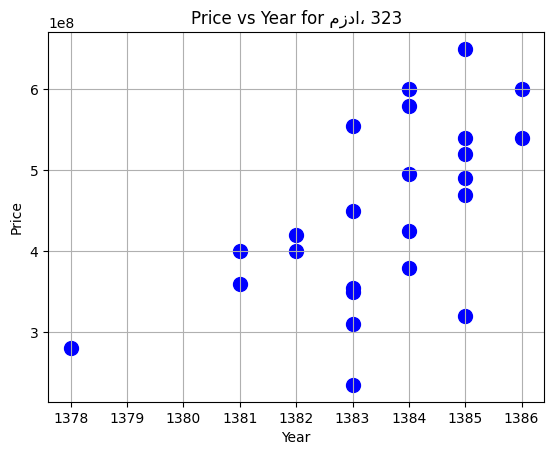

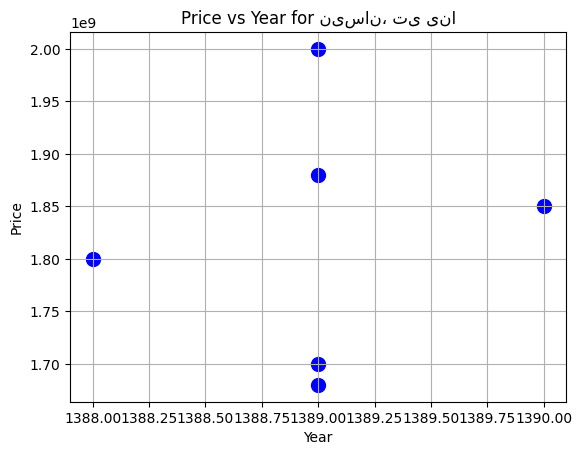

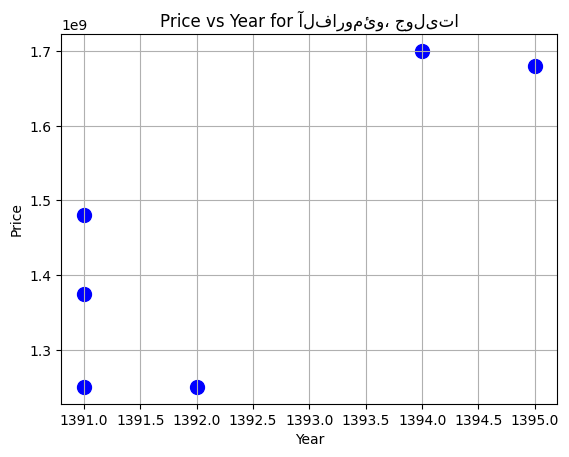

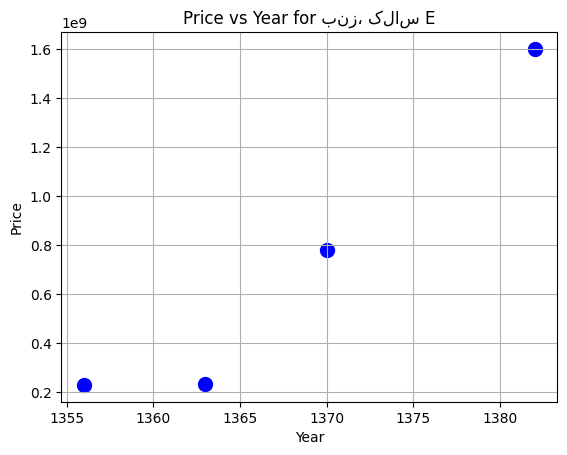

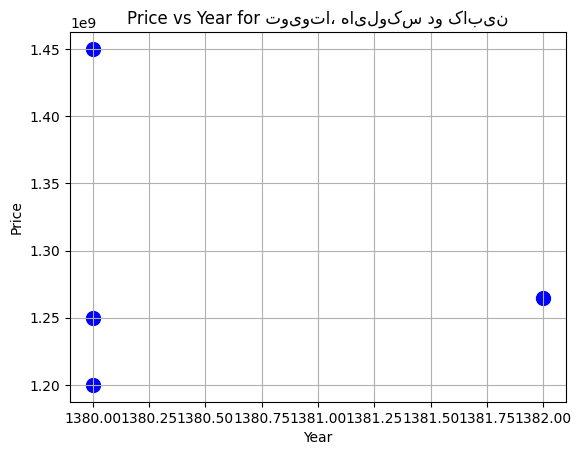

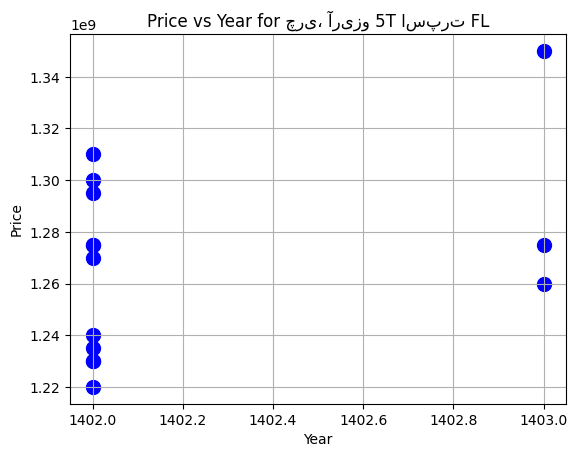

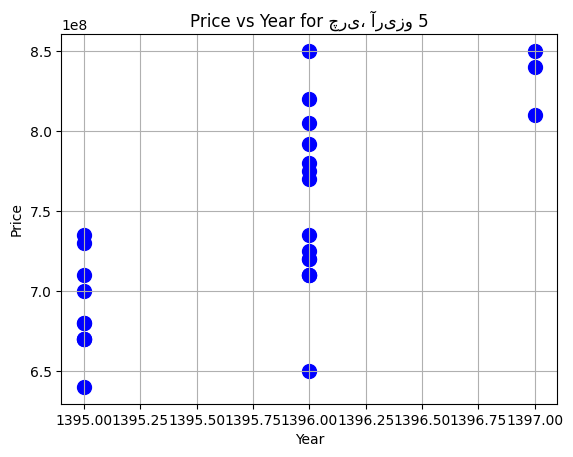

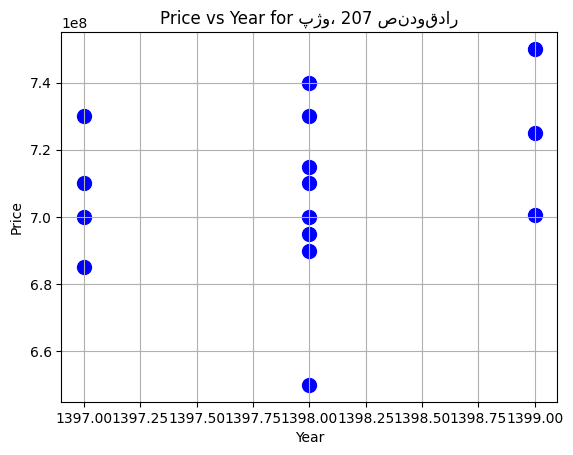

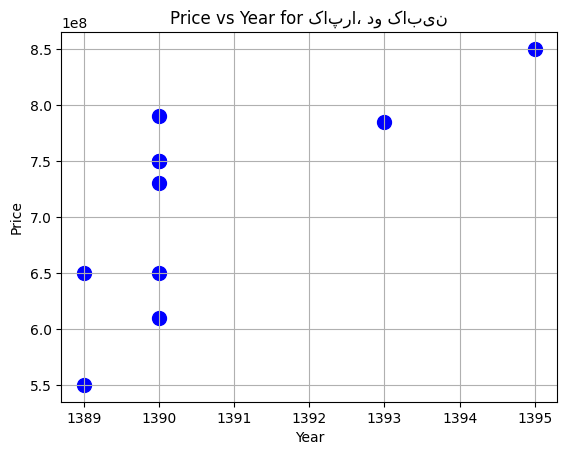

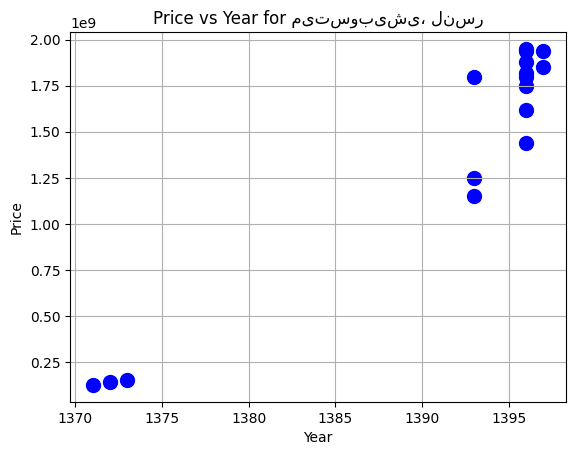

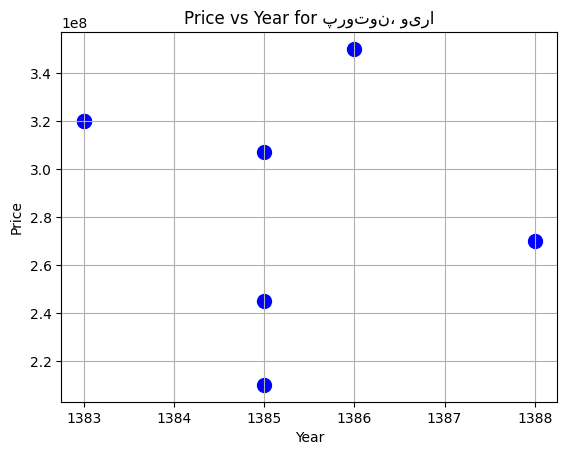

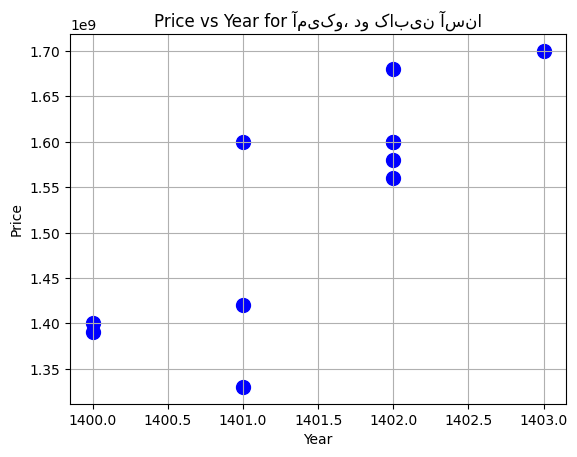

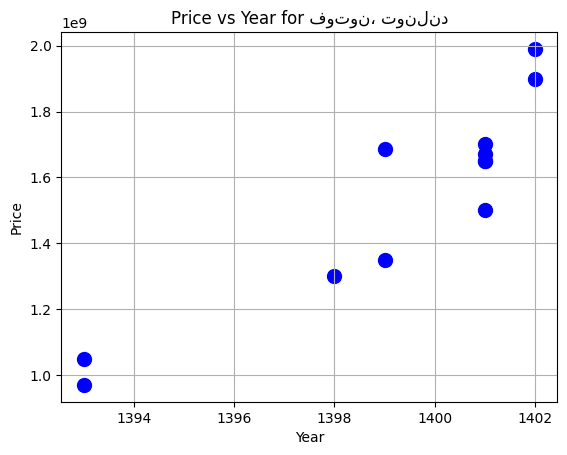

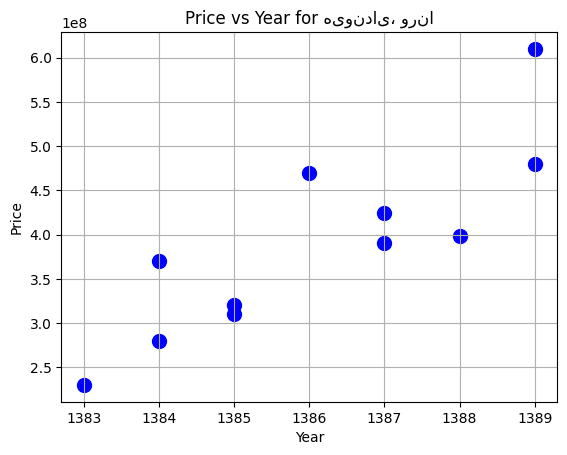

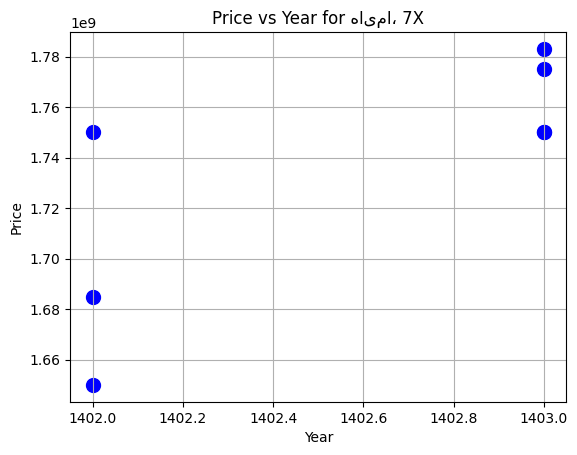

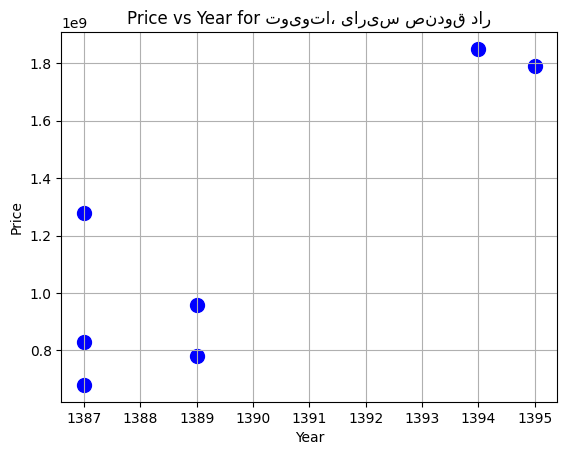

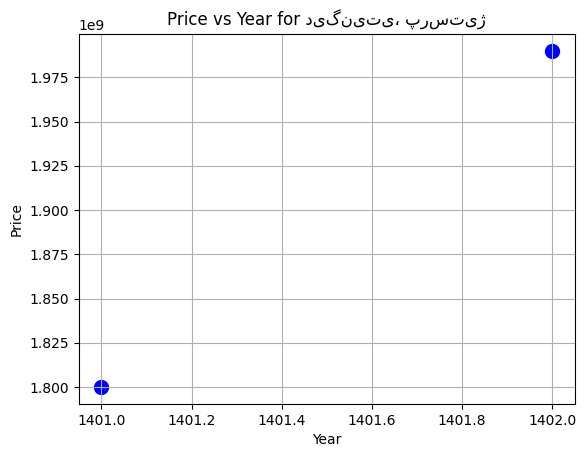

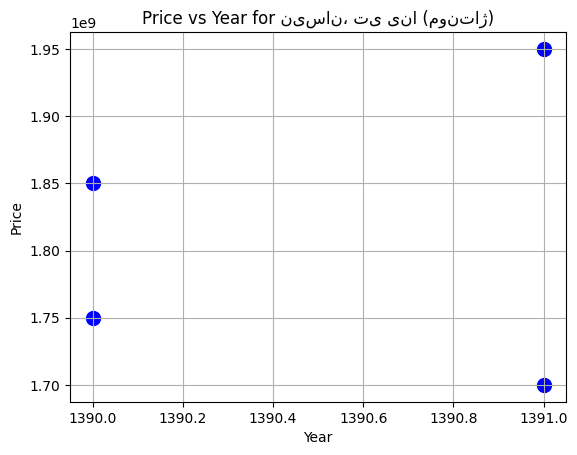

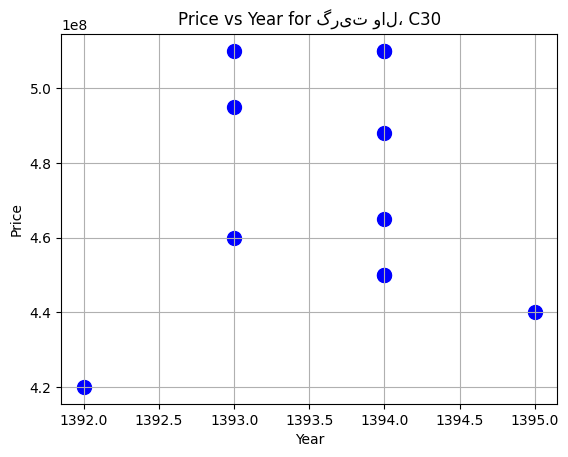

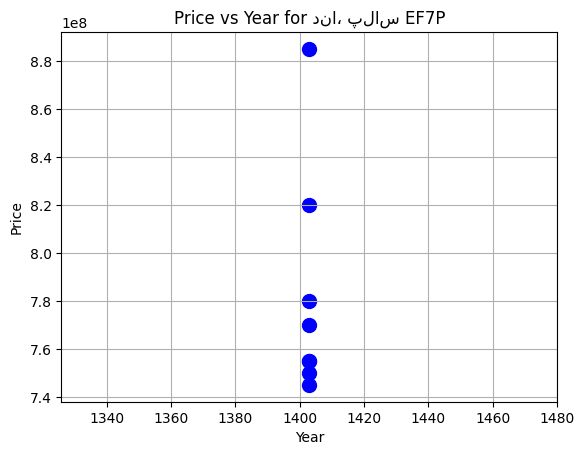

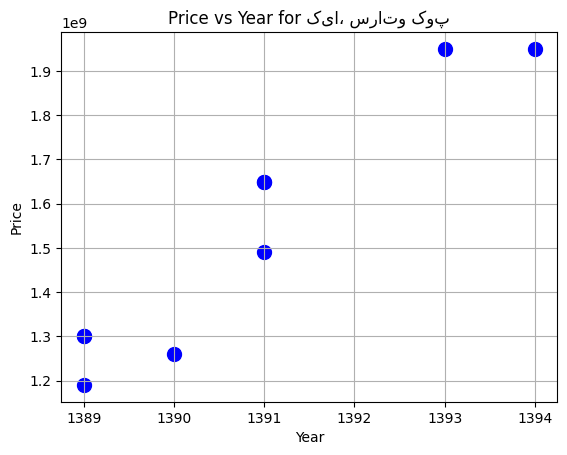

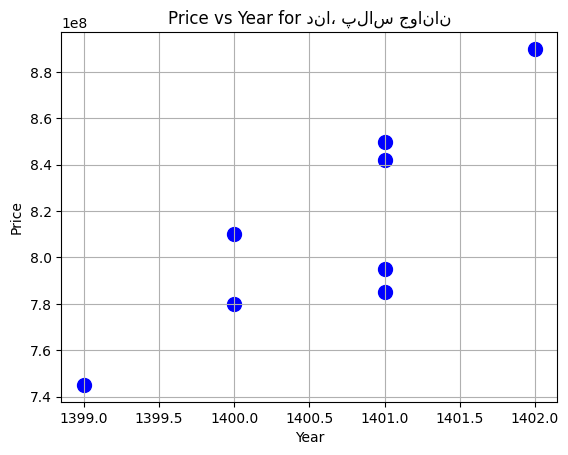

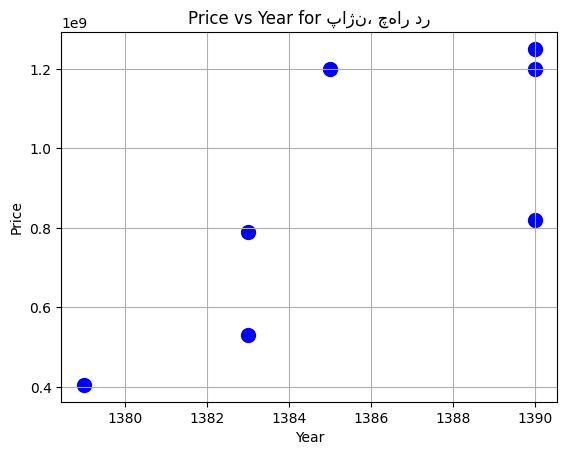

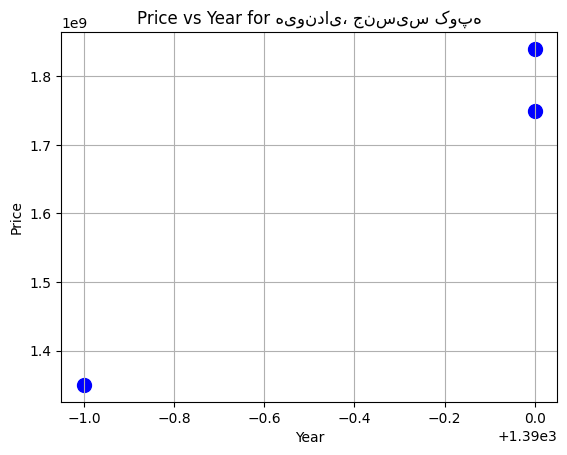

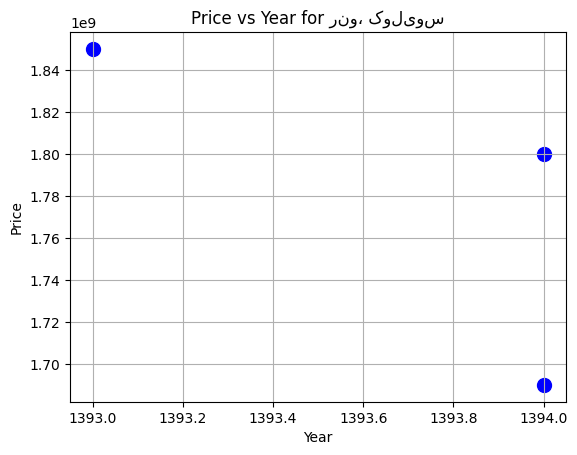

In [87]:
titles = df_clean['title'].unique()


for title in titles:
    subset = df_clean[df_clean['title'] == title]
    plt.figure()
    plt.scatter(subset['year'], subset['price'], color='blue', s=100)
    plt.title(f'Price vs Year for {title}')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

In [509]:
df[df['engine'].isna()]['title'].value_counts().head(50)

title
پژو، روآ                          41
کوییک، SR                         35
پراید، هاچ بک                     24
مزدا، وانت تک‌کابين               19
تویوتا، پرادو  چهار در            18
کیا، اسپورتیج                     17
تویوتا، کمری                      17
تویوتا، کرولا                     17
رنو، مگان (وارداتی)               17
پژو، RDI                          17
هیوندای، سانتافه                  16
پراید، 132                        16
ام وی ام، X33 کراس                14
مزدا، وانت دوکابين                13
بنز، کلاس E                       11
ب ام و، X3                        11
کوییک، GXR                        11
هیوندای، اکسنت                    11
هیوندای، سوناتا هیبرید            10
تویوتا، هایلوکس دو کابین          10
کاپرا، دو کابین                   10
سمند، سورن                        10
پژو، RD                           10
کاپرا، 2                          10
سوزوکی، گراند ویتارا (وارداتی)    10
بنز، کلاسیک                       10
دنا، پلاس EF7P                  

In [418]:
df.to_csv('cleaned.csv')

In [518]:
df.isna().sum()

title           0
year            0
mileage         0
transmission    0
fuel            0
body_color      0
inside_color    0
body_status     0
body_type       0
volume          0
engine          0
acceleration    0
price           0
dtype: int64

In [513]:
df['fuel'].median

7.568482490272373

In [89]:
df_clean['fuel'].fillna(df_clean['fuel'].mean(),inplace=True)
df_clean['volume'].fillna(df_clean['volume'].mean(),inplace=True)
df_clean['acceleration'].fillna(df_clean['acceleration'].mean(),inplace=True)
df_clean['engine'].fillna('null',inplace=True)




In [101]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [1262]:
categorical_cols

Index(['title', 'transmission', 'body_color', 'inside_color', 'body_status',
       'body_type', 'engine'],
      dtype='object')

In [407]:
df.reset_index(drop=True,inplace=True)

In [4]:
df = pd.read_csv("./cleaned.csv",index_col=0)

In [271]:
df.reset_index(drop=True,inplace=True)

In [239]:
df[df['fuel'].isnull()]

title  year   mileage transmission  fuel body_color  \
24                      پژو، RD  1384  400000.0      دنده ای   NaN        سبز   
54                   ب ام و، X3  1384  280000.0     اتوماتیک   NaN  نوک مدادی   
60                   پراید، 132  1389  461000.0      دنده ای   NaN  نوک مدادی   
61                 لاماری، ایما  1402   18000.0     اتوماتیک   NaN   تیتانیوم   
66                    کوییک، SR  1402    2500.0      دنده ای   NaN       سفید   
...                         ...   ...       ...          ...   ...        ...   
15500  تویوتا، هایلوکس دو کابین  1380  250000.0      دنده ای   NaN       سفید   
15502        ام وی ام، X33 کراس  1402    2400.0      دنده ای   NaN       مشکی   
15505                  پژو، روآ  1386  166000.0      دنده ای   NaN  نوک مدادی   
15526                ب ام و، X3  1388  248000.0     اتوماتیک   NaN       طوسی   
15572                پراید، 132  1387  290000.0      دنده ای   NaN       مشکی   

      inside_color body_status      body_type  volume  \
24            مشکی   گلگیر رنگ  passenger_car     NaN   
54            مشکی  دو لکه رنگ      crossover     NaN   
60       نوک مدادی  یک لکه رنگ  passenger_car     NaN   
61            مشکی    بدون رنگ            suv     1.5   
66            مشکی    بدون رنگ      hatchback     NaN   
...            ...         ...            ...     ...   
15500          آبی    بدون رنگ         pickup     NaN   
15502         مشکی    بدون رنگ      crossover     NaN   
15505         مشکی    بدون رنگ  passenger_car     NaN   
15526         طوسی    بدون رنگ      crossover     NaN   
15572         طوسی    بدون رنگ  passenger_car     NaN   

                            engine  acceleration       price  
24                             NaN           NaN   110000000  
54                             NaN           NaN  1550000000  
60                             NaN           NaN   204000000  
61     4 سیلندر توربوشارژ (4A95TD)           9.5  1780000000  
66                             NaN           NaN   404000000  
...                            ...           ...         ...  
15500                          NaN           NaN  1250000000  
15502                          NaN           NaN  1000000000  
15505                          NaN           NaN   160000000  
15526                          NaN           NaN  1680000000  
15572                          NaN           NaN   165000000  

[631 rows x 13 columns]

In [174]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder


df2 = df.copy()


categorical_cols = ['title', 'transmission', 'body_type', 'engine']
numerical_cols = ['year', 'volume','fuel', 'acceleration']


label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col].astype(str))
    label_encoders[col] = le


knn_imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df2[numerical_cols + categorical_cols]), columns=numerical_cols + categorical_cols)


for col in categorical_cols:
    le = label_encoders[col]
    df_imputed[col] = le.inverse_transform(df_imputed[col].astype(int))

df_imputed.head()


year  volume  fuel  acceleration         title transmission  \
0  1391.0     1.3   6.7          13.8    پراید، 131      دنده ای   
1  1398.0     1.4   6.4          14.1      پژو، 206      دنده ای   
2  1396.0     1.5   6.9          13.0  تیبا، هاچ بک      دنده ای   
3  1401.0     1.8   7.0          12.0     پژو، پارس      دنده ای   
4  1400.0     1.6   6.6          11.0      پژو، 207      دنده ای   

       body_type                engine  
0  passenger_car  4 سیلندر یورو3 (M13)  
1      hatchback          4 سیلندر TU3  
2      hatchback          4 سیلندر M15  
3  passenger_car     4 سیلندر XU7 پلاس  
4      hatchback          4 سیلندر TU5

In [408]:
label_encoders = {}
df2 = df.copy()


categorical_cols = ['title', 'transmission', 'body_type', 'engine']
numerical_cols = ['year', 'volume','fuel', 'acceleration']

for col in categorical_cols:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col].astype(str))
    label_encoders[col] = le

In [273]:
df2.loc[df2['engine']==89,'engine'] = np.nan

In [274]:
df2.reset_index(drop=True,inplace=True)

In [230]:
df2[df2['fuel'].isnull()]

title  year   mileage  transmission  fuel body_color inside_color  \
24       158  1384  400000.0             1   NaN        سبز         مشکی   
54        21  1384  280000.0             0   NaN  نوک مدادی         مشکی   
60       145  1389  461000.0             1   NaN  نوک مدادی    نوک مدادی   
61       102  1402   18000.0             0   NaN   تیتانیوم         مشکی   
66       179  1402    2500.0             1   NaN       سفید         مشکی   
...      ...   ...       ...           ...   ...        ...          ...   
15500     40  1380  250000.0             1   NaN       سفید          آبی   
15502     19  1402    2400.0             1   NaN       مشکی         مشکی   
15505    160  1386  166000.0             1   NaN  نوک مدادی         مشکی   
15526     21  1388  248000.0             0   NaN       طوسی         طوسی   
15572    145  1387  290000.0             1   NaN       مشکی         طوسی   

      body_status  body_type  volume  engine  acceleration       price  
24      گلگیر رنگ          3     NaN     NaN           NaN   110000000  
54     دو لکه رنگ          1     NaN     NaN           NaN  1550000000  
60     یک لکه رنگ          3     NaN     NaN           NaN   204000000  
61       بدون رنگ          5     1.5    48.0           9.5  1780000000  
66       بدون رنگ          2     NaN     NaN           NaN   404000000  
...           ...        ...     ...     ...           ...         ...  
15500    بدون رنگ          4     NaN     NaN           NaN  1250000000  
15502    بدون رنگ          1     NaN     NaN           NaN  1000000000  
15505    بدون رنگ          3     NaN     NaN           NaN   160000000  
15526    بدون رنگ          1     NaN     NaN           NaN  1680000000  
15572    بدون رنگ          3     NaN     NaN           NaN   165000000  

[631 rows x 13 columns]

In [275]:
knn_imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df2[numerical_cols + categorical_cols]), columns=numerical_cols + categorical_cols)


for col in categorical_cols:
    le = label_encoders[col]
    df_imputed[col] = le.inverse_transform(df_imputed[col].astype(int))



df_imputed.head()

year  volume  fuel  acceleration         title transmission  \
0  1391.0     1.3   6.7          13.8    پراید، 131      دنده ای   
1  1398.0     1.4   6.4          14.1      پژو، 206      دنده ای   
2  1396.0     1.5   6.9          13.0  تیبا، هاچ بک      دنده ای   
3  1401.0     1.8   7.0          12.0     پژو، پارس      دنده ای   
4  1400.0     1.6   6.6          11.0      پژو، 207      دنده ای   

       body_type                engine  
0  passenger_car  4 سیلندر یورو3 (M13)  
1      hatchback          4 سیلندر TU3  
2      hatchback          4 سیلندر M15  
3  passenger_car     4 سیلندر XU7 پلاس  
4      hatchback          4 سیلندر TU5

In [256]:
df_imputed['engine'].unique()

array(['4 سیلندر یورو3 (M13)', '4 سیلندر TU3', '4 سیلندر M15',
       '4 سیلندر XU7 پلاس', '4 سیلندر TU5', '4 سیلندر',
       '4 سیلندر (4G15C)', '4 سیلندر یورو4 بهینه (M13)', '4 سیلندر L3',
       '4 سیلندر توربوشارژ (M15T)', '4 سیلندر توربوشارژ TGDi', '3 سیلندر',
       '4 سیلندر یورو3', '4 سیلندر TU5 یورو4', '4 سیلندر توربوشارژ یورو5',
       '4 سیلندر توربوشارژ EF7', '3 سیلندر توربوشارژ',
       '4 سیلندر یورو2 بهینه (M13)', '4 سیلندر M15 یورو4',
       '4 سیلندر توربوشارژ', '4 سیلندر TU5 پلاس', '6 سیلندر',
       '4 سیلندر (2NZ)', '4 سیلندر توربوشارژ (4T15C)',
       '4 سیلندر توربوشارژ (4A95TD)', '4 سیلندر XU7', '4 سیلندر MPI',
       '4 سیلندر توربوشارژ بهینه شده', '4 سیلندر EF7', '4 سیلندر BM15L',
       '4 سیلندر TU5P یورو5', '4 سیلندر دوگانه سوز',
       '4 سیلندر XU7 دوگانه سوز', '4 سیلندر (BM16LB)',
       '4 سیلندر توربوشارژ (GA16)', '4 سیلندر (BM15L)',
       '4 سیلندر یورو پنج (DAE481Q)', '4 سیلندر توربوشارژ (4J15T)',
       '4 سیلندر توربو شارژ', '4 سیلندر توربوشارژ (SF

In [257]:
df_imputed[df_imputed['engine']=='nan']

Empty DataFrame
Columns: [year, volume, fuel, acceleration, title, transmission, body_type, engine]
Index: []

In [258]:
df_imputed.isnull().sum()

year            0
volume          0
fuel            0
acceleration    0
title           0
transmission    0
body_type       0
engine          0
dtype: int64

In [1312]:
len(df_imputed)

13217

In [233]:
df_imputed.info() , df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13217 entries, 0 to 13216
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          13217 non-null  float64
 1   volume        13217 non-null  float64
 2   fuel          13217 non-null  float64
 3   acceleration  13217 non-null  float64
 4   title         13217 non-null  object 
 5   transmission  13217 non-null  object 
 6   body_type     13217 non-null  object 
 7   engine        13217 non-null  object 
dtypes: float64(4), object(4)
memory usage: 826.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 13217 entries, 1 to 15587
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         13217 non-null  object 
 1   year          13217 non-null  int64  
 2   mileage       13217 non-null  float64
 3   transmission  13217 non-null  object 
 4   fuel          12586 non-null  float64
 5 

(None, None)

In [259]:
df

title  year   mileage transmission  fuel body_color  \
0             پراید، 131  1391  330000.0      دنده ای   6.7       سفید   
1               پژو، 206  1398  132000.0      دنده ای   6.4       سفید   
2           تیبا، هاچ بک  1396  103000.0      دنده ای   6.9        آبی   
3              پژو، پارس  1401   37000.0      دنده ای   7.0    خاکستری   
4               پژو، 207  1400   95000.0      دنده ای   6.6       مشکی   
...                  ...   ...       ...          ...   ...        ...   
13212           رانا، LX  1392  230000.0      دنده ای   6.9       قرمز   
13213         رانا، پلاس  1401   50000.0      دنده ای   6.9       مشکی   
13214           پژو، 207  1402    9500.0      دنده ای   6.6       مشکی   
13215    سیتروئن، زانتیا  1388  178000.0      دنده ای   7.0       سفید   
13216  تارا، اتوماتیک V2  1401   37000.0     اتوماتیک   7.3       سفید   

      inside_color  body_status      body_type  volume                engine  \
0             سفید     بدون رنگ  passenger_car     1.3  4 سیلندر یورو3 (M13)   
1          خاکستری     بدون رنگ      hatchback     1.4          4 سیلندر TU3   
2          خاکستری     بدون رنگ      hatchback     1.5          4 سیلندر M15   
3              کرم     بدون رنگ  passenger_car     1.8     4 سیلندر XU7 پلاس   
4        نوک مدادی   دو لکه رنگ      hatchback     1.6          4 سیلندر TU5   
...            ...          ...            ...     ...                   ...   
13212         مشکی  چند لکه رنگ  passenger_car     1.6    4 سیلندر TU5 یورو4   
13213         مشکی     بدون رنگ  passenger_car     1.6    4 سیلندر TU5 یورو5   
13214         مشکی     بدون رنگ      hatchback     1.6          4 سیلندر TU5   
13215      خاکستری  چند لکه رنگ  passenger_car     2.0         4 سیلندر XU10   
13216      خاکستری  کاپوت تعویض  passenger_car     1.6     4 سیلندر TU5 پلاس   

       acceleration      price  
0              13.8  215000000  
1              14.1  445000000  
2              13.0  310000000  
3              12.0  570000000  
4              11.0  590000000  
...             ...        ...  
13212          12.0  280000000  
13213          12.0  495000000  
13214          11.0  710000000  
13215           9.5  650000000  
13216          13.0  680000000  

[13217 rows x 13 columns]

In [260]:
df_imputed

year  volume  fuel  acceleration              title transmission  \
0      1391.0     1.3   6.7          13.8         پراید، 131      دنده ای   
1      1398.0     1.4   6.4          14.1           پژو، 206      دنده ای   
2      1396.0     1.5   6.9          13.0       تیبا، هاچ بک      دنده ای   
3      1401.0     1.8   7.0          12.0          پژو، پارس      دنده ای   
4      1400.0     1.6   6.6          11.0           پژو، 207      دنده ای   
...       ...     ...   ...           ...                ...          ...   
13212  1392.0     1.6   6.9          12.0           رانا، LX      دنده ای   
13213  1401.0     1.6   6.9          12.0         رانا، پلاس      دنده ای   
13214  1402.0     1.6   6.6          11.0           پژو، 207      دنده ای   
13215  1388.0     2.0   7.0           9.5    سیتروئن، زانتیا      دنده ای   
13216  1401.0     1.6   7.3          13.0  تارا، اتوماتیک V2     اتوماتیک   

           body_type                engine  
0      passenger_car  4 سیلندر یورو3 (M13)  
1          hatchback          4 سیلندر TU3  
2          hatchback          4 سیلندر M15  
3      passenger_car     4 سیلندر XU7 پلاس  
4          hatchback          4 سیلندر TU5  
...              ...                   ...  
13212  passenger_car    4 سیلندر TU5 یورو4  
13213  passenger_car    4 سیلندر TU5 یورو5  
13214      hatchback          4 سیلندر TU5  
13215  passenger_car         4 سیلندر XU10  
13216  passenger_car     4 سیلندر TU5 پلاس  

[13217 rows x 8 columns]

In [276]:
df['acceleration'] = df_imputed['acceleration']
df['volume'] = df_imputed['volume']
df['fuel'] = df_imputed['fuel']
df['engine'] = df_imputed['engine']

In [277]:
df.isnull().sum()

title           0
year            0
mileage         0
transmission    0
fuel            0
body_color      0
inside_color    0
body_status     0
body_type       0
volume          0
engine          0
acceleration    0
price           0
dtype: int64

In [411]:
df.dropna(inplace=True)

In [412]:
df.isna().sum()

title           0
year            0
mileage         0
transmission    0
fuel            0
body_color      0
inside_color    0
body_status     0
body_type       0
volume          0
engine          0
acceleration    0
price           0
dtype: int64

In [278]:
df.head(50)

title  year   mileage transmission   fuel body_color  \
0              پراید، 131  1391  330000.0      دنده ای   6.70       سفید   
1                پژو، 206  1398  132000.0      دنده ای   6.40       سفید   
2            تیبا، هاچ بک  1396  103000.0      دنده ای   6.90        آبی   
3               پژو، پارس  1401   37000.0      دنده ای   7.00    خاکستری   
4                پژو، 207  1400   95000.0      دنده ای   6.60       مشکی   
5                پژو، 206  1398   44000.0      دنده ای   6.40       سفید   
6                پژو، 206  1394  150000.0      دنده ای   6.40        آبی   
7                پژو، 206  1388  290000.0      دنده ای   6.40  نوک مدادی   
8                  جک، S3  1401   30000.0     اتوماتیک   7.60       مشکی   
9       ام وی ام، X22 PRO  1402    3500.0      دنده ای   7.10       سفید   
10               پژو، 206  1397  132000.0      دنده ای   6.40       سفید   
11             پراید، 131  1394  221000.0      دنده ای   6.40       سفید   
12               پژو، 405  1391  185000.0      دنده ای   9.00    نقره ای   
13            پژو، 206 SD  1392  200000.0      دنده ای   6.60  نوک مدادی   
14       شاهین، G دنده ای  1401   32000.0      دنده ای   7.20       سفید   
15                 جک، S5  1401   21500.0     اتوماتیک  11.00       سفید   
16          ام وی ام، 110  1390  240000.0      دنده ای   3.70       سفید   
17               پژو، 207  1402   22000.0      دنده ای   6.30       سفید   
18                پژو، RD  1384  400000.0      دنده ای   9.00        سبز   
19           مزدا، 3 قدیم  1386  270000.0     اتوماتیک   8.20       سفید   
20             پراید، 131  1390  250000.0      دنده ای   6.70       سفید   
21             پراید، 131  1393  177000.0      دنده ای   6.40       سفید   
22               رانا، LX  1394  130000.0      دنده ای   6.90       سفید   
23               پژو، 206  1398   36000.0      دنده ای   6.40       سفید   
24             پراید، 131  1390  100000.0      دنده ای   6.70  نوک مدادی   
25           کی ام سی، T8  1401   50000.0      دنده ای   9.80       مشکی   
26          دنا، پلاس EF7  1401    4500.0     اتوماتیک   7.80       سفید   
27         رنو، پارس تندر  1397   88000.0      دنده ای   6.80       سفید   
28      ام وی ام، X22 PRO  1401   35000.0     اتوماتیک   4.90       سفید   
29       پراید، صندوق دار  1389  220000.0      دنده ای   7.50       سفید   
30        تیبا، صندوق دار  1395  180000.0      دنده ای   6.90       سفید   
31         کوییک، دنده ای  1398   16500.0      دنده ای   7.00       سفید   
32              هایما، S7  1397   68000.0     اتوماتیک   9.70    خاکستری   
33           تویوتا، کمری  1386  500000.0      دنده ای   8.20    خاکستری   
34       کوییک، دنده ای S  1402   21000.0      دنده ای   7.10       سفید   
35      تارا، اتوماتیک V4  1402   12000.0     اتوماتیک   7.30   تیتانیوم   
36       هیوندای، سانتافه  1388  238000.0     اتوماتیک  10.40   بادمجانی   
37       کوییک، دنده ای R  1399   85000.0      دنده ای   7.00       مشکی   
38  هیوندای، i20 (مونتاژ)  1396  110000.0     اتوماتیک   6.70       مشکی   
39              هایما، S7  1395  252000.0     اتوماتیک   8.80       سفید   
40               رانا، LX  1393  254000.0      دنده ای   6.90   بادمجانی   
41                 جک، S3  1397   79000.0     اتوماتیک   7.60       سفید   
42             پراید، 111  1398   39000.0      دنده ای   6.40       مشکی   
43             لیفان، X60  1392  220000.0      دنده ای   8.20       سفید   
44             ب ام و، X3  1384  280000.0     اتوماتیک   6.98  نوک مدادی   
45              پژو، پارس  1401   45000.0      دنده ای   7.50       سفید   
46    فونیکس، آریزو 6 پرو  1401   35000.0     اتوماتیک   6.90       مشکی   
47               پژو، 405  1393  220000.0      دنده ای   9.00    خاکستری   
48      کیا، ریو (مونتاژ)  1386  242000.0      دنده ای   7.00       مشکی   
49             پراید، 132  1389  461000.0      دنده ای   6.64  نوک مدادی   

   inside_color       body_status      body_type  volume  \
0          سفید          بدون رنگ  passenger_car     1.3   
1       خاکستری        

In [226]:
df_imputed.reset_index(drop=True,inplace=True)

year  volume  fuel  acceleration              title transmission  \
0      1391.0     1.3   6.7          13.8         پراید، 131      دنده ای   
1      1398.0     1.4   6.4          14.1           پژو، 206      دنده ای   
2      1396.0     1.5   6.9          13.0       تیبا، هاچ بک      دنده ای   
3      1401.0     1.8   7.0          12.0          پژو، پارس      دنده ای   
4      1400.0     1.6   6.6          11.0           پژو، 207      دنده ای   
...       ...     ...   ...           ...                ...          ...   
13212  1392.0     1.6   6.9          12.0           رانا، LX      دنده ای   
13213  1401.0     1.6   6.9          12.0         رانا، پلاس      دنده ای   
13214  1402.0     1.6   6.6          11.0           پژو، 207      دنده ای   
13215  1388.0     2.0   7.0           9.5    سیتروئن، زانتیا      دنده ای   
13216  1401.0     1.6   7.3          13.0  تارا، اتوماتیک V2     اتوماتیک   

           body_type                engine  
0      passenger_car  4 سیلندر یورو3 (M13)  
1          hatchback          4 سیلندر TU3  
2          hatchback          4 سیلندر M15  
3      passenger_car     4 سیلندر XU7 پلاس  
4          hatchback          4 سیلندر TU5  
...              ...                   ...  
13212  passenger_car    4 سیلندر TU5 یورو4  
13213  passenger_car    4 سیلندر TU5 یورو5  
13214      hatchback          4 سیلندر TU5  
13215  passenger_car         4 سیلندر XU10  
13216  passenger_car     4 سیلندر TU5 پلاس  

[13217 rows x 8 columns]

In [6]:
df.isna().sum()

title           0
year            0
mileage         0
transmission    0
fuel            0
body_color      0
inside_color    0
body_status     0
body_type       0
volume          0
engine          0
acceleration    0
price           0
dtype: int64

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV


X = df_clean.drop(columns=['price'])
y = df_clean['price']


categorical_cols = ['title', 'transmission', 'body_color', 'inside_color', 'body_status', 'body_type', 'engine']
numerical_cols = ['year', 'mileage', 'volume', 'acceleration','fuel']


categorical_transformer = OneHotEncoder(handle_unknown='ignore')


numerical_transformer = StandardScaler()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


model = RandomForestRegressor()


pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


param_grid = {
    'model__n_estimators': [100,150],  
    'model__max_depth': [None],     
    'model__min_samples_split': [3],     
    'model__min_samples_leaf': [1],     
    'model__bootstrap': [True],     
    'preprocessor__num__with_mean': [True,False],  
}


grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)


grid_search.fit(X_train, y_train)


print("Best parameters found: ", grid_search.best_params_)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)



mae = mean_absolute_error(y_test, y_pred)
mae
ape = 0
def mdape(y_true, y_pred):

    ape = np.abs((y_true - y_pred) / y_true) 

    return np.median(ape)* 100 , ape

_mdape,ape = mdape(y_test , y_pred)
r2 = r2_score(y_test, y_pred)
score = (((1-_mdape)+r2)/2)*100

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END model__bootstrap=True, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=3, model__n_estimators=100, preprocessor__num__with_mean=False; total time=   5.3s
[CV] END model__bootstrap=True, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=3, model__n_estimators=100, preprocessor__num__with_mean=False; total time=   5.4s
[CV] END model__bootstrap=True, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=3, model__n_estimators=100, preprocessor__num__with_mean=True; total time=   5.6s
[CV] END model__bootstrap=True, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=3, model__n_estimators=100, preprocessor__num__with_mean=True; total time=   5.6s
[CV] END model__bootstrap=True, model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=3, model__n_estimators=150, preprocessor__num__with_mean=False; total time= 

In [93]:
mae

40318497.530287966

In [17]:
score

-115.08992112133127

In [18]:
_mdape

4.2722868820415245

In [25]:
r2

0.9707533253784453

In [91]:
def evaluate(y_true, y_pred):
    error = y_pred - y_true
    rel_error = error / y_true
    mape_hat = max(0, (1-rel_error.abs().median()))
    r2 = max(0, r2_score(y_true, y_pred))
    return (mape_hat+r2)/2*100

In [92]:
evaluate(y_test,y_pred)

96.65318443617146

In [926]:
pd.DataFrame(y_pred,y_test)

0
price                   
1400000000  1.568215e+09
115000000   1.124450e+08
355000000   3.953950e+08
615000000   6.162350e+08
755000000   7.527350e+08
...                  ...
550000000   5.751500e+08
885000000   8.906433e+08
700000000   6.317600e+08
350000000   3.599400e+08
620000000   6.022450e+08

[2547 rows x 1 columns]

In [863]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd



data['price'] = data['price'].str.replace(',', '').astype(float)
data['mileage'] = pd.to_numeric(data['mileage'].str.replace(' km', '').str.replace(',', ''), errors='coerce')
data['year'] = data['year'].apply(lambda x: x if x > 1900 else x + 621)
data['volume'] = pd.to_numeric(data['volume'].str.replace(' لیتر', ''), errors='coerce')
data['acceleration'] = pd.to_numeric(data['acceleration'].str.replace(' ثانیه', ''), errors='coerce')


data_cleaned = data.dropna()


X = data_cleaned.drop(columns=['price', 'description'])
y = data_cleaned['price']


categorical_cols = ['title', 'transmission', 'fuel', 'body_color', 'inside_color', 'body_status', 'body_type', 'engine']
numerical_cols = ['year', 'mileage', 'volume', 'acceleration']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train_processed.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),  # First hidden layer
    tf.keras.layers.Dense(64, activation='relu'),   # Second hidden layer
    tf.keras.layers.Dense(32, activation='relu'),   # Third hidden layer
    tf.keras.layers.Dense(1)  # Output layer (regression)
])


model.compile(optimizer='adam', loss='mse', metrics=['mae'])


history = model.fit(X_train_processed, y_train, epochs=50, batch_size=32, validation_split=0.2)


test_loss, test_mae = model.evaluate(X_test_processed, y_test)

print(f"Test MAE: {test_mae}")


/Users/smsag/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SimpleImputer from version 1.0.2 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/smsag/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/smsag/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.0.2 when using version

ValueError: node array from the pickle has an incompatible dtype:
- expected: {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}
- got     : [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]

In [8]:
a = 3.13
len(a)

TypeError: can only concatenate str (not "float") to str

In [23]:
df['description'].fillna("",inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15588 entries, 0 to 15587
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         15588 non-null  object
 1   year          15588 non-null  int64 
 2   mileage       15588 non-null  object
 3   transmission  15588 non-null  object
 4   fuel          13931 non-null  object
 5   body_color    15588 non-null  object
 6   inside_color  15588 non-null  object
 7   body_status   15588 non-null  object
 8   description   15588 non-null  object
 9   body_type     15588 non-null  object
 10  volume        14371 non-null  object
 11  engine        14371 non-null  object
 12  acceleration  13752 non-null  object
 13  price         15588 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.7+ MB


In [ ]:
df

In [25]:
df['description']

0        162
1         83
2         19
3        232
4          0
        ... 
15583     28
15584      0
15585      0
15586    500
15587     54
Name: description, Length: 15588, dtype: int64

In [24]:
df ['description'] = df['description'].apply(lambda x : len(x))

In [26]:
df['price'] = df['price'].map(lambda x : int(x.replace(",","")))

In [30]:
df['description'].value_counts()

description
0      2098
43      106
67      101
28      101
49       99
       ... 
564       1
558       1
551       1
561       1
522       1
Name: count, Length: 536, dtype: int64

In [27]:
df['price']

0        2550000000
1         215000000
2         445000000
3         310000000
4         570000000
            ...    
15583     280000000
15584     495000000
15585     710000000
15586     650000000
15587     680000000
Name: price, Length: 15588, dtype: int64

In [29]:
df['description'].corr(df['price'])

-0.039042617809072394

In [120]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
    

df2 = df.copy()


categorical = ['title', 'transmission', 'body_type', 'engine']
numerical = ['year', 'volume','fuel', 'acceleration']

df2[categorical] = df2[categorical].apply(lambda series: pd.Series(
    LabelEncoder().fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
))

# print(df2)

imp_num = IterativeImputer(estimator=RandomForestRegressor(),
                            initial_strategy='mean',
                            max_iter=10, random_state=0)
imp_cat = IterativeImputer(estimator=RandomForestClassifier(), 
                            initial_strategy='most_frequent',
                            max_iter=10, random_state=0)

df2[numerical] = imp_num.fit_transform(df2[numerical])
df2[categorical] = imp_cat.fit_transform(df2[categorical])

for col in categorical:
    le = label_encoders[col]
    df_imputed[col] = le.inverse_transform(df_imputed[col].astype(int))

In [122]:
df2['engine'].unique()

array([80., 27., 18., 38., 28.,  2.,  4., 83., 17., 58., 63.,  0., 79.,
       30., 67., 60.,  1., 78., 20., 47., 29., 86., 54., 48., 36., 23.,
       65., 11., 10., 70., 37., 56.,  6., 76., 51., 46., 59., 26., 21.,
       33., 25., 88., 14., 69., 42., 73., 39., 31., 35., 64., 24., 53.,
        7., 19., 61., 62., 32., 50., 15., 72., 40., 44., 34., 85., 43.,
       41., 52., 75., 55., 12., 22.,  9., 13., 74.,  5., 77., 66., 71.,
       45., 89., 57.,  3.,  8., 84., 49., 68., 87., 81., 82., 16.])